In [1]:
import numpy as np
import time
import pickle
import os
import sys
import matplotlib.pyplot as pl
import importlib
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import hstack, kron, eye, csc_matrix, block_diag


from pymatching import Matching
#m = Matching(H)

#import entanglement
#import U_1_entanglement

from qiskit import *
from qiskit import extensions
from qiskit import QuantumCircuit
import qiskit
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import random_unitary, Statevector, DensityMatrix, entropy, partial_trace
from qiskit.result import marginal_counts

import os
import sys
import fileinput
from numpy import inf
from numpy import float 


from qecsim.model import Decoder, cli_description
from qecsim.model import DecoderFTP
from qecsim.models.rotatedplanar import RotatedPlanarCode
from qecsim.models.toric import ToricCode
import math

import qecsim
from qecsim import paulitools as pt
from qecsim.models.generic import DepolarizingErrorModel
from qecsim.models.rotatedplanar import RotatedPlanarCode

from enum import Enum
from copy import deepcopy
import numpy as np
import inspect
import copy
import networkx as nx
import matplotlib.pyplot as plt



In [2]:
class GraphVisualization:
   
    def __init__(self):
          
        # visual is a list which stores all 
        # the set of edges that constitutes a
        # graph
        self.visual = []
          
    # addEdge function inputs the vertices of an
    # edge and appends it to the visual list
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)
          
    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.show()
        

In [3]:
G = GraphVisualization()
edges, logical, dlogical = squareGraph(18);
print("edges = ", edges)
#print(logical)
numEdges = np.shape(edges)[0]
for e in range(numEdges):
    #print(edgesHoney[e])
    G.addEdge(edges[e][0], edges[e][1])
G.visualize()  

NameError: name 'squareGraph' is not defined

In [13]:
def honeycombGraph(Nq):
    # We have 36 edges/qubits 
    #print("inside honeycombGraph")

    if Nq==6:
        edges1=np.array([[0, 1], [2, 3], [4, 5]])+1
        edges2=np.array([[1, 2], [3, 4], [5, 0]])+1
        edges3=np.array([])

        if edges3!=[]:        
            edges = np.concatenate((edges1, edges2, edges3), axis=0)
        else:
            edges = np.concatenate((edges1, edges2), axis=0)
        
        plaquettes = np.array([[0, 1, 2, 3, 4, 5]])+1
        
                           
    if Nq==24:
        edges=np.array([[0, 3],[1, 4],[2, 8],[5, 11],[6, 17],[7, 14],[9, 10], 
                        [12, 19],[13, 21],[15, 22],[16, 23],[18, 20],[0, 2],[1, 5],[3, 7],[4, 12],
                        [6, 13],[8, 14],[9, 16],[10, 22],[11, 19],[15, 23],[17, 20],[18, 21],[0, 1],[2, 6],[3, 9],[4, 10], 
                        [5, 13],[7, 18],[8, 15],[11, 23],[12, 20],[14, 19],[16, 21],[17, 22]])+1;

        plaquettes = np.array([[0, 1, 4, 10, 9, 3],[2, 6, 13, 5, 1, 0],[3, 7, 14, 8, 2, 0],[5, 11, 19, 12, 4, 1],[8, 15, 22, 17, 6, 2],
                               [9, 16, 21, 18, 7, 3],[12, 20, 17, 22, 10, 4],[13, 21, 16, 23, 11, 5],[17, 20, 18, 21, 13, 6],
                               [18, 20, 12, 19, 14, 7],[8, 14, 19, 11, 23, 15],    
                               [9, 10, 22, 15, 23, 16]])+1
        
    #print("edges = ", edges)   
    #logical = dict();logical = {"0":[23, 16, 12, 14], \
    #    "1":[31, 28, 25, 30], "2":[21, 31, 3, 28, 16, 25, 2, 30],\
    #    "3":[29, 11, 22, 4, 25, 2, 17, 5]}        
    
    #logicals = np.concatenate((GZLogic, GXLogic), axis=0)
    
    spacetimeedge = [[2, 1, 1, 3],[2, 1, 4, 6],[2, 1, 7, 9],[2, 1, 10, 12],[2, 1, 13, 15],[2, 1, 16, 18],[3, 1, 1, 3],[3, 1, 4, 6],[3, 1, 7, 9],[3, 1, 10, 12],[3, 1, 13, 15],[3, 1, 16, 18],[2, 5, 1, 3],[2, 5, 4, 6],[2, 5, 7, 9],[2, 5, 10, 12],[2, 5, 13, 15],[2, 5, 16, 18],[3, 6, 1, 3],[3, 6, 4, 6],[3, 6, 7, 9],[3, 6, 10, 12],[3, 6, 13, 15],[3, 6, 16, 18],[8, 1, 1, 3],[8, 1, 4, 6],[8, 1, 7, 9],[8, 1, 10, 12],[8, 1, 13, 15],[8, 1, 16, 18],[2, 10, 1, 3],[2, 10, 4, 6],[2, 10, 7, 9],[2, 10, 10, 12],[2, 10, 13, 15],[2, 10, 16, 18],[11, 5, 1, 3],[11, 5, 4, 6],[11, 5, 7, 9],[11, 5, 10, 12],[11, 5, 13, 15],[11, 5, 16, 18],[11, 6, 1, 3],[11, 6, 4, 6],[11, 6, 7, 9],[11, 6, 10, 12],[11, 6, 13, 15],[11, 6, 16, 18],[3, 10, 1, 3],[3, 10, 4, 6],[3, 10, 7, 9],[3, 10, 10, 12],[3, 10, 13, 15],[3, 10, 16, 18],[11, 10, 1, 3],[11, 10, 4, 6],[11, 10, 7, 9],[11, 10, 10, 12],[11, 10, 13, 15],[11, 10, 16, 18],[8, 6, 1, 3],[8, 6, 4, 6],[8, 6, 7, 9],[8, 6, 10, 12],[8, 6, 13, 15],[8, 6, 16, 18],[8, 5, 1, 3],[8, 5, 4, 6],[8, 5, 7, 9],[8, 5, 10, 12],[8, 5, 13, 15],[8, 5, 16, 18],[0, 2, 2, 4],[0, 2, 5, 7],[0, 2, 8, 10],[0, 2, 11, 13],[0, 2, 14, 16],[0, 2, 17, 19],[0, 3, 2, 4],[0, 3, 5, 7],[0, 3, 8, 10],[0, 3, 11, 13],[0, 3, 14, 16],[0, 3, 17, 19],[4, 2, 2, 4],[4, 2, 5, 7],[4, 2, 8, 10],[4, 2, 11, 13],[4, 2, 14, 16],[4, 2, 17, 19],[7, 3, 2, 4],[7, 3, 5, 7],[7, 3, 8, 10],[7, 3, 11, 13],[7, 3, 14, 16],[7, 3, 17, 19],[4, 8, 2, 4],[4, 8, 5, 7],[4, 8, 8, 10],[4, 8, 11, 13],[4, 8, 14, 16],[4, 8, 17, 19],[9, 2, 2, 4],[9, 2, 5, 7],[9, 2, 8, 10],[9, 2, 11, 13],[9, 2, 14, 16],[9, 2, 17, 19],[0, 11, 2, 4],[0, 11, 5, 7],[0, 11, 8, 10],[0, 11, 11, 13],[0, 11, 14, 16],[0, 11, 17, 19],[9, 3, 2, 4],[9, 3, 5, 7],[9, 3, 8, 10],[9, 3, 11, 13],[9, 3, 14, 16],[9, 3, 17, 19],[7, 8, 2, 4],[7, 8, 5, 7],[7, 8, 8, 10],[7, 8, 11, 13],[7, 8, 14, 16],[7, 8, 17, 19],[4, 11, 2, 4],[4, 11, 5, 7],[4, 11, 8, 10],[4, 11, 11, 13],[4, 11, 14, 16],[4, 11, 17, 19],[7, 11, 2, 4],[7, 11, 5, 7],[7, 11, 8, 10],[7, 11, 11, 13],[7, 11, 14, 16],[7, 11, 17, 19],[9, 8, 2, 4],[9, 8, 5, 7],[9, 8, 8, 10],[9, 8, 11, 13],[9, 8, 14, 16],[9, 8, 17, 19],[1, 0, 0, 2],[1, 0, 3, 5],[1, 0, 6, 8],[1, 0, 9, 11],[1, 0, 12, 14],[1, 0, 15, 17],[1, 4, 0, 2],[1, 4, 3, 5],[1, 4, 6, 8],[1, 4, 9, 11],[1, 4, 12, 14],[1, 4, 15, 17],[5, 0, 0, 2],[5, 0, 3, 5],[5, 0, 6, 8],[5, 0, 9, 11],[5, 0, 12, 14],[5, 0, 15, 17],[6, 0, 0, 2],[6, 0, 3, 5],[6, 0, 6, 8],[6, 0, 9, 11],[6, 0, 12, 14],[6, 0, 15, 17],[1, 7, 0, 2],[1, 7, 3, 5],[1, 7, 6, 8],[1, 7, 9, 11],[1, 7, 12, 14],[1, 7, 15, 17],[5, 9, 0, 2],[5, 9, 3, 5],[5, 9, 6, 8],[5, 9, 9, 11],[5, 9, 12, 14],[5, 9, 15, 17],[10, 4, 0, 2],[10, 4, 3, 5],[10, 4, 6, 8],[10, 4, 9, 11],[10, 4, 12, 14],[10, 4, 15, 17],[10, 7, 0, 2],[10, 7, 3, 5],[10, 7, 6, 8],[10, 7, 9, 11],[10, 7, 12, 14],[10, 7, 15, 17],[6, 9, 0, 2],[6, 9, 3, 5],[6, 9, 6, 8],[6, 9, 9, 11],[6, 9, 12, 14],[6, 9, 15, 17],[10, 9, 0, 2],[10, 9, 3, 5],[10, 9, 6, 8],[10, 9, 9, 11],[10, 9, 12, 14],[10, 9, 15, 17],[5, 7, 0, 2],[5, 7, 3, 5],[5, 7, 6, 8],[5, 7, 9, 11],[5, 7, 12, 14],[5, 7, 15, 17],[6, 4, 0, 2],[6, 4, 3, 5],[6, 4, 6, 8],[6, 4, 9, 11],[6, 4, 12, 14],[6, 4, 15, 17]]
    return edges, plaquettes, spacetimeedge
    
    #return edges, logical

/Users/hosseindehghani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # Remove the CWD from sys.path while we load stuff.
/Users/hosseindehghani/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


len logical =  1
(6, 2)


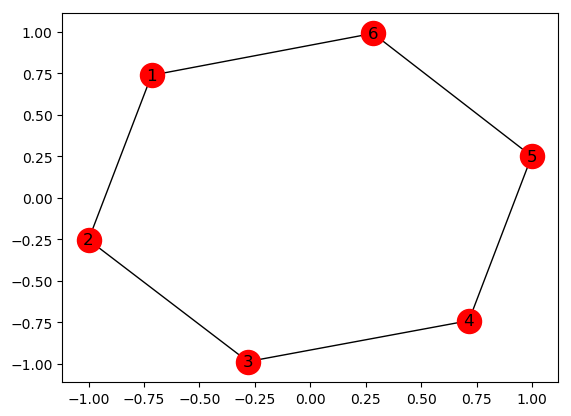

In [14]:

G = GraphVisualization()
edges, logical, _ = honeycombGraph(6);
print("len logical = ", len(logical))
print(np.shape(edges))
numEdges = np.shape(edges)[0]
for e in range(numEdges):
    #print(edges[e])
    G.addEdge(edges[e][0], edges[e][1])
G.visualize()  

edges, logical, _ = honeycombGraph(6);
#for i in logical.keys():
    #print(i, " = ", logical[i])

    
#logical["X1"].append(20)
#print(logical)
#logical["X1"].append(22)
#print(logical["X1"])
EdgeList =  [[0, 3], [1, 4], [2, 8], [5, 11], [6, 17], [7, 14], [9, 10], [12, 19], [13, 21], [15, 22], [16, 23], [18, 20], [0, 2], [1, 5], [3, 7], [4, 12], [6, 13], [8, 14], [9, 16], [10, 22], [11, 19], [15, 23], [17, 20], [18, 21], [0, 1], [2, 6], [3, 9], [4, 10], [5, 13], [7, 18], [8, 15], [11, 23], [12, 20], [14, 19], [16, 21], [17, 22]]

#print((EdgeList))
#for i in range(np.shape(EdgeList)[0]):
#    print("i = {}, Edge = {}".format(i, EdgeList[i][:]))

    
#for i in range(np.shape(EdgeList)[])    

In [15]:
def squareGraph(Nq):
    # Nq: Number of qubits/qubits on a square lattice
    # L: Size of the square side. We have a L*L lattice and 
    # there are Nq=2*L^2 qubits/qubits/
    L = int(np.sqrt(Nq/2))
    #print("L = ", L)
    qubits = []
    for j in range(L):
        for half in range(0, 2):
            for i in range(L):
                if half==0:
                    iplus1 = (i+1)%(L)
                    qubits.append([2*j*L+i, 2*j*L+iplus1])
                if half==1:
                    nextrow = ((2*j+3)*L)%(2 * L**2)
                    qubits.append([(2*j+1)*L+i, nextrow+i])
    
    #print(qubits)

    edges = []    
    for j in range(L):
        for i in range(L):
            iplus1 = (i+1)%(L)
            edges.append([j*L+i, j*L+iplus1])
        for i in range(L):            
            nextrow = ((j+1)*L)%(L**2)
            edges.append([j*L+i, nextrow+i])
            
    dualEdges = []    
    for j in range(L):
        for i in range(L):
            iplus1 = (i+1)%(L)
            dualEdges.append([j*L+i, j*L+iplus1])
        for i in range(L):            
            nextrow = ((j+1)*L)%(L**2)
            dualEdges.append([j*L+i, nextrow+i])
        
    logicals = [];
    #X1:
    X1arr=[];X2arr=[];
    Z1arr=[];Z2arr=[];    
    
    for j in range(0, L):
        X1arr.append(2*j*L) # Previous labeling of the logicals according to the older lattice
        X2arr.append(L+j) # Previous labeling of the logicals according to the older lattice
        
        Z1arr.append(2*j*L) # Previous labeling of the logicals according to the older lattice
        Z2arr.append(L+j) # Previous labeling of the logicals according to the older lattice   
        
        #Z1arr.append(L+2*j*L) # Previous labeling of the logicals according to the older lattice
        #Z2arr.append(j) # Previous labeling of the logicals according to the older lattice   
        #X1arr.append(2*j*L) # New labeling of the logicals in the "dual" lattice.
        #X2arr.append(L+j) # New labeling of the logicals in the "dual" lattice.       
        #Z1arr.append(j) # New labeling of the logicals in the "dual" lattice.
        #Z2arr.append(3*j) # New labeling of the logicals in the "dual" lattice.   
        
        
    """
    for i in X1arr: 
        print("X1arr = ", edges[i][:])        
    for i in X2arr:
        print("X2arr = ", edges[i][:])
    for i in Z1arr:
        print("Z1arr = ", edges[i][:])
    for i in Z2arr:
        print("Z2arr = ", edges[i][:])
    """    

    logical = dict();logical = {"X1":X1arr, \
        "X2":X2arr, "Z1":Z1arr,\
        "Z2":Z2arr}        
    Xlogicals = np.concatenate((np.array(X1arr).reshape(1, len(X1arr)), 
                                np.array(X2arr).reshape(1, len(X2arr))), axis=0)
    
    Zlogicals = np.concatenate((np.array(Z1arr).reshape(1, len(Z1arr)), 
                                np.array(Z2arr).reshape(1, len(Z2arr))), axis=0)

    #print("Xlogicals = ", Xlogicals)
    XZlogicals = [Xlogicals, Zlogicals]
    #print("XZlogicals[0] = ", XZlogicals[0])
    
    #return edges, logical
    return edges, dualEdges, XZlogicals

In [16]:
def hyperbolicGraph(N):
    if N == 16:
        #e1:blue
        edges1=np.array([[0, 2], 
        [1, 4],
        [3, 9],
        [5, 13],
        [6, 14],
        [7, 12],
        [8, 11],
        [10, 15]])+1;   
        #e2:green
        edges2=np.array([[0, 3],
        [1, 5],
        [2, 7],
        [4, 11],
        [6, 13],
        [8, 14],
        [9, 10],
        [12, 15]])+1;       
        #e3:red
        edges3=np.array([[0, 1],
        [2, 6],
        [3, 8],
        [4, 10],
        [5, 12],
        [7, 11],
        [9, 13],
        [14, 15]])+1;
        
        
        logicals=[];
    
        #GZLogic = "[1.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 1.0 0.0 1.0 1.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0; 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0]"
        #GXLogic = [0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0; 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0];   
        #print(np.char.replace(GXLogic, " ", ","))    
        GZLogic = [[1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,
            1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,
            1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0],[0.0,0.0,
            0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,
            0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,
            0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]];

        GXLogic = [[1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,
            1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,
            1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0],
            [0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,
            0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,
            0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]];
        
        plaquettes = np.array([[0, 1, 4, 10, 15, 14, 6, 2],
        [0, 2, 7, 12, 15, 10, 9, 3],
        [2, 6, 13, 9, 10, 4, 11, 7],
        [6, 14, 8, 11, 4, 1, 5, 13],
        [14, 15, 12, 5, 1, 0, 3, 8],
        [3, 9, 13, 5, 12, 7, 11, 8]])+1;
    
    
    if N==64: 
        #e1:blue
        edges1=np.array([[0, 2],[1, 4],[3, 9],[5, 13],[6, 18],[7, 15],[8, 16],[10, 26],[11, 23],[12, 24],[14, 30],[17, 34],[19, 40],[20, 41],[21, 36],[22, 43],[25, 47],[27, 53],[28, 54],[29, 49],[31, 59],[32, 51],[33, 57],[35, 52],[37, 58],[38, 45],[39, 48],[42, 56],[44, 63],[46, 61],[50, 62],[55, 60]])+1;        

        #e2:green
        edges2=np.array([[0, 3],[1, 5],[2, 6],[4, 10],[7, 19],[8, 20],[9, 17],[11, 27],[12, 28],[13, 25],[14, 37],[15, 31],[16, 32],[18, 34],[21, 42],[22, 50],[23, 44],[24, 45],[26, 47],[29, 55],[30, 56],[33, 51],[35, 53],[36, 58],[38, 46],[39, 59],[40, 48],[41, 57],[43, 60],[49, 62],[52, 63],[54, 61]])+1;        
        
        #e3:red
        edges3=np.array([[0, 1],[2, 8],[3, 7],[4, 12],[5, 11],[6, 14],[9, 21],
                          [10, 22],[13, 29],[15, 38],[16, 24],[17, 33],[18, 39],
                          [19, 27],[20, 35],[23, 51],[25, 46],[26, 52],[28, 48],
                          [30, 54],[31, 55],[32, 49],[34, 47],[36, 45],[37, 53],
                          [40, 50],[41, 43],[42, 44],[56, 60],[57, 61],[58, 62],
                         [59, 63]])+1;

        

        plaquettes = np.array([[0, 1, 4, 12, 24, 16, 8, 2],
        [3, 7, 19, 27, 11, 5, 1, 0],[0, 2, 6, 18, 34, 17, 9, 3],[5, 13, 25, 47, 26, 10, 4, 1],[8, 20, 35, 53, 37, 14, 6, 2],[9, 21, 36, 45, 38, 15, 7, 3],[4, 10, 22, 50, 40, 48, 28, 12],[5, 11, 23, 51, 32, 49, 29, 13],[6, 14, 30, 54, 28, 48, 39, 18],[7, 15, 31, 59, 39, 48, 40, 19],[8, 16, 32, 51, 33, 57, 41, 20],[9, 17, 33, 51, 23, 44, 42, 21],[26, 52, 35, 20, 41, 43, 22, 10],[27, 53, 35, 52, 63, 44, 23, 11],[28, 54, 61, 46, 38, 45, 24, 12],[29, 55, 31, 15, 38, 46, 25, 13],[37, 58, 36, 21, 42, 56, 30, 14],[16, 24, 45, 36, 58, 62, 49, 32],[34, 47, 25, 46, 61, 57, 33, 17],[39, 59, 63, 52, 26, 47, 34, 18],[40, 50, 62, 58, 37, 53, 27, 19],[22, 43, 60, 55, 29, 49, 62, 50],[56, 60, 43, 41, 57, 61, 54, 30],[31, 55, 60, 56, 42, 44, 63, 59]])+1
        
        GZLogic = np.array([[1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0], 
        [0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,1,1,0,1,1,1,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,1,0,1,1,0,1,1,0,0,1,0,1,1,1,1,0,1,0,1,1,0,1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1], 
        [1,0,1,0,1,1,0,0,1,1,0,0,0,0,1,1,1,1,0,1,0,0,1,1,1,1,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0], 
        [1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0], 
        [0,1,1,0,0,1,1,1,1,0,1,0,0,1,1,1,1,0,1,1,0,0,1,0,0,1,1,0,0,1,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0], 
        [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
        [0,0,0,0,0,1,0,1,0,0,1,1,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,0,1,1,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,0,0,1,0,1,1,0,1,1,1,0,1,1,1,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,1,0,0,0,1,1,1,1,0,1,0,0,1,1,0,0,0], 
        [1,0,1,0,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1], 
        [1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,0,1,0,0,0,0,0,1,1,1,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1], 
        [1,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,0,1,1,1,1,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,0,1,0,1,0,1,0,1,1,0,1,1,0,0,0,1,0,1,1,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,1,0,1]])[:, 0:128];
        GXLogic = np.array([[0,0,0,0,0,1,1,1,0,1,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,1,1,1,0,0,1,0,0,0,1,0,1,1,1,1,0,0,1,1,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,1,1,1,0,1,0,1,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1],                
        [1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,1,0,0,0,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,1,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1],                
        [0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],                
        [0,0,1,1,0,0,0,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,0,1,1,0,0,1,0,1,1,1,0,0,1,0,1,1,1,1,1,0,0,0,1,0,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1],                
        [0,1,1,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,1,1,0,0,0,1,1,1,0,0,1,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0],                
        [1,1,1,1,1,1,0,0,1,0,1,0,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,0,0,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0],                
        [0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0,1,1,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,0,0,1,0,0,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,1,1,1,0,1,0,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1],                
        [1,0,1,0,1,0,0,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0,1,1,1,1,1,0,1,0,1,1,1,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,1,1,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1],                
        [1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1],                
        [0,1,0,1,0,1,0,1,0,0,1,1,1,0,0,1,1,0,0,0,0,1,1,1,1,1,1,0,1,0,0,0,1,0,1,1,1,0,1,1,1,1,0,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,0,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,1,1,1,1,0,1,1,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,1,1,0,1,1]])[:, 0:128];

    if N==144:
        #e1:Blue
        edges1=np.array([[0, 3],[1, 4],[2, 8],[5, 11],[6, 18],[7, 15],[9, 21],[10, 22],[12, 28],[13, 25],[14, 37],[16, 31],[17, 40],[19, 34],[20, 30],[23, 43],[24, 52],[26, 46],[27, 55],[29, 49],[32, 70],[33, 58],[35, 73],[36, 61],[38, 76],[39, 64],[41, 56],[42, 67],[44, 92],[45, 80],[47, 95],[48, 83],[50, 98],[51, 86],[53, 101],[54, 89],[57, 115],[59, 103],[60, 116],[62, 106],[63, 119],[65, 99],[66, 96],[68, 110],[69, 82],[71, 111],[72, 122],[74, 112],[75, 102],[77, 113],[78, 105],[79, 135],[81, 123],[84, 126],[85, 139],[87, 128],[88, 132],[90, 130],[91, 141],[93, 127],[94, 142],[97, 134],[100, 125],[104, 131],[107, 124],[108, 136],[109, 138],[114, 137],[117, 143],[118, 129],[120, 133],
                         [121, 140]])+1
        #e2:Green
        edges2=np.array([[0, 2],[1, 5],[3, 7],[4, 12],[6, 14],[8, 20],[9, 17],[10, 26],[11, 23],[13, 29],[15, 30],[16, 39],[18, 33],[19, 42],[21, 36],[22, 50],[24, 44],[25, 53],[27, 47],[28, 43],[31, 69],[32, 57],[34, 72],[35, 60],[37, 75],[38, 63],[40, 78],[41, 66],[45, 93],[46, 81],[48, 96],[49, 84],[51, 99],[52, 87],[54, 79],[55, 90],[56, 114],[58, 102],[59, 92],[61, 105],[62, 118],[64, 107],[65, 111],[67, 109],[68, 120],[70, 106],[71, 121],[73, 89],[74, 113],[76, 88],[77, 104],[80, 136],[82, 124],[83, 137],[85, 127],[86, 140],[91, 131],[94, 132],[95, 143],[97, 133],[98, 123],[100, 134],[101, 126],[103, 128],[108, 139],[110, 125],[112, 141],[115, 129],[116, 135],[117, 130],[119, 142],
                         [122, 138]])+1
        #e3:Red
        edges3=np.array([[0, 1],[2, 6],[3, 9],[4, 10],[5, 13],[7, 19],[8, 16],[11, 27],[12, 24],[14, 29],[15, 38],[17, 32],[18, 41],[20, 35],[21, 22],[23, 51],[25, 45],[26, 54],[28, 48],[30, 68],[31, 56],[33, 71],[34, 59],[36, 74],[37, 62],[39, 77],[40, 65],[42, 57],[43, 91],[44, 79],[46, 94],[47, 82],[49, 97],[50, 85],[52, 100],[53, 88],[55, 80],[58, 92],[60, 104],[61, 117],[63, 86],[64, 87],[66, 108],[67, 96],[69, 81],[70, 107],[72, 95],[73, 90],[75, 112],[76, 103],[78, 101],[83, 125],[84, 138],[89, 129],[93, 128],[98, 133],[99, 124],[102, 143],[105, 137],[106, 134],[109, 131],[110, 130],[111, 135],[113, 127],[114, 132],[115, 136],[116, 126],[118, 142],[119, 141],[120, 140],[121, 139],
                         [122, 123]])+1
        plaquettes = np.array([[0, 1, 4, 10, 22, 21, 9, 3],[2, 6, 14, 29, 13, 5, 1, 0],[3, 7, 15, 30, 20, 8, 2, 0],[5, 11, 23, 43, 28, 12, 4, 1],[8, 16, 31, 56, 41, 18, 6, 2],[9, 17, 32, 57, 42, 19, 7, 3],[12, 24, 44, 79, 54, 26, 10, 4],[13, 25, 45, 80, 55, 27, 11, 5],[18, 33, 58, 102, 75, 37, 14, 6],[19, 34, 59, 103, 76, 38, 15, 7],[20, 35, 60, 104, 77, 39, 16, 8],[21, 36, 61, 105, 78, 40, 17, 9],[26, 46, 81, 123, 98, 50, 22, 10],[27, 47, 82, 124, 99, 51, 23, 11],[28, 48, 83, 125, 100, 52, 24, 12],[29, 49, 84, 126, 101, 53, 25, 13],[37, 62, 106, 134, 97, 49, 29, 14],[38, 63, 86, 140, 120, 68, 30, 15],[39, 64, 107, 124, 82, 69, 31, 16],[40, 65, 99, 124, 107, 70, 32, 17],[41, 66, 108, 139, 121, 71, 33, 18],[42, 67, 109, 138, 122, 72, 34, 19],[20, 30, 68, 110, 130, 90, 73, 35],[21, 22, 50, 85, 127, 113, 74, 36],[51, 86, 63, 119, 141, 91, 43, 23],[52, 87, 128, 103, 59, 92, 44, 24],[53, 88, 76, 103, 128, 93, 45, 25],[54, 89, 129, 118, 142, 94, 46, 26],[55, 90, 130, 117, 143, 95, 47, 27],[28, 43, 91, 131, 109, 67, 96, 48],[69, 81, 46, 94, 132, 114, 56, 31],[70, 106, 62, 118, 129, 115, 57, 32],[71, 111, 135, 79, 44, 92, 58, 33],[72, 95, 143, 102, 58, 92, 59, 34],[73, 89, 54, 79, 135, 116, 60, 35],[74, 112, 75, 102, 143, 117, 61, 36],[75, 112, 141, 119, 142, 118, 62, 37],[76, 88, 132, 94, 142, 119, 63, 38],[77, 113, 127, 93, 128, 87, 64, 39],[78, 101, 126, 116, 135, 111, 65, 40],[41, 56, 114, 137, 83, 48, 96, 66],[42, 57, 115, 136, 108, 66, 96, 67],[93, 127, 85, 139, 108, 136, 80, 45],[95, 72, 122, 123, 81, 69, 82, 47],[97, 133, 98, 123, 122, 138, 84, 49],[98, 133, 120, 140, 121, 139, 85, 50],[99, 65, 111, 71, 121, 140, 86, 51],[100, 134, 106, 70, 107, 64, 87, 52],[101, 78, 105, 137, 114, 132, 88, 53],[55, 80, 136, 115, 129, 89, 73, 90],[116, 126, 84, 138, 109, 131, 104, 60],[117, 130, 110, 125, 83, 137, 105, 61],[120, 133, 97, 134, 100, 125, 110, 68],
        [113, 77, 104, 131, 91, 141, 112, 74]])+1
    
    if N==400:
        plaquettes = np.array([[0, 1, 4, 12, 24, 16, 8, 2],
        [3, 7, 19, 27, 11, 5, 1, 0],[0, 2, 6, 18, 34, 17, 9, 3],[5, 13, 25, 47, 26, 10, 4, 1],[8, 20, 35, 63, 37, 14, 6, 2],[9, 21, 36, 64, 38, 15, 7, 3],[4, 10, 22, 50, 86, 48, 28, 12],[5, 11, 23, 51, 87, 49, 29, 13],[6, 14, 30, 69, 114, 65, 39, 18],[7, 15, 31, 70, 115, 66, 40, 19],[8, 16, 32, 71, 116, 67, 41, 20],
        [9, 17, 33, 72, 117, 68, 42, 21],[26, 52, 88, 151, 92, 43, 22, 10],[27, 53, 89, 152, 93, 44, 23, 11],[28, 54, 90, 153, 94, 45, 24, 12],[29, 55, 91, 154, 95, 46, 25, 13],[37, 73, 118, 197, 124, 56, 30, 14],[38, 74, 119, 198, 125, 57, 31, 15],[16, 24, 45, 81, 163, 126, 58, 32],[34, 60, 105, 199, 127, 59, 33, 17],[39, 75, 120, 200, 128, 60, 34, 18],[40, 76, 121, 158, 99, 53, 27, 19],[41, 77, 122, 201, 129, 61, 35, 20],[42, 78, 123, 202, 130, 62, 36, 21],[22, 43, 79, 161, 256, 155, 96, 50],[23, 44, 80, 162, 257, 156, 97, 51],[25, 46, 82, 164, 258, 142, 83, 47],[26, 47, 83, 165, 259, 157, 98, 52],[28, 48, 84, 166, 260, 159, 100, 54],[29, 49, 85, 167, 261, 160, 101, 55],[30, 56, 101, 160, 255, 203, 131, 69],[31, 57, 102, 211, 246, 204, 132, 70],[32, 58, 103, 212, 245, 205, 133, 71],[33, 59, 104, 213, 303, 206, 134, 72],[35, 61, 106, 214, 312, 181, 108, 63],[36, 62, 107, 215, 313, 182, 109, 64],[37, 63, 108, 216, 314, 207, 135, 73],[38, 64, 109, 217, 315, 208, 136, 74],[39, 65, 110, 218, 302, 209, 137, 75],[40, 66, 111, 219, 244, 210, 138, 76],[41, 67, 112, 220, 316, 211, 102, 77],[42, 68, 113, 221, 281, 161, 79, 78],[92, 168, 262, 196, 123, 78, 79, 43],[93, 169, 263, 187, 270, 139, 80, 44],[94, 170, 264, 186, 271, 140, 81, 45],[95, 171, 265, 352, 272, 141, 82, 46],[86, 145, 240, 361, 273, 143, 84, 48],[87, 146, 241, 362, 274, 144, 85, 49],[96, 172, 266, 363, 275, 145, 86, 50],[97, 173, 267, 364, 276, 146, 87, 51],[98, 174, 268, 351, 277, 147, 88, 52],[99, 175, 269, 185, 278, 148, 89, 53],[100, 139, 270, 365, 279, 149, 90, 54],[101, 56, 124, 222, 280, 150, 91, 55],[125, 223, 317, 195, 122, 77, 102, 57],[126, 224, 297, 188, 323, 176, 103, 58],[127, 225, 240, 145, 275, 177, 104, 59],[128, 226, 239, 144, 274, 178, 105, 60],[129, 227, 251, 350, 324, 179, 106, 61],[130, 228, 309, 393, 325, 180, 107, 62],[114, 187, 263, 357, 326, 183, 110, 65],[115, 188, 297, 353, 327, 184, 111, 66],[116, 189, 298, 377, 278, 185, 112, 67],[117, 190, 299, 380, 271, 186, 113, 68],[131, 229, 318, 365, 270, 187, 114, 69],[132, 230, 319, 394, 323, 188, 115, 70],[133, 231, 276, 364, 320, 189, 116, 71],[134, 232, 320, 364, 267, 190, 117, 72],[135, 233, 321, 347, 328, 191, 118, 73],[136, 234, 322, 388, 286, 192, 119, 74],[137, 176, 323, 394, 329, 193, 120, 75],[138, 177, 275, 363, 330, 194, 121, 76],[80, 139, 100, 159, 254, 366, 282, 162],[81, 140, 235, 372, 247, 346, 283, 163],[82, 141, 236, 216, 108, 181, 284, 164],[83, 142, 237, 215, 107, 180, 285, 165],[84, 143, 238, 373, 301, 192, 286, 166],[85, 144, 239, 374, 397, 358, 287, 167],[88, 147, 242, 375, 308, 204, 246, 151],[89, 148, 243, 376, 304, 346, 247, 152],[90, 149, 244, 219, 328, 347, 248, 153],[91, 150, 245, 212, 331, 348, 249, 154],[92, 151, 246, 211, 316, 367, 288, 168],[93, 152, 247, 372, 398, 368, 289, 169],[94, 153, 248, 369, 315, 217, 290, 170],[95, 154, 249, 208, 315, 369, 291, 171],[96, 155, 250, 377, 298, 370, 292, 172],[97, 156, 251, 227, 339, 371, 293, 173],[98, 157, 252, 378, 398, 372, 235, 174],[99, 158, 253, 379, 314, 216, 236, 175],[103, 176, 137, 209, 310, 356, 331, 212],[104, 177, 138, 210, 311, 383, 332, 213],[105, 178, 294, 386, 283, 346, 304, 199],[106, 179, 290, 217, 109, 182, 295, 214],[110, 183, 296, 345, 242, 147, 277, 218],[111, 184, 293, 371, 300, 191, 328, 219],[112, 185, 269, 360, 397, 374, 333, 220],[113, 186, 264, 358, 397, 360, 334, 221],[118, 191, 300, 349, 250, 155, 256, 197],[119, 192, 301, 359, 307, 203, 255, 198],[120, 193, 260, 166, 286, 388, 305, 200],[194, 302, 218, 277, 351, 253, 158, 121],[122, 195, 303, 213, 332, 378, 252, 201],[123, 196, 257, 162, 282, 385, 306, 202],[124, 197, 256, 161, 281, 384, 335, 222],[125, 198, 255, 160, 261, 355, 336, 223],[126, 163, 283, 386, 399, 395, 337, 224],[127, 199, 304, 376, 396, 390, 338, 225],[128, 200, 305, 354, 259, 165, 285, 226],[129, 201, 252, 157, 259, 354, 339, 227],[130, 202, 306, 207, 314, 379, 340, 228],[131, 203, 307, 380, 299, 392, 341, 229],[132, 204, 308, 362, 241, 344, 342, 230],[133, 205, 309, 228, 340, 373, 238, 231],[134, 206, 265, 171, 291, 345, 296, 232],[135, 207, 306, 385, 399, 386, 294, 233],[136, 208, 249, 348, 396, 376, 243, 234],[271, 380, 307, 359, 268, 174, 235, 140],[272, 381, 334, 360, 269, 175, 236, 141],[258, 353, 297, 224, 337, 343, 237, 142],[273, 344, 241, 146, 276, 231, 238, 143],[278, 377, 250, 349, 322, 234, 243, 148],[279, 382, 325, 393, 311, 210, 244, 149],[280, 383, 311, 393, 309, 205, 245, 150],[257, 196, 262, 356, 310, 350, 251, 156],[260, 193, 329, 381, 272, 352, 254, 159],[284, 387, 341, 392, 327, 353, 258, 164],[287, 389, 330, 363, 266, 355, 261, 167],[288, 390, 396, 348, 331, 356, 262, 168],[289, 391, 295, 182, 313, 357, 263, 169],[290, 179, 324, 389, 287, 358, 264, 170],[292, 343, 337, 395, 336, 355, 266, 172],[293, 184, 327, 392, 299, 190, 267, 173],[178, 274, 362, 308, 375, 321, 233, 294],[325, 382, 333, 374, 239, 226, 285, 180],[312, 361, 240, 225, 338, 387, 284, 181],[326, 370, 298, 189, 320, 232, 296, 183],[330, 389, 324, 350, 310, 209, 302, 194],[317, 366, 254, 352, 265, 206, 303, 195],[214, 295, 391, 342, 344, 273, 361, 312],[215, 237, 343, 292, 370, 326, 357, 313],[333, 382, 279, 365, 318, 367, 316, 220],[334, 381, 329, 394, 319, 384, 281, 221],[335, 368, 398, 378, 332, 383, 280, 222],[336, 395, 399, 385, 282, 366, 317, 223],[341, 387, 338, 390, 288, 367, 318, 229],[342, 391, 289, 368, 335, 384, 319, 230],[242, 345, 291, 369, 248, 347, 321, 375],[253, 351, 268, 359, 301, 373, 340, 379],[371, 339, 354, 305, 388, 322, 349, 300]])+1;
        
    if N==2160:
        
        plaquettes = np.array([[0, 1, 4, 10, 22, 21, 9, 3],
        [2, 6, 14, 29, 13, 5, 1, 0],[3, 7, 15, 30, 20, 8, 2, 0],[5, 11, 23, 43, 28, 12, 4, 1],[8, 16, 31, 56, 41, 18, 6, 2],[9, 17, 32, 57, 42, 19, 7, 3],[12, 24, 44, 79, 54, 26, 10, 4],[13, 25, 45, 80, 55, 27, 11, 5],[18, 33, 58, 102, 75, 37, 14, 6],[19, 34, 59, 103, 76, 38, 15, 7],[20, 35, 60, 104, 77, 39, 16, 8],[21, 36, 61, 105, 78, 40, 17, 9],[26, 46, 81, 142, 98, 50, 22, 10],[27, 47, 82, 143, 99, 51, 23, 11],[28, 48, 83, 144, 100, 52, 24, 12],[29, 49, 84, 145, 101, 53, 25, 13],[37, 62, 106, 181, 97, 49, 29, 14],[38, 63, 107, 182, 135, 68, 30, 15],[39, 64, 108, 183, 136, 69, 31, 16],[40, 65, 109, 184, 137, 70, 32, 17],[41, 66, 110, 185, 138, 71, 33, 18],[42, 67, 111, 186, 139, 72, 34, 19],[20, 30, 68, 112, 187, 140, 73, 35],[21, 22, 50, 85, 146, 141, 74, 36],[51, 86, 147, 250, 175, 91, 43, 23],[52, 87, 148, 251, 176, 92, 44, 24],[53, 88, 149, 252, 177, 93, 45, 25],[54, 89, 150, 253, 178, 94, 46, 26],[55, 90, 151, 254, 179, 95, 47, 27],[28, 43, 91, 152, 255, 180, 96, 48],[69, 113, 188, 318, 238, 123, 56, 31],[70, 114, 189, 319, 239, 124, 57, 32],[71, 115, 190, 320, 240, 125, 58, 33],[72, 116, 191, 321, 241, 126, 59, 34],[73, 117, 192, 322, 242, 127, 60, 35],[74, 118, 193, 323, 243, 128, 61, 36],[75, 119, 194, 324, 244, 129, 62, 37],[76, 120, 195, 325, 245, 130, 63, 38],[77, 121, 196, 326, 246, 131, 64, 39],[78, 122, 197, 327, 247, 132, 65, 40],[41, 56, 123, 198, 328, 248, 133, 66],[42, 57, 124, 199, 329, 249, 134, 67],[92, 153, 256, 436, 306, 163, 79, 44],[93, 154, 257, 437, 307, 164, 80, 45],[94, 155, 258, 438, 308, 165, 81, 46],[95, 156, 259, 439, 309, 166, 82, 47],[96, 157, 260, 440, 310, 167, 83, 48],[97, 158, 261, 441, 311, 168, 84, 49],[98, 159, 262, 442, 312, 169, 85, 50],[99, 160, 263, 443, 313, 170, 86, 51],[100, 161, 264, 444, 314, 171, 87, 52],[101, 162, 265, 445, 315, 172, 88, 53],[54, 79, 163, 266, 446, 316, 173, 89],[55, 80, 164, 267, 447, 317, 174, 90],[125, 200, 330, 554, 415, 217, 102, 58],[126, 201, 331, 555, 416, 218, 103, 59],[127, 202, 332, 556, 417, 219, 104, 60],[128, 203, 333, 557, 418, 220, 105, 61],[129, 204, 334, 558, 419, 221, 106, 62],[130, 205, 335, 559, 420, 222, 107, 63],[131, 206, 336, 560, 421, 223, 108, 64],[132, 207, 337, 561, 422, 224, 109, 65],[133, 208, 338, 562, 423, 225, 110, 66],[134, 209, 339, 563, 424, 226, 111, 67],[135, 210, 340, 564, 425, 227, 112, 68],[136, 211, 341, 565, 426, 228, 113, 69],[137, 212, 342, 566, 427, 229, 114, 70],[138, 213, 343, 567, 428, 230, 115, 71],[139, 214, 344, 568, 429, 231, 116, 72],[140, 215, 345, 569, 430, 232, 117, 73],[141, 216, 346, 570, 431, 233, 118, 74],[75, 102, 217, 347, 571, 432, 234, 119],[76, 103, 218, 348, 572, 433, 235, 120],[77, 104, 219, 349, 573, 434, 236, 121],[78, 105, 220, 350, 574, 435, 237, 122],[165, 268, 448, 730, 533, 285, 142, 81],[166, 269, 449, 731, 534, 286, 143, 82],[167, 270, 450, 732, 535, 287, 144, 83],[168, 271, 451, 733, 536, 288, 145, 84],[169, 272, 452, 734, 537, 289, 146, 85],[170, 273, 453, 735, 538, 290, 147, 86],[171, 274, 454, 736, 539, 291, 148, 87],[172, 275, 455, 737, 540, 292, 149, 88],[173, 276, 456, 738, 541, 293, 150, 89],[174, 277, 457, 739, 542, 294, 151, 90],[175, 278, 458, 740, 543, 295, 152, 91],[176, 279, 459, 741, 544, 296, 153, 92],[177, 280, 460, 742, 545, 297, 154, 93],[178, 281, 461, 743, 546, 298, 155, 94],[179, 282, 462, 744, 547, 299, 156, 95],[180, 283, 463, 745, 548, 300, 157, 96],[181, 284, 464, 746, 549, 301, 158, 97],[98, 142, 285, 465, 747, 550, 302, 159],[99, 143, 286, 466, 748, 551, 303, 160],[100, 144, 287, 467, 749, 552, 304, 161],[101, 145, 288, 468, 750, 553, 305, 162],[221, 351, 575, 905, 532, 284, 181, 106],[222, 352, 576, 906, 701, 380, 182, 107],[223, 353, 577, 907, 702, 381, 183, 108],[224, 354, 578, 908, 703, 382, 184, 109],[225, 355, 579, 909, 704, 383, 185, 110],[226, 356, 580, 910, 705, 384, 186, 111],[227, 357, 581, 911, 706, 385, 187, 112],[228, 358, 582, 912, 707, 386, 188, 113],[229, 359, 495, 874, 708, 387, 189, 114],[230, 360, 583, 800, 524, 388, 190, 115],[231, 361, 584, 913, 688, 389, 191, 116],[232, 362, 585, 914, 709, 390, 192, 117],[233, 363, 586, 915, 710, 391, 193, 118],[234, 364, 587, 916, 711, 392, 194, 119],[235, 365, 588, 917, 712, 393, 195, 120],[236, 366, 589, 755, 473, 394, 196, 121],[237, 367, 590, 918, 613, 395, 197, 122],[238, 368, 591, 919, 713, 396, 198, 123],[239, 369, 592, 920, 714, 397, 199, 124],[240, 370, 593, 921, 715, 398, 200, 125],[241, 371, 528, 901, 716, 399, 201, 126],[242, 372, 594, 922, 717, 400, 202, 127],[243, 373, 595, 923, 718, 401, 203, 128],[244, 374, 596, 924, 719, 402, 204, 129],[245, 375, 597, 925, 720, 403, 205, 130],[246, 376, 598, 926, 721, 404, 206, 131],[247, 377, 477, 859, 722, 405, 207, 132],[248, 378, 599, 785, 506, 406, 208, 133],[249, 379, 600, 927, 664, 407, 209, 134],[135, 182, 380, 601, 928, 723, 408, 210],[136, 183, 381, 602, 929, 724, 409, 211],[137, 184, 382, 603, 930, 725, 410, 212],[138, 185, 383, 604, 931, 726, 411, 213],[139, 186, 384, 605, 932, 727, 412, 214],[140, 187, 385, 606, 933, 728, 413, 215],[141, 146, 289, 469, 751, 729, 414, 216],[290, 470, 752, 1122, 877, 498, 250, 147],[291, 471, 753, 1123, 878, 499, 251, 148],[292, 472, 754, 1124, 879, 500, 252, 149],[293, 473, 755, 1125, 880, 501, 253, 150],[294, 474, 756, 1126, 881, 502, 254, 151],[295, 475, 757, 1127, 882, 503, 255, 152],[296, 476, 758, 1128, 883, 504, 256, 153],[297, 477, 377, 698, 884, 505, 257, 154],[298, 478, 759, 624, 406, 506, 258, 155],[299, 479, 760, 1129, 864, 507, 259, 156],[300, 480, 761, 1130, 885, 508, 260, 157],[301, 481, 762, 1131, 886, 509, 261, 158],[302, 482, 763, 1132, 887, 510, 262, 159],[303, 483, 764, 1133, 888, 511, 263, 160],[304, 484, 765, 579, 355, 512, 264, 161],[305, 485, 766, 1134, 789, 513, 265, 162],[306, 486, 767, 1135, 889, 514, 266, 163],[307, 487, 768, 1136, 890, 515, 267, 164],[308, 488, 769, 1137, 891, 516, 268, 165],[309, 489, 410, 725, 892, 517, 269, 166],[310, 490, 770, 1138, 893, 518, 270, 167],[311, 491, 771, 1139, 894, 519, 271, 168],[312, 492, 772, 1140, 895, 520, 272, 169],[313, 493, 773, 1141, 896, 521, 273, 170],[314, 494, 774, 1142, 897, 522, 274, 171],[315, 495, 359, 683, 898, 523, 275, 172],[316, 496, 775, 609, 388, 524, 276, 173],[317, 497, 776, 1143, 840, 525, 277, 174],[175, 250, 498, 777, 1144, 899, 526, 278],[176, 251, 499, 778, 1145, 900, 527, 279],[177, 252, 500, 779, 1146, 901, 528, 280],[178, 253, 501, 780, 1147, 902, 529, 281],[179, 254, 502, 781, 1148, 903, 530, 282],[180, 255, 503, 782, 1149, 904, 531, 283],[386, 607, 934, 1338, 1086, 648, 318, 188],[387, 608, 935, 1339, 1087, 649, 319, 189],[388, 609, 936, 1340, 1088, 650, 320, 190],[389, 610, 937, 1341, 1089, 651, 321, 191],[390, 611, 938, 1342, 1090, 652, 322, 192],[391, 612, 939, 1343, 1091, 653, 323, 193],[392, 613, 918, 1344, 1092, 654, 324, 194],[393, 542, 739, 1249, 1093, 655, 325, 195],[394, 614, 940, 1317, 1094, 656, 326, 196],[395, 615, 941, 1345, 1095, 657, 327, 197],[396, 616, 942, 1283, 1096, 658, 328, 198],[397, 617, 943, 1346, 1097, 659, 329, 199],[398, 618, 944, 1347, 1098, 660, 330, 200],[399, 619, 820, 1298, 1099, 661, 331, 201],[400, 462, 282, 530, 805, 662, 332, 202],[401, 598, 376, 697, 865, 663, 333, 203],[402, 620, 819, 625, 407, 664, 334, 204],[403, 621, 862, 480, 300, 548, 335, 205],[404, 622, 860, 1210, 863, 665, 336, 206],[405, 623, 945, 1348, 1071, 666, 337, 207],[406, 624, 946, 1349, 1100, 667, 338, 208],[407, 625, 947, 1310, 1101, 668, 339, 209],[408, 626, 948, 1350, 1102, 669, 340, 210],[409, 627, 949, 1225, 770, 490, 341, 211],[410, 489, 870, 1215, 958, 638, 342, 212],[411, 628, 950, 580, 356, 670, 343, 213],[412, 629, 838, 450, 270, 518, 344, 214],[413, 630, 951, 1155, 788, 671, 345, 215],[414, 631, 952, 1351, 984, 672, 346, 216],[415, 632, 953, 1352, 1103, 673, 347, 217],[416, 633, 954, 1353, 1104, 674, 348, 218],[417, 634, 955, 1354, 1105, 675, 349, 219],[418, 635, 956, 1355, 1106, 676, 350, 220],[419, 636, 957, 1356, 1107, 677, 351, 221],[420, 637, 871, 1332, 1108, 678, 352, 222],[421, 483, 303, 551, 821, 679, 353, 223],[422, 627, 409, 724, 1019, 680, 354, 224],[423, 638, 958, 1274, 790, 512, 355, 225],[424, 511, 888, 1226, 985, 670, 356, 226],[425, 639, 959, 1357, 1109, 681, 357, 227],[426, 640, 960, 1184, 1110, 682, 358, 228],[427, 641, 961, 1358, 1111, 683, 359, 229],[428, 642, 962, 1359, 994, 684, 360, 230],[429, 643, 796, 1161, 799, 685, 361, 231],[430, 453, 273, 521, 797, 686, 362, 232],[431, 582, 358, 682, 841, 687, 363, 233],[432, 644, 795, 610, 389, 688, 364, 234],[433, 645, 855, 471, 291, 539, 365, 235],[434, 646, 963, 1196, 839, 689, 366, 236],[435, 647, 964, 1360, 1049, 690, 367, 237],[238, 318, 648, 965, 1361, 1112, 691, 368],[239, 319, 649, 966, 1218, 1113, 692, 369],[240, 320, 650, 967, 1362, 1114, 693, 370],[241, 321, 651, 968, 1176, 1115, 694, 371],[242, 322, 652, 969, 1251, 741, 459, 372],[243, 323, 653, 970, 1363, 921, 593, 373],[244, 324, 654, 971, 1364, 1116, 695, 374],[245, 325, 655, 972, 1365, 1117, 696, 375],[246, 326, 656, 973, 1366, 1118, 697, 376],[247, 327, 657, 974, 1367, 1119, 698, 377],[248, 328, 658, 975, 1368, 1120, 699, 378],[249, 329, 659, 976, 1369, 1121, 700, 379],[504, 783, 1150, 1509, 1302, 824, 436, 256],[505, 784, 1151, 1510, 1303, 825, 437, 257],[506, 785, 1152, 1511, 1304, 826, 438, 258],[507, 786, 1153, 1512, 1305, 827, 439, 259],[508, 787, 1154, 1513, 1306, 828, 440, 260],[509, 788, 1155, 1514, 1307, 829, 441, 261],[510, 789, 1134, 1515, 1308, 830, 442, 262],[511, 424, 563, 1033, 1309, 831, 443, 263],
        [512, 790, 1156, 1101, 1310, 832, 444, 264],[513, 791, 1157, 1516, 1311, 833, 445, 265],[514, 792, 1158, 1067, 1312, 834, 446, 266],[515, 793, 1159, 1517, 1313, 835, 447, 267],[516, 794, 1160, 1518, 1314, 836, 448, 268],[517, 795, 644, 1082, 1315, 837, 449, 269],[519, 774, 494, 873, 689, 839, 451, 271],[520, 796, 643, 801, 525, 840, 452, 272],[522, 798, 684, 994, 687, 841, 454, 274],[523, 799, 1161, 1519, 1287, 842, 455, 275],[524, 800, 1162, 1520, 1316, 843, 456, 276],[525, 801, 1163, 1094, 1317, 844, 457, 277],[526, 802, 1164, 1521, 1318, 845, 458, 278],[527, 803, 1165, 1009, 594, 372, 459, 279],[528, 371, 694, 999, 1174, 814, 460, 280],[529, 804, 1166, 756, 474, 846, 461, 281],[531, 806, 1167, 939, 612, 847, 463, 283],[532, 807, 1168, 1522, 1200, 848, 464, 284],[533, 808, 1169, 1523, 1319, 849, 465, 285],[534, 809, 1170, 1524, 1320, 850, 466, 286],[535, 810, 1171, 1525, 1321, 851, 467, 287],[536, 811, 1172, 1526, 1322, 852, 468, 288],[537, 812, 1173, 1527, 1323, 853, 469, 289],[538, 813, 695, 1116, 1324, 854, 470, 290],[540, 803, 527, 900, 1235, 856, 472, 292],[541, 814, 1174, 1058, 614, 394, 473, 293],[542, 393, 712, 1010, 1201, 846, 474, 294],[543, 815, 1175, 1528, 1325, 857, 475, 295],[544, 816, 1176, 968, 1326, 858, 476, 296],[545, 817, 1177, 1529, 1327, 859, 477, 297],[546, 818, 1178, 1530, 1210, 860, 478, 298],[547, 819, 620, 945, 623, 861, 479, 299],[549, 758, 476, 858, 665, 863, 481, 301],[550, 820, 619, 786, 507, 864, 482, 302],[552, 822, 1179, 980, 663, 865, 484, 304],[553, 823, 1180, 1531, 1265, 866, 485, 305],[306, 436, 824, 1181, 1532, 1328, 867, 486],[307, 437, 825, 1182, 1002, 1329, 868, 487],[308, 438, 826, 1183, 1533, 1330, 869, 488],[309, 439, 827, 1184, 960, 1331, 870, 489],[310, 440, 828, 1185, 1035, 565, 341, 490],[311, 441, 829, 1186, 1534, 1137, 769, 491],[312, 442, 830, 1187, 1535, 1332, 871, 492],[313, 443, 831, 1188, 1536, 1333, 872, 493],[314, 444, 832, 1189, 1537, 1334, 873, 494],[315, 445, 833, 1190, 1538, 1335, 874, 495],[316, 446, 834, 1191, 1539, 1336, 875, 496],[317, 447, 835, 1192, 1540, 1337, 876, 497],[660, 977, 1370, 1680, 1485, 1024, 554, 330],[661, 978, 1371, 1681, 1486, 1025, 555, 331],[662, 979, 1372, 1682, 1487, 1026, 556, 332],[663, 980, 1373, 1683, 1488, 1027, 557, 333],[664, 927, 1374, 1684, 1489, 1028, 558, 334],[335, 548, 745, 1255, 1577, 1490, 1029, 559],[665, 858, 1326, 1610, 1491, 1030, 560, 336],[666, 981, 1278, 1669, 1492, 1031, 561, 337],[667, 982, 1277, 1589, 1272, 1032, 562, 338],[668, 983, 1375, 1685, 1463, 1033, 563, 339],[669, 984, 1351, 1686, 1493, 1034, 564, 340],[638, 423, 562, 1032, 1401, 1036, 566, 342],[670, 985, 1214, 885, 1130, 1037, 567, 343],[344, 518, 893, 1231, 1100, 1349, 1038, 568],[671, 986, 1376, 1687, 1441, 1039, 569, 345],[672, 987, 1377, 1566, 1237, 1040, 570, 346],[673, 988, 1378, 1068, 1236, 1041, 571, 347],[674, 989, 1209, 854, 1324, 1042, 572, 348],[675, 990, 1379, 1688, 1494, 1043, 573, 349],[676, 991, 1380, 1689, 1495, 1044, 574, 350],[677, 992, 1381, 1690, 1496, 1045, 575, 351],[678, 993, 1382, 1691, 1497, 1046, 576, 352],[679, 855, 645, 1083, 1428, 1047, 577, 353],[680, 775, 496, 875, 1217, 1048, 578, 354],[681, 962, 642, 995, 690, 1049, 581, 357],[684, 798, 685, 799, 523, 898, 583, 360],[685, 798, 522, 897, 686, 797, 584, 361],[686, 897, 1142, 1624, 1475, 1050, 585, 362],[687, 994, 1359, 1692, 1476, 1051, 586, 363],[688, 913, 1383, 1693, 1392, 1052, 587, 364],[365, 539, 736, 1246, 1529, 1177, 1053, 588],[689, 873, 1334, 1095, 1345, 1054, 589, 366],[690, 995, 1223, 881, 1126, 1055, 590, 367],[691, 996, 1384, 1572, 1248, 1056, 591, 368],[692, 997, 1325, 1528, 1450, 1057, 592, 369],[693, 998, 1201, 1010, 595, 373, 593, 370],[695, 813, 1295, 940, 614, 1058, 596, 374],[696, 1000, 1385, 941, 615, 1059, 597, 375],[699, 1001, 1264, 754, 472, 856, 599, 378],[700, 1002, 1182, 938, 611, 1060, 600, 379],[701, 1003, 1386, 1694, 1418, 1061, 601, 380],[702, 1004, 1387, 1695, 1498, 1062, 602, 381],[703, 1005, 1221, 1651, 1499, 1063, 603, 382],[704, 1006, 1388, 1591, 1280, 1064, 604, 383],[705, 1007, 1389, 1696, 1468, 1065, 605, 384],[706, 1008, 1390, 1697, 1500, 1066, 606, 385],[707, 1000, 696, 1117, 1312, 1067, 607, 386],[708, 804, 529, 902, 1236, 1068, 608, 387],[709, 998, 693, 1114, 1419, 1060, 611, 390],[710, 999, 694, 1115, 1202, 847, 612, 391],[711, 1009, 1165, 1059, 615, 395, 613, 392],[713, 1011, 1391, 1521, 1164, 1069, 616, 396],[714, 1012, 1252, 1572, 1384, 1070, 617, 397],[715, 1013, 1145, 778, 1278, 981, 618, 398],[716, 1014, 1362, 967, 1153, 786, 619, 399],[717, 1015, 1316, 1520, 1254, 744, 462, 400],[718, 1016, 1392, 1693, 1453, 926, 598, 401],[719, 1017, 1393, 1698, 1348, 945, 620, 402],[720, 1018, 1394, 1554, 1129, 760, 621, 403],[721, 862, 621, 760, 479, 861, 622, 404],[722, 759, 478, 860, 622, 861, 623, 405],[723, 944, 618, 981, 666, 1071, 626, 408],[726, 1020, 1284, 784, 505, 884, 628, 411],[727, 1021, 1395, 979, 662, 805, 629, 412],[728, 1022, 1396, 1699, 1459, 1072, 630, 413],[729, 1023, 1397, 1700, 1460, 1073, 631, 414],[415, 554, 1024, 1398, 1701, 1501, 1074, 632],[416, 555, 1025, 1399, 1702, 1502, 1075, 633],[417, 556, 1026, 1167, 806, 1288, 1076, 634],[418, 557, 1027, 1264, 1001, 1477, 1077, 635],[419, 558, 1028, 1263, 1599, 1503, 1078, 636],[420, 559, 1029, 1400, 1703, 1504, 1079, 637],[560, 1030, 1358, 961, 1269, 764, 483, 421],[422, 561, 1031, 1141, 773, 1275, 949, 627],[425, 564, 1034, 1402, 1704, 1356, 957, 639],[426, 565, 1035, 1403, 1705, 1435, 1080, 640],[427, 566, 1036, 1228, 1561, 1224, 1081, 641],[428, 567, 1037, 1404, 1560, 1223, 995, 642],[429, 568, 1038, 1405, 1633, 1163, 801, 643],[569, 1039, 1406, 1661, 1245, 735, 453, 430],[431, 570, 1040, 1407, 1706, 1448, 912, 582],[432, 571, 1041, 1408, 1707, 1505, 1082, 644],[433, 572, 1042, 1409, 1708, 1506, 1083, 645],[434, 573, 1043, 1410, 1709, 1507, 1084, 646],[435, 574, 1044, 1411, 1710, 1508, 1085, 647],[836, 1193, 1541, 1818, 1656, 1240, 730, 448],[837, 1194, 1542, 1819, 1657, 1241, 731, 449],[838, 1195, 1543, 1820, 1658, 1242, 732, 450],[839, 1196, 1544, 1821, 1659, 1243, 733, 451],[840, 1143, 1545, 1822, 1660, 1244, 734, 452],[841, 682, 1110, 1439, 1662, 1246, 736, 454],[842, 1197, 1062, 1498, 1663, 1247, 737, 455],[843, 1198, 1061, 1418, 1056, 1248, 738, 456],[844, 1199, 1546, 1823, 1634, 1249, 739, 457],[845, 1200, 1522, 1824, 1664, 1250, 740, 458],[814, 541, 738, 1248, 1572, 1252, 742, 460],[846, 1201, 998, 709, 914, 1253, 743, 461],[847, 1202, 1547, 1825, 1612, 1255, 745, 463],[848, 1203, 1548, 1395, 1021, 1256, 746, 464],[849, 1204, 1549, 1284, 1020, 1257, 747, 465],[850, 1205, 993, 678, 1108, 1258, 748, 466],[851, 1206, 1550, 1826, 1665, 1259, 749, 467],[852, 1207, 1551, 1827, 1666, 1260, 750, 468],[853, 1208, 1552, 1828, 1667, 1261, 751, 469],[854, 1209, 1553, 1829, 1668, 1262, 752, 470],[855, 679, 821, 1299, 1599, 1263, 753, 471],[857, 1178, 818, 1211, 866, 1265, 757, 475],[862, 721, 926, 1453, 1646, 1266, 761, 480],[863, 1210, 1530, 1830, 1647, 1267, 762, 481],[864, 1129, 1554, 1831, 1563, 1268, 763, 482],[865, 697, 1118, 1311, 1516, 1270, 765, 484],[866, 1211, 1007, 705, 910, 1271, 766, 485],[867, 1212, 1555, 1401, 1032, 1272, 767, 486],[868, 1213, 1109, 1357, 1621, 1273, 768, 487],[869, 1214, 985, 1226, 771, 491, 769, 488],[871, 637, 1079, 1156, 790, 1274, 772, 492],[872, 1216, 1556, 1157, 791, 1275, 773, 493],[876, 1218, 966, 1154, 787, 1276, 776, 497],[877, 1219, 1557, 1832, 1589, 1277, 777, 498],[878, 1220, 1558, 1833, 1669, 1278, 778, 499],[879, 1221, 1005, 1480, 1670, 1279, 779, 500],[880, 1222, 1559, 1420, 1064, 1280, 780, 501],[881, 1223, 1560, 1834, 1639, 1281, 781, 502],[882, 1224, 1561, 1835, 1671, 1282, 782, 503],[883, 1216, 872, 1333, 1096, 1283, 783, 504],[885, 1214, 869, 1330, 1590, 1276, 787, 508],[886, 1215, 870, 1331, 986, 671, 788, 509],[887, 1225, 949, 1275, 791, 513, 789, 510],[889, 1227, 1562, 1350, 948, 1285, 792, 514],[890, 1228, 1036, 1401, 1555, 1286, 793, 515],
        [891, 1229, 929, 602, 1062, 1197, 794, 516],[892, 1230, 1533, 1183, 937, 610, 795, 517],[894, 1232, 1563, 1831, 1624, 1142, 774, 519],[895, 1233, 1564, 1836, 1519, 1161, 796, 520],[896, 1234, 1565, 1383, 913, 584, 797, 521],[899, 1160, 794, 1197, 842, 1287, 802, 526],[903, 1237, 1566, 1195, 838, 629, 805, 530],[904, 1238, 1567, 1837, 1630, 1288, 806, 531],[905, 1239, 1568, 1838, 1631, 1289, 807, 532],[533, 730, 1240, 1569, 1839, 1672, 1290, 808],[534, 731, 1241, 1570, 1840, 1673, 1291, 809],[535, 732, 1242, 951, 630, 1072, 1292, 810],[536, 733, 1243, 1048, 1217, 1648, 1293, 811],[537, 734, 1244, 1047, 1428, 1674, 1294, 812],[538, 735, 1245, 1571, 1841, 1675, 1295, 813],[540, 737, 1247, 925, 597, 1059, 1165, 803],[543, 740, 1250, 1573, 1842, 1527, 1173, 815],[544, 741, 1251, 1574, 1843, 1606, 1296, 816],[545, 742, 1252, 1012, 1390, 1008, 1297, 817],[546, 743, 1253, 1575, 1389, 1007, 1211, 818],[547, 744, 1254, 1576, 1462, 947, 625, 819],[549, 746, 1256, 1578, 1844, 1619, 1128, 758],[550, 747, 1257, 1579, 1845, 1676, 1298, 820],[551, 748, 1258, 1580, 1846, 1677, 1299, 821],[552, 749, 1259, 1581, 1847, 1678, 1300, 822],[553, 750, 1260, 1582, 1848, 1679, 1301, 823],[1045, 1412, 1711, 1955, 1655, 1239, 905, 575],[1046, 1413, 1712, 1956, 1802, 1444, 906, 576],[1047, 1244, 1660, 1895, 1803, 1445, 907, 577],[1048, 1243, 1659, 1894, 1804, 1446, 908, 578],[579, 765, 1270, 1587, 1853, 1744, 1447, 909],[950, 1414, 1713, 1927, 1588, 1271, 910, 580],[1049, 1360, 1714, 1922, 1542, 1194, 911, 581],[898, 683, 1111, 1440, 1632, 1162, 800, 583],
        [1050, 1415, 1063, 1499, 1575, 1253, 914, 585],[1051, 1205, 850, 1320, 1607, 1449, 915, 586],[1052, 1204, 849, 1319, 1057, 1450, 916, 587],[1053, 1203, 848, 1200, 845, 1318, 917, 588],[1054, 1416, 1715, 1882, 1618, 1125, 755, 589],[1055, 1417, 1716, 1957, 1771, 1344, 918, 590],[1056, 1418, 1694, 1958, 1805, 1451, 919, 591],[1057, 1319, 1523, 1911, 1806, 1452, 920, 592],[1009, 711, 916, 1450, 1528, 1175, 922, 594],[1010, 712, 917, 1318, 1521, 1391, 923, 595],[1058, 1174, 999, 710, 915, 1449, 924, 596],[856, 1235, 1609, 1841, 1571, 1152, 785, 599],[1060, 1419, 1717, 1959, 1732, 1374, 927, 600],[1061, 1198, 1635, 1179, 822, 1300, 928, 601],[1063, 1415, 992, 677, 1107, 1437, 930, 603],[1064, 1420, 1718, 1934, 1807, 1454, 931, 604],[1065, 1421, 1719, 1960, 1808, 1455, 932, 605],[1066, 1422, 1720, 1961, 1809, 1456, 933, 606],[1067, 1158, 1630, 1837, 1810, 1457, 934, 607],[1068, 1378, 1721, 1962, 1811, 1458, 935, 608],[609, 775, 680, 1019, 1438, 1703, 1400, 936],[1069, 1393, 1017, 1292, 1072, 1459, 942, 616],[1070, 1394, 1018, 1423, 1073, 1460, 943, 617],[624, 759, 722, 859, 1327, 1611, 1461, 946],[1071, 1348, 1698, 1836, 1564, 1285, 948, 626],[628, 884, 698, 1119, 1441, 1687, 1414, 950],[1073, 1423, 1006, 704, 909, 1447, 952, 631],[1074, 1424, 1605, 1309, 1033, 1463, 953, 632],[1075, 1425, 1637, 1185, 828, 1306, 954, 633],[1076, 1233, 895, 1140, 1620, 1436, 955, 634],[1077, 1232, 894, 1139, 1562, 1227, 956, 635],[1078, 1231, 893, 1138, 959, 639, 957, 636],[1080, 1426, 1722, 1376, 986, 1331, 960, 640],[1081, 1427, 1723, 1377, 987, 1269, 961, 641],[1084, 1144, 777, 1277, 982, 1464, 963, 646],[1085, 1361, 965, 1375, 983, 1465, 964, 647],[1086, 1429, 1724, 1963, 1685, 1375, 965, 648],[1087, 1430, 1725, 1907, 1513, 1154, 966, 649],[1088, 1431, 1726, 1906, 1512, 1153, 967, 650],[1089, 1432, 1604, 1888, 1610, 1326, 968, 651],[1090, 1170, 809, 1291, 1596, 1466, 969, 652],[1091, 1387, 1004, 1479, 1640, 1467, 970, 653],[1092, 1433, 1603, 1421, 1065, 1468, 971, 654],[1093, 1434, 1644, 1206, 851, 1321, 972, 655],[1094, 1163, 1633, 1881, 1638, 1469, 973, 656],[1095, 1334, 1537, 1917, 1790, 1470, 974, 657],[1096, 1333, 1536, 1916, 1812, 1471, 975, 658],[1097, 1435, 1705, 1964, 1813, 1472, 976, 659],[1098, 1426, 1080, 1435, 1097, 1346, 977, 660],[1099, 1427, 1081, 1224, 882, 1127, 978, 661],[1100, 1231, 1078, 1503, 1745, 1464, 982, 667],[1101, 1156, 1079, 1504, 1746, 1465, 983, 668],[1102, 1133, 764, 1269, 987, 672, 984, 669],[1103, 1273, 1621, 1132, 763, 1268, 988, 673],[1104, 1436, 1620, 1131, 762, 1267, 989, 674],[1105, 1188, 831, 1309, 1605, 1473, 990, 675],[1106, 1403, 1035, 1185, 1637, 1474, 991, 676],[1109, 1213, 1647, 1830, 1692, 1359, 962, 681],[1112, 1381, 992, 1415, 1050, 1475, 996, 691],[1113, 1382, 993, 1205, 1051, 1476, 997, 692],[1120, 1442, 1727, 1962, 1721, 1477, 1001, 699],[1121, 1443, 1728, 1829, 1553, 1329, 1002, 700],[701, 906, 1444, 1729, 1965, 1787, 1478, 1003],[702, 907, 1445, 1730, 1966, 1814, 1479, 1004],[703, 908, 1446, 1731, 1891, 1815, 1480, 1005],[706, 911, 1194, 837, 1315, 1598, 1297, 1008],[707, 912, 1448, 1732, 1959, 1742, 1385, 1000],[874, 1335, 1612, 1825, 1585, 1166, 804, 708],[713, 919, 1451, 1733, 1914, 1526, 1172, 1011],[714, 920, 1452, 1734, 1967, 1697, 1390, 1012],[715, 921, 1363, 1735, 1968, 1759, 1481, 1013],[716, 901, 1146, 1608, 1874, 1760, 1482, 1014],[717, 922, 1175, 815, 1173, 812, 1294, 1015],[718, 923, 1391, 1011, 1172, 811, 1293, 1016],[719, 924, 1449, 1607, 1171, 810, 1292, 1017],[720, 925, 1247, 1663, 1388, 1006, 1423, 1018],[723, 928, 1300, 1678, 1901, 1772, 1347, 944],[724, 929, 1229, 1652, 1889, 1799, 1438, 1019],[930, 1437, 1736, 1898, 1653, 1230, 892, 725],[726, 931, 1454, 1737, 1931, 1579, 1257, 1020],[727, 932, 1455, 1738, 1930, 1578, 1256, 1021],[728, 933, 1456, 1739, 1969, 1816, 1483, 1022],[729, 751, 1261, 1583, 1849, 1817, 1484, 1023],[1262, 1584, 1850, 2022, 1940, 1615, 1122, 752],[1263, 1028, 1489, 1757, 1941, 1616, 1123, 753],[1264, 1027, 1488, 1756, 1942, 1617, 1124, 754],[1166, 1585, 1851, 1789, 1417, 1055, 1126, 756],[1265, 1531, 1852, 1784, 1371, 978, 1127, 757],[1266, 1586, 1279, 1670, 1404, 1037, 1130, 761],[1271, 1588, 1854, 2023, 1909, 1515, 1134, 766],[1272, 1589, 1832, 2024, 1943, 1622, 1135, 767],[1273, 1103, 1352, 1773, 1944, 1623, 1136, 768],[1225, 887, 1132, 1621, 1357, 959, 1138, 770],[1226, 888, 1133, 1102, 1350, 1562, 1139, 771],[1274, 958, 1215, 886, 1131, 1620, 1140, 772],[1276, 1590, 1855, 2025, 1870, 1545, 1143, 776],[1279, 1586, 1208, 853, 1323, 1608, 1146, 779],[1280, 1591, 1856, 1796, 1945, 1625, 1147, 780],[1281, 1592, 1857, 2026, 1946, 1626, 1148, 781],[1282, 1593, 1858, 2027, 1947, 1627, 1149, 782],[1283, 942, 1459, 1699, 1948, 1628, 1150, 783],[1284, 1549, 1859, 2028, 1949, 1629, 1151, 784],[1285, 1564, 1233, 1076, 1288, 1630, 1158, 792],[1286, 1565, 1234, 1594, 1289, 1631, 1159, 793],[1287, 1519, 1836, 1698, 1393, 1069, 1164, 802],[1289, 1594, 1222, 880, 1125, 1618, 1168, 807],[1290, 1595, 1434, 1093, 1249, 1634, 1169, 808],[1296, 1597, 1860, 1547, 1202, 1115, 1176, 816],[1297, 1598, 1861, 1548, 1203, 1053, 1177, 817],[1301, 1532, 1181, 1546, 1199, 1636, 1180, 823],[1302, 1600, 1862, 2029, 1823, 1546, 1181, 824],[1303, 1601, 1863, 1769, 1342, 938, 1182, 825],[1304, 1602, 1864, 1768, 1341, 937, 1183, 826],[1305, 1603, 1433, 1750, 1439, 1110, 1184, 827],[1307, 1558, 1220, 1650, 1469, 1638, 1186, 829],[1308, 1604, 1432, 1592, 1281, 1639, 1187, 830],[1310, 947, 1462, 1743, 1467, 1640, 1189, 832],[1311, 1118, 1366, 1779, 1928, 1641, 1190, 833],[1312, 1117, 1365, 1778, 1950, 1642, 1191, 834],[1313, 1606, 1843, 2030, 1951, 1643, 1192, 835],[1314, 1597, 1296, 1606, 1313, 1517, 1193, 836],[1316, 1015, 1294, 1674, 1883, 1635, 1198, 843],[1317, 940, 1295, 1675, 1884, 1636, 1199, 844],[1322, 1574, 1251, 969, 1466, 1645, 1207, 852],[1325, 997, 1476, 1692, 1830, 1530, 1178, 857],[1328, 1552, 1208, 1586, 1266, 1646, 1212, 867],[1329, 1553, 1209, 989, 1267, 1647, 1213, 868],[1336, 1613, 1865, 2028, 1859, 1648, 1217, 875],[1337, 1614, 1866, 1691, 1382, 1113, 1218, 876],[877, 1122, 1615, 1867, 2031, 1925, 1649, 1219],[878, 1123, 1616, 1868, 2032, 1952, 1650, 1220],[879, 1124, 1617, 1869, 1753, 1953, 1651, 1221],[883, 1128, 1619, 1870, 2025, 1880, 1556, 1216],[889, 1135, 1622, 1871, 1776, 1355, 956, 1227],[890, 1136, 1623, 1872, 2033, 1835, 1561, 1228],[891, 1137, 1534, 1873, 2034, 1897, 1652, 1229],[896, 1141, 1031, 1492, 1559, 1222, 1594, 1234],[899, 1144, 1084, 1507, 1763, 1910, 1518, 1160],[900, 1145, 1013, 1481, 1751, 1937, 1609, 1235],[902, 1147, 1625, 1875, 1793, 1408, 1041, 1236],[903, 1148, 1626, 1876, 1792, 1407, 1040, 1237],[904, 1149, 1627, 1877, 2035, 1954, 1654, 1238],[1457, 1740, 1970, 2088, 2017, 1765, 1338, 934],[1458, 1741, 1902, 2082, 2018, 1766, 1339, 935],[1400, 1029, 1490, 1758, 1981, 1767, 1340, 936],[939, 1167, 1026, 1487, 1755, 1980, 1770, 1343],[1385, 1742, 1971, 1788, 1416, 1054, 1345, 941],[1460, 1700, 1938, 1783, 1370, 977, 1346, 943],[1461, 1645, 1466, 1596, 1405, 1038, 1349, 946],[1242, 1658, 1893, 2046, 1908, 1514, 1155, 951],[1447, 1744, 1972, 2089, 2007, 1686, 1351, 952],[1463, 1685, 1963, 2090, 2001, 1773, 1352, 953],[954, 1306, 1513, 1907, 2045, 1892, 1774, 1353],[1436, 1104, 1353, 1774, 1986, 1775, 1354, 955],[1464, 1745, 1973, 2087, 1924, 1544, 1196, 963],[1465, 1746, 1974, 2048, 1899, 1714, 1360, 964],[1467, 1743, 1422, 1066, 1500, 1735, 1363, 970],[1468, 1696, 1887, 1643, 1951, 1777, 1364, 971],[972, 1321, 1525, 1913, 1795, 2019, 1778, 1365],[1469, 1650, 1952, 2042, 1886, 1779, 1366, 973],[1470, 1747, 1975, 2091, 1999, 1780, 1367, 974],[1471, 1748, 1976, 2057, 1919, 1781, 1368, 975],[1472, 1749, 1977, 2092, 2008, 1782, 1369, 976],[1395, 1548, 1861, 2062, 2020, 1785, 1372, 979],[980, 1179, 1635, 1883, 2039, 2021, 1786, 1373],[988, 1268, 1563, 1232, 1077, 1477, 1721, 1378],[1473, 1662, 1439, 1750, 1478, 1787, 1379, 990],[1474, 1632, 1440, 1595, 1290, 1672, 1380, 991],
        [1475, 1624, 1831, 1554, 1394, 1070, 1384, 996],[1478, 1750, 1433, 1092, 1344, 1771, 1386, 1003],[1482, 1752, 1978, 1717, 1419, 1114, 1362, 1014],[1016, 1293, 1648, 1859, 1549, 1204, 1052, 1392],[1483, 1701, 1398, 1715, 1416, 1788, 1396, 1022],[1484, 1702, 1399, 1716, 1417, 1789, 1397, 1023],[1485, 1753, 1869, 2038, 1882, 1715, 1398, 1024],[1486, 1754, 1979, 2093, 1957, 1716, 1399, 1025],[1491, 1644, 1434, 1595, 1440, 1111, 1358, 1030],[1493, 1726, 1431, 1747, 1470, 1790, 1402, 1034],[1441, 1119, 1367, 1780, 1990, 1791, 1406, 1039],[1042, 1324, 1116, 1364, 1777, 1989, 1794, 1409],[1494, 1759, 1968, 2094, 2019, 1795, 1410, 1043],[1495, 1760, 1874, 2069, 1945, 1796, 1411, 1044],[1496, 1751, 1481, 1759, 1494, 1688, 1412, 1045],[1497, 1752, 1482, 1760, 1495, 1689, 1413, 1046],[1501, 1551, 1207, 1645, 1461, 1611, 1424, 1074],[1502, 1720, 1422, 1743, 1462, 1576, 1425, 1075],[1505, 1761, 1982, 2062, 1861, 1598, 1315, 1082],[1506, 1762, 1983, 2039, 1883, 1674, 1428, 1083],[1508, 1764, 1879, 1690, 1381, 1112, 1361, 1085],[1086, 1338, 1765, 1984, 2095, 2013, 1797, 1429],[1087, 1339, 1766, 1904, 2084, 2014, 1798, 1430],[1088, 1340, 1767, 1985, 2096, 1975, 1747, 1431],[1089, 1341, 1768, 1936, 2080, 1857, 1592, 1432],[1342, 1769, 1979, 1754, 1912, 1524, 1170, 1090],[1091, 1343, 1770, 1862, 1600, 1935, 1695, 1387],[1098, 1347, 1772, 1924, 2087, 1995, 1722, 1426],[1099, 1298, 1676, 1899, 2048, 1996, 1723, 1427],[1354, 1775, 1933, 2085, 1916, 1536, 1188, 1105],[1106, 1355, 1776, 1987, 2097, 1964, 1705, 1403],[1107, 1356, 1704, 1988, 2098, 2003, 1736, 1437],[1332, 1535, 1915, 2055, 1932, 1580, 1258, 1108],[1120, 1368, 1781, 1991, 2059, 1921, 1800, 1442],[1121, 1369, 1782, 1992, 2099, 2011, 1801, 1443],[1628, 1878, 2036, 2115, 2083, 1903, 1509, 1150],[1629, 1879, 1764, 2016, 2084, 1904, 1510, 1151],[1571, 1245, 1661, 1896, 2047, 1905, 1511, 1152],[1556, 1880, 2037, 1926, 1587, 1270, 1516, 1157],[1631, 1838, 1800, 1921, 1541, 1193, 1517, 1159],[1632, 1474, 1637, 1425, 1576, 1254, 1520, 1162],[1618, 1882, 2038, 2116, 2073, 1824, 1522, 1168],[1634, 1823, 2029, 2117, 2067, 1911, 1523, 1169],[1607, 1320, 1524, 1912, 2052, 1913, 1525, 1171],[1636, 1884, 2040, 1982, 1761, 1852, 1531, 1180],[1638, 1881, 1593, 1282, 1671, 1873, 1534, 1186],[1639, 1834, 1749, 1472, 1813, 1915, 1535, 1187],[1640, 1479, 1814, 1976, 1748, 1917, 1537, 1189],[1641, 1885, 2041, 2118, 2065, 1918, 1538, 1190],[1642, 1886, 2042, 1991, 1781, 1919, 1539, 1191],[1643, 1887, 2043, 2119, 2074, 1920, 1540, 1192],[1566, 1377, 1723, 1996, 2086, 1923, 1543, 1195],[1644, 1491, 1610, 1888, 1649, 1925, 1550, 1206],[1646, 1453, 1693, 1383, 1565, 1286, 1555, 1212],[1649, 1888, 1604, 1308, 1515, 1909, 1557, 1219],[1653, 1890, 2044, 1855, 1590, 1330, 1533, 1230],[1654, 1839, 1569, 1853, 1587, 1926, 1567, 1238],[1655, 1840, 1570, 1854, 1588, 1927, 1568, 1239],[1656, 1891, 1731, 1972, 1744, 1853, 1569, 1240],[1657, 1892, 2045, 2120, 2023, 1854, 1570, 1241],[1662, 1473, 1605, 1424, 1611, 1327, 1529, 1246],[1664, 1864, 1602, 1885, 1641, 1928, 1573, 1250],[1612, 1335, 1538, 1918, 2056, 1929, 1577, 1255],[1665, 1897, 2034, 2121, 2085, 1933, 1581, 1259],[1666, 1898, 1736, 2003, 1807, 1934, 1582, 1260],[1667, 1889, 1652, 1897, 1665, 1826, 1583, 1261],[1668, 1890, 1653, 1898, 1666, 1827, 1584, 1262],[1673, 1858, 1593, 1881, 1633, 1405, 1596, 1291],[1677, 1900, 2049, 1973, 1745, 1503, 1599, 1299],[1679, 1902, 1741, 1828, 1552, 1328, 1532, 1301],[1302, 1509, 1903, 2050, 2122, 2079, 1935, 1600],[1303, 1510, 1904, 1766, 2018, 2080, 1936, 1601],[1304, 1511, 1905, 2051, 2123, 2041, 1885, 1602],[1305, 1512, 1906, 1798, 2014, 1719, 1421, 1603],[1307, 1514, 1908, 1724, 1429, 1797, 1833, 1558],[1314, 1518, 1910, 1786, 2021, 2061, 1860, 1597],[1322, 1526, 1914, 2053, 2124, 2030, 1843, 1574],[1323, 1527, 1842, 2054, 2125, 2069, 1874, 1608],[1336, 1539, 1919, 2057, 1993, 1783, 1938, 1613],[1337, 1540, 1920, 2058, 2126, 2077, 1939, 1614],[1783, 1993, 2100, 2142, 2113, 2004, 1680, 1370],[1784, 1994, 2070, 2140, 2114, 2005, 1681, 1371],[1785, 1866, 1614, 1939, 2031, 1867, 1682, 1372],[1786, 1910, 1763, 2015, 2095, 1984, 1683, 1373],[1732, 1448, 1706, 2002, 2106, 2006, 1684, 1374],[1722, 1995, 2101, 2012, 1713, 1414, 1687, 1376],[1787, 1965, 1801, 2011, 1711, 1412, 1688, 1379],[1380, 1672, 1839, 1654, 1954, 1712, 1413, 1689],[1771, 1957, 2093, 2143, 2111, 1958, 1694, 1386],[1663, 1498, 1695, 1935, 2079, 1856, 1591, 1388],[1389, 1575, 1499, 1651, 1953, 2043, 1887, 1696],[1788, 1971, 2102, 1983, 1762, 1948, 1699, 1396],[1789, 1851, 2078, 1865, 1613, 1938, 1700, 1397],[1790, 1917, 1748, 1471, 1812, 1988, 1704, 1402],[1670, 1480, 1815, 1977, 1749, 1834, 1560, 1404],[1791, 1997, 2103, 2131, 2064, 1896, 1661, 1406],[1792, 1998, 2104, 2135, 2075, 2002, 1706, 1407],[1793, 1999, 2091, 1992, 1782, 2008, 1707, 1408],[1794, 1946, 2026, 1877, 1627, 1947, 1708, 1409],[1795, 1913, 2052, 2133, 2068, 2009, 1709, 1410],[1796, 1856, 2079, 2122, 2081, 2010, 1710, 1411],[1420, 1559, 1492, 1669, 1833, 1797, 2013, 1718],[1798, 1906, 1726, 1493, 1686, 2007, 1725, 1430],[1799, 2000, 2105, 1974, 1746, 1504, 1703, 1438],[1800, 1838, 1568, 1927, 1713, 2012, 1727, 1442],[1801, 1965, 1729, 1820, 1543, 1923, 1728, 1443],[1802, 1966, 1730, 1893, 1658, 1820, 1729, 1444],[1803, 1943, 2024, 2138, 2046, 1893, 1730, 1445],[1804, 2001, 2090, 2144, 2089, 1972, 1731, 1446],[1805, 1941, 1757, 1997, 1791, 1990, 1733, 1451],[1806, 1981, 1758, 1998, 1792, 1876, 1734, 1452],[1807, 2003, 2098, 2145, 2097, 1987, 1737, 1454],[1808, 1932, 2055, 2134, 2033, 1872, 1738, 1455],[1809, 1846, 1580, 1932, 1808, 1960, 1739, 1456],[1810, 1900, 1677, 1846, 1809, 1961, 1740, 1457],[1811, 2000, 1799, 1889, 1667, 1828, 1741, 1458],[1816, 1850, 1584, 1827, 1551, 1501, 1701, 1483],[1817, 1970, 1740, 1961, 1720, 1502, 1702, 1484],[1485, 1680, 2004, 2060, 2119, 2043, 1953, 1753],[1486, 1681, 2005, 2072, 2133, 2052, 1912, 1754],[1487, 1682, 1867, 1615, 1940, 2032, 1868, 1755],[1488, 1683, 1984, 1765, 2017, 2096, 1985, 1756],[1489, 1684, 2006, 2071, 2141, 2103, 1997, 1757],[1490, 1577, 1929, 2063, 2130, 2104, 1998, 1758],[1496, 1690, 1879, 1629, 1949, 2066, 1937, 1751],[1497, 1691, 1866, 1785, 2020, 2110, 1978, 1752],[1500, 1697, 1967, 2107, 2146, 2094, 1968, 1735],[1505, 1707, 2008, 2092, 1994, 1784, 1852, 1761],[1506, 1708, 1947, 2027, 1878, 1628, 1948, 1762],[1507, 1709, 2009, 2108, 2136, 2076, 2015, 1763],[1508, 1710, 2010, 2109, 2147, 2112, 2016, 1764],[1921, 2059, 2127, 2151, 2140, 2070, 1818, 1541],[1922, 2060, 2004, 2113, 2141, 2071, 1819, 1542],[1924, 1772, 1901, 2081, 2122, 2050, 1821, 1544],[1870, 1619, 1844, 2068, 2133, 2072, 1822, 1545],[1860, 2061, 2128, 2078, 1851, 1585, 1825, 1547],[1925, 2031, 1939, 2077, 1849, 1583, 1826, 1550],[1909, 2023, 2120, 2152, 2138, 2024, 1832, 1557],[1926, 2037, 2129, 2049, 1900, 1810, 1837, 1567],[1928, 1779, 1886, 1642, 1950, 2054, 1842, 1573],[1930, 2064, 2131, 2108, 2009, 2068, 1844, 1578],[1931, 2065, 2118, 2058, 1920, 2074, 1845, 1579],[1933, 1775, 1986, 2106, 2002, 2075, 1847, 1581],[1934, 1718, 2013, 2095, 2015, 2076, 1848, 1582],[1936, 1768, 1864, 1664, 1824, 2073, 1863, 1601],[1937, 2066, 2132, 2040, 1884, 1675, 1841, 1609],[1941, 1805, 1958, 2111, 1980, 1755, 1868, 1616],[1942, 2067, 2117, 2153, 2116, 2038, 1869, 1617],[1943, 1803, 1895, 2063, 1929, 2056, 1871, 1622],[1944, 2047, 1896, 2064, 1930, 1738, 1872, 1623],[1945, 2069, 2125, 2154, 2124, 2053, 1875, 1625],[1946, 1794, 1989, 2107, 1967, 1734, 1876, 1626],[1955, 2036, 1878, 2027, 1858, 1673, 1840, 1655],[1656, 1818, 2070, 1994, 2092, 1977, 1815, 1891],[1657, 1819, 2071, 2006, 2106, 1986, 1774, 1892],[1659, 1821, 2050, 1903, 2083, 2123, 2051, 1894],[1660, 1822, 2072, 2005, 2114, 2130, 2063, 1895],[1668, 1829, 1728, 1923, 2086, 2137, 2044, 1890],[1671, 1835, 2033, 2134, 2155, 2121, 2034, 1873],[1676, 1845, 2074, 2119, 2060, 1922, 1714, 1899],[1678, 1847, 2075, 2135, 2109, 2010, 2081, 1901],[1679, 1848, 2076, 2136, 2156, 2139, 2082, 1902],[2011, 2099, 2148, 2157, 2115, 2036, 1955, 1711],[1712, 1954, 2035, 2139, 2156, 2142, 2100, 1956],[1978, 2110, 2149, 2102, 1971, 1742, 1959, 1717],[2014, 2084, 2016, 2112, 1969, 1739, 1960, 1719],[1724, 1908, 2046, 2138, 2152, 2144, 2090, 1963],[2007, 2089, 2144, 2152, 2120, 2045, 1907, 1725],[2012, 2101, 2150, 2105, 2000, 1811, 1962, 1727],[1990, 1780, 1999, 1793, 1875, 2053, 1914, 1733],[1987, 1776, 1871, 2056, 1918, 2065, 1931, 1737],[1985, 1767, 1981, 1806, 1911, 2067, 1942, 1756],[1769, 1863, 2073, 2116, 2153, 2143, 2093, 1979],[1980, 2111, 2143, 2153, 2117, 2029, 1862, 1770],[2001, 1804, 1894, 2051, 1905, 2047, 1944, 1773],[1777, 1951, 2030, 2124, 2154, 2146, 2107, 1989],[2019, 2094, 2146, 2154, 2125, 2054, 1950, 1778],[1802, 1956, 2100, 1993, 2057, 1976, 1814, 1966],[1812, 1916, 2085, 2121, 2155, 2145, 2098, 1988],[1964, 2097, 2145, 2155, 2134, 2055, 1915, 1813],[1969, 2112, 2147, 2151, 2127, 2022, 1850, 1816],[1817, 1849, 2077, 2126, 2157, 2148, 2088, 1970],[2044, 2137, 2158, 2129, 2037, 1880, 2025, 1855],[2080, 2018, 2082, 2139, 2035, 1877, 2026, 1857],[2078, 2128, 2159, 2132, 2066, 1949, 2028, 1865],[1940, 2022, 2127, 2059, 1991, 2042, 1952, 2032],[1973, 2049, 2129, 2158, 2150, 2101, 1995, 2087],[2105, 2150, 2158, 2137, 2086, 1996, 2048, 1974],[2096, 2017, 2088, 2148, 2099, 1992, 2091, 1975],[1982, 2040, 2132, 2159, 2149, 2110, 2020, 2062],[2102, 2149, 2159, 2128, 2061, 2021, 2039, 1983],[2123, 2083, 2115, 2157, 2126, 2058, 2118, 2041],[2141, 2113, 2142, 2156, 2136, 2108, 2131, 2103],
        [2104, 2130, 2114, 2140, 2151, 2147, 2109, 2135]])+1;
        
    edges = np.concatenate((edges1, edges2, edges3), axis=0)
    spacetimeedge = np.array([[]])
    #logicals = np.concatenate((GZLogic, GXLogic), axis=0)
    
    
    return edges, plaquettes, spacetimeedge 


In [17]:
def sortedge(v0, v1):
    if v0 <= v1:
        return [v0, v1]
    else:
        return [v1, v0]
np.shape(sortedge(2, 1))

(2,)

In [18]:
def plaquetteColor(N, lattice="hyperbolicGraph"):
    #print("lattice = ", lattice)
    
    if lattice=="hyperbolicGraph":
        edges, plaquettes, _ = hyperbolicGraph(N)
    if lattice=="honeycombGraph":
        edges, plaquettes, _ = honeycombGraph(N)        
    
    lenedges = len(edges)
    #print("plaquettes = ", plaquettes)
    
    for n, edge in enumerate(edges):
        sortededge = sortedge(edge[0], edge[1])
        #if edge[0]>edge[1]:
        #    print("edge = ", edge)            
        #    swapedge = [edge[1], edge[0]]
        edges[n] = sortededge
    
    edgeslist = edges.tolist()  
    #print("edgeslist = ", edgeslist)    
    
    plaqColor = np.zeros(len(plaquettes));
    plaquetteedges = [[] for _ in plaquettes]
    
    superlattvertex = []
    for n, p in enumerate(plaquettes):
        #print("p = ", p)
        #print(int(len(p)/2))
        
        #if p[0]<p[1]:
        edge0 = sortedge(p[0], p[1])
        edge1 = sortedge(p[1], p[2])
        #print("edge0 = ", edge0)
        #print("edge1 = ", edge1)        

        if True:
            #print(edgeslist.index(edge0))
            edge0index = edgeslist.index(edge0)
            #print("edge0index/int(lenedges/3) = ", edge0index/int(lenedges/3))
            edge0color = np.floor(edge0index/int(lenedges/3))

            edge1index = edgeslist.index(edge1)
            edge1color = np.floor(edge1index/int(lenedges/3))
            
            #print("edge0index = ", edge0index)            
            #print("edge1index = ", edge1index)                 
            #print("edge0color = ", edge0color)            
            #print("edge1color = ", edge1color)
            for l in range(len(p)-1):
                sortededge = sortedge(p[l], p[l+1]) 
                #print("edgeslist.index(sortededge) = ", edgeslist.index(sortededge))
                plaquetteedges[n].append(edgeslist.index(sortededge))
            lastsortededge = sortedge(p[len(p)-1], p[0]) 
            plaquetteedges[n].append(edgeslist.index(lastsortededge))
            #print("plaquetteedges = ", plaquetteedges[n])
            #print("try 0 edge0color = ", edge0color)
        #except:
        """
            edge0 = edge1
            if p[2]<p[3]:
                edge1 = [p[2], p[3]]
            else:
                edge1 = [p[3], p[2]]        

            edge0index = edgeslist.index(edge0)
            #print("edge0index = ", edge0index)            
            edge0color = np.floor(edge0index/int(lenedges/3))
            edge1index = edgeslist.index(edge1)
            edge1color = np.floor(edge1index/int(lenedges/3))  
            print("try 1 edge0color = ", edge0color)
            for l in range(1, int(len(p)/2)):
                sortededge = sortedge(p[2*l], p[2*l+1]) 
                #print("edgeslist.index(sortededge) = ", edgeslist.index(sortededge))
                plaquetteedges[n].append(edgeslist.index(sortededge))
        #print("plaquetteedges[n] = ", plaquetteedges[n])
        """
        
        plaqColor[n] = (3-edge0color-edge1color)
        #print("plaqColor[n] = ", plaqColor[n], ", edge1color = ", edge1color, ", edge0color = ", edge0color)
        if plaqColor[n]!=0:           
            superlattvertex.append(n)
    #print("plaquetteedges = ", plaquetteedges)       
    #print("plaqColor = ", plaqColor, "\n")
    #print("superlattvertex = ", superlattvertex)
    
    return edges, plaquettes, plaqColor, plaquetteedges
        #for vnum in range(1, 2, int(len(p)/2)):
            #print(np.shape(edges))
            #print(np.where(edges==edge))   
            
            
def plaquetteColorFun(plaqArr, N, lattice="hyperbolicGraph"):            
    edges, plaquettes, plaqColor, plaquetteedges = plaquetteColor(N, lattice)    
    plaqArrColor = [plaqColor[i] for i in plaqArr]
    return plaqArrColor

In [19]:
edges, plaquettes, plaqColor, plaquetteedges=plaquetteColor(6, "honeycombGraph")
#print("edges = ", np.transpose(edges))
print("plaqColor = ", plaqColor)
print("edges = ", (edges))
#print(edges[144, :])
print(np.shape(edges))
#144/3=48
#3/2*144=216
#e1: Nq/2:Nq
print(plaqColor)
print(plaquetteedges)
# 1   2   5  11  23  22  10   4
# [1, 4], [2, 5], [3, 9], [6, 12], [7, 19], [8, 16], [10, 22], [11, 23]
#np.array([[0, 1],[2, 3]])+1

plaqColor =  [2.]
edges =  [[1 2]
 [3 4]
 [5 6]
 [2 3]
 [4 5]
 [1 6]]
(6, 2)
[2.]
[[0, 3, 1, 4, 2, 5]]


/Users/hosseindehghani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # Remove the CWD from sys.path while we load stuff.


In [20]:
def findSyndromeFromError(Nq, qbitindex, errtime, errpaulitype, \
                          lattice="hyperbolicGraph"):
    
    # We assume the error occurs at time errtime^- before the checks being measured
    # at time errtime.
    
    edges, plaquettes, plaqColor, plaqEdges = plaquetteColor(Nq, lattice)    
    numedge = np.shape(edges)[0]
    numplaq = np.shape(plaquettes)[0]
    
    orderVec = [0, 1, 2] # it could be any 3-element vector with components [0, 1, 2]
    orderMeasure = np.array(["X", "Z", "Y"]); #e1, e2, e3; at t= 1, 2, 3, 4, 5, 6, ... time evolution from julia
    
    
    errorcolor = np.where(orderMeasure==errpaulitype)[0][0]
    print("errorcolor = ", errorcolor)
    #Y
    #t in measurements = 6
    #pauliErr = + ZYXZXXZXXYZZYXXXZYXZXZXZ
    #X    
    timemod3 = errtime%3;
    checkcolorbefore = orderVec[(timemod3-1+3)%3]
    paulibeforeerr = orderMeasure[orderVec[(timemod3-1+3)%3]]
    checkcolorafter = orderVec[(timemod3)%3]    
    pauliaftererr = orderMeasure[orderVec[timemod3]]
    print("paulibeforeerr = ", paulibeforeerr)
    print("pauliaftererr = ", pauliaftererr)
    
    plaqcolormeasuredatt = orderVec[(errtime+1)%3] 
    plaqcolormeasuredattplus1 = orderVec[(errtime+2)%3]
    plaqcolormeasuredattplus2 = orderVec[(errtime+3)%3]
    plaqcolormeasuredattplus3 = orderVec[(errtime+4)%3]
    
    print("plaqcolormeasuredatt = {}, {}".format(plaqcolormeasuredatt, orderMeasure[plaqcolormeasuredatt]))
    
    incidentplaqvertex = np.where(plaquettes==qbitindex)[0] # index of plaquettes    
    
    print("incidentplaqvertex = ", incidentplaqvertex)
    #for p in (incidentplaqvertex):
    #    if plaqColor[p]==errtypeinteger:
    #        incidentplaqedge.append(p)
    #    elif plaqColor[p]==errtypeinteger:
    #        samecolorplaq=p
            
    #firstincidentplaqedge = []
    
    plaqandtime = []
    for p in incidentplaqvertex:
        print("p = {}, plaqColor[{}]={}".format(p, p, plaqColor[p]))
        if errpaulitype==paulibeforeerr:
            if plaqColor[p]==plaqcolormeasuredatt:
                plaqandtime.append([p, errtime])
            elif plaqColor[p]==plaqcolormeasuredattplus2:
                plaqandtime.append([p, errtime+2])
        elif errpaulitype==pauliaftererr:
            if plaqColor[p]==plaqcolormeasuredattplus1:
                plaqandtime.append([p, errtime+1])
            elif plaqColor[p]==plaqcolormeasuredattplus3:
                plaqandtime.append([p, errtime+3])
        else:
            if plaqColor[p]==plaqcolormeasuredatt:
                plaqandtime.append([p, errtime]) 
                plaqandtime.append([p, errtime+3]) 
            elif plaqColor[p]==plaqcolormeasuredattplus1:
                plaqandtime.append([p, errtime+1])                
            elif plaqColor[p]==plaqcolormeasuredattplus2:
                plaqandtime.append([p, errtime+2])
                
       
    print("plaqandtime = ", plaqandtime)
    Ncircuit = 1; 
    errduration=1;
    checkmat, checkmatb, checkmata = CheckMatrix(Nq, T, errtime, errduration, lattice);
    #(Nq, T, Ncircuit, err, errtinit=4, errduration=1, lattice="hyperbolicGraph")    
    
    # Finding the edge corresponding to the qubit index.
    incidentedgevertex = np.where(edges==qbitindex)[0]
    print("incidentedgevertex = ", incidentedgevertex)
    
    #checkmatrix = np.zeros((numplaq*(4*errorduration), numedge*(errorduration)))
    
    #e1:x; e2:z; e3:y
    
    tinit = errtime;
    errorduration = 1;
    
    plaqsynd=[]
    plaqsyndbefore=np.zeros(numplaq*3*errorduration)
    plaqsyndafter=np.zeros(numplaq*3*errorduration)
    
    errededge = np.zeros(numedge*errduration)
    
    if errpaulitype==paulibeforeerr:
        print("paulibeforeerr")
        for e in incidentedgevertex:
            edgecolor = int(e/(1/3*numedge))
            print("edgecolor = {},{}".format(e, edgecolor))
            if edgecolor==errorcolor:
                errededge[e] = 1;
                print("errededge = ", errededge)
                #plaqsynd = np.matmul(checkmat, errededge)
                plaqsyndbefore = np.matmul(checkmatb, errededge)
                #print("plaqsynd = ", plaqsynd)
    elif errpaulitype==pauliaftererr:
        print("pauliafter")
        for e in incidentedgevertex:        
            edgecolor = int(e/(1/3*numedge)) # 
            print("edgecolor = {},{}".format(e, edgecolor))                    
            if edgecolor==errorcolor:
                errededge[e] = 1;
                print("errededge = ", errededge);
                #plaqsynd = np.matmul(checkmat, errededge)
                plaqsyndafter = np.matmul(checkmata, errededge);
                #print("plaqsynd = ", plaqsynd);
    else:
        for e in incidentedgevertex:
            edgecolor = int(e/(1/3*numedge));
            print("edgecolor = {},{}".format(e, edgecolor));
            if edgecolor==checkcolorbefore:
                errededge[e] = 1;
                print("errededge = ", errededge);
                #plaqsynd = np.matmul(checkmat, errededge)
                plaqsyndbefore = np.matmul(checkmatb, errededge);
            elif edgecolor==checkcolorafter:
                errededge[e] = 1;
                print("errededge = ", errededge)
                #plaqsynd = np.matmul(checkmat, errededge)
                plaqsyndafter = np.matmul(checkmata, errededge)
                #print("plaqsyndafter = ", plaqsyndafter)
                
    plaqsynd = np.zeros((numplaq, 4*errorduration))
    
    for t in range(tinit, tinit+4*errorduration):        
        if (t-tinit)%2==0:
            plaqsynd[:, t-tinit] = plaqsyndbefore[(t-tinit)*numplaq:(t-tinit+1)*numplaq]
        elif (t-tinit)%2==1:        
            #print("(t-tinit-1)*numplaq = ", (t-tinit-1)*numplaq)
            plaqsynd[:, t-tinit] = plaqsyndafter[(t-tinit-1)*numplaq:(t-tinit)*numplaq]
                
    #paulibeforeerr = orderMeasure[]
    #pauliaftererr = orderMeasure[orderVec[timemod3]]
            
    #print("plaqsynd = ", plaqsynd) 
    
    return plaqandtime, plaqsyndbefore, plaqsyndafter

In [21]:
def CheckMatrix(Nq, T, tinit, errduration, lattice="hyperbolicGraph"):
    edges, plaquettes, plaqColor, plaqEdges = plaquetteColor(Nq, lattice)
    
    plaqEdges = np.array(plaqEdges)
    numplaq = np.shape(plaquettes)[0]    
    numedge = np.shape(edges)[0]
    
    #_, _, spacetimelatt, _ = FloquetSyndromeGen(Nq, T, Ncircuit, err, lattice)
    #np.zeros((Ncircuit, T, np.shape(plaquettes)[0]))
    #sizeplaq = np.shape(diffPlaqSyndromes)
    errorduration = 1
    errorstart = 0
    
    plaqfromcheckmatrix = np.zeros((numplaq, 4*errorduration))
    orderVec = [0, 1, 2] # it could be any 3-element vector with components [0, 1, 2]
    orderMeasure = ["X", "Z", "Y"]; #e1, e2, e3
    randerredge = np.zeros(numedge*errorduration)
    checkmatrix = np.zeros((numplaq*(4*errorduration), numedge*(errorduration)))
    checkmatrixbefore = np.zeros((numplaq*(3*errorduration), numedge*(errorduration)))
    checkmatrixafter = np.zeros((numplaq*(3*errorduration), numedge*(errorduration)))

    checkmatrixbefore = np.zeros((numplaq*(2*errorduration), numedge*(errorduration)))
    checkmatrixafter = np.zeros((numplaq*(2*errorduration), numedge*(errorduration)))
    
    # apply checks:   z, y, x, z, y, x
    # apply at times  0, 1, 2, 3, 4, 5
    #print("plaqEdges = ", plaqEdges)
    #print("plaqColor = ", plaqColor)
    
    colorvec = ["red", "green", "blue"] 
    # checkmatrixeven: checkmatrix when error at tinin is the same type 
    # as the last check operator applied. 
    for t in range(tinit, tinit+2*errorduration):
        print("t = ", t)
        for n in range(numplaq):

            if (t+1)%3==plaqColor[n]:
                #print("n = ", n)                
                #print("plaqColor[n] = ", plaqColor[n])
                # Connect plaq of (n,t) and (n-1,t+2);
                colorNminus1 = (plaqColor[n]-1+3)%3
                #print("colorNminus1 = ", colorNminus1)
                for nprime in range(numplaq):
                    #print("plaqColor[nprime] = ", plaqColor[nprime])
                    if plaqColor[nprime]==colorNminus1:
                        intersect = np.intersect1d(plaqEdges[n], plaqEdges[nprime])
                        #print([n, nprime, t-1, t+2-1])
                        if len(intersect)!=0:
                            #print("plaquettes[n] = ", plaquettes[n])
                            #print("plaquettes[nprime] = ", plaquettes[nprime])                             
                            #print("intersect = ", intersect[0])
                            edgeIndexatt = intersect[0]
                            #print("edgeIndexatt = ", intersect)
                            #print("nprime = ", nprime)
                            checkmatrix[numplaq*(t-tinit)+n, edgeIndexatt] = 1
                            checkmatrix[numplaq*(t+2-tinit)+nprime, edgeIndexatt] = 1
                            if (t-tinit)%2==0:
                                #print("check before, {}, {}".format(plaqColor[n], plaqColor[nprime]))
                                checkmatrixbefore[numplaq*int((t-tinit)/2)+n, edgeIndexatt] = 1
                                checkmatrixbefore[numplaq*int((t-tinit+2)/2)+nprime, edgeIndexatt] = 1
                            elif (t-tinit)%2==1:
                                #print("check after, {}, {}".format(plaqColor[n], plaqColor[nprime]))                                
                                checkmatrixafter[numplaq*int((t-tinit-1)/2)+n, edgeIndexatt] = 1
                                checkmatrixafter[numplaq*int((t-tinit+2-1)/2)+nprime, edgeIndexatt] = 1
                            
                            #checkmatrixbefore[numplaq*(t-tinit)+n, edgeIndexatt] = 1
                            #checkmatrixbefore[numplaq*(t+2-tinit)+nprime, edgeIndexatt] = 1
                            #checkmatrixbefore[numplaq*(t+1-tinit)+nprime, edgeIndexatt] = 1
                            #plt.plot(n, t, marker="o", markersize=12, color=colorvec[int(plaqColor[n])])
                            #plt.plot(nprime, t+2, marker="o", markersize=12, color=colorvec[int(plaqColor[nprime])])
    #plt.ylim([-0.05, 4*errorduration+0.05])
    #plt.show()        
                            
    """
    for t in range(tinit, tinit+errorduration):
        for n in range(numplaq):
            if (t+1+1)%3==plaqColor[n]:
                colorNminus1 = (plaqColor[n]-1+3)%3
                for nprime in range(numplaq):
                    if plaqColor[nprime]==colorNminus1:
                        intersect = np.intersect1d(plaqEdges[n], plaqEdges[nprime])
                        if len(intersect)!=0:
                            edgeIndexatt = intersect[0]                            
                            #print("edgeIndexatt = ", edgeIndexatt)
                            checkmatrix[numplaq*(t+1-tinit)+n, edgeIndexatt] = 1
                            checkmatrix[numplaq*(t+3-tinit)+nprime, edgeIndexatt] = 1                            
                            checkmatrixafter[numplaq*(t-tinit)+n, edgeIndexatt] = 1
                            #checkmatrixafter[numplaq*(t+2-tinit)+nprime, edgeIndexatt] = 1
                            checkmatrixafter[numplaq*(t+1-tinit)+nprime, edgeIndexatt] = 1
                            
                            #plt.plot(n, t, marker="o", markersize=12, color=colorvec[int(plaqColor[n])])
                            #plt.plot(nprime, t+2, marker="o", markersize=12, color=colorvec[int(plaqColor[nprime])])
    """                                                        
        
    return checkmatrix, checkmatrixbefore, checkmatrixafter
    #ps, dps = FloquetSyndromeGen(Nq, T, Nc, err, "hyperbolicGraph");
    #os.chdir('/Users/hosseindehghani/Desktop/Hafezi/QEC/FloquetQEC')
    #print("spl = ", (spl)-1)
    #for stc in range(np.shape(spl)[0]):    
        #if (spl[stc][2]-1)%2==1:
        #plt.plot([spl[stc][0]-1, spl[stc][1]-1], [spl[stc][2], spl[stc][3]], "-")        
        #plt.plot([spacetimeedge[stc][0]-1, spacetimeedge[stc][2]-1], [spacetimeedge[stc][1]-1, spacetimeedge[stc][3]-1], "-")
        #plt.plot(spacetimeedge[stc][0], spacetimeedge[stc][2], "o")    
        #plt.plot(spacetimeedge[stc][1], spacetimeedge[stc][3], "o")        
    #plt.ylim([1.5, 3.5])
    #plt.xlim([0, 11])
    #plt.show()

In [22]:
def FloquetSyndromeGen(Nq, T, Ncircuit, err, tinit, errorduration = 1, lattice="hyperbolicGraph"):
    edges, plaquettes, plaqColor, plaqEdges = plaquetteColor(Nq, lattice)
    
    os.chdir('/Users/hosseindehghani/Desktop/Hafezi/QEC/FloquetQEC')
    #checkSynd = np.zeros((T-1, 3*int(Nq/2)))
    numedges = 3*int(Nq/2)
    numplaq = int(Nq/2)

    
    checkSynd = np.zeros((Ncircuit, T, numedges))
    plaqsynd = np.zeros((Ncircuit, T, numplaq))
    errArr = np.zeros((Ncircuit, T, 2*Nq))
    
    # t=1: 1/3-2/3; t=2: 2/3-3/3; t=3: 0/3-1/3; ...; t->t%3
    # edges: e1, e2, e3, e1, e2, e3, ...
    
    errorChecksFile = "errorArr-Nq{}-T{}-Nc{}-depolarErr{}.csv".format(Nq, T, Ncircuit, err)
    checkSyndFile = "checkSynd-Nq{}-T{}-Nc{}-depolarErr{}.csv".format(Nq, T, Ncircuit, err)
    plaqsyndFile = "plaqSynd-Nq{}-T{}-Nc{}-depolarErr{}.csv".format(Nq, T, Ncircuit, err)
    spacetimeFile = "spacetimelatt-Nq{}-T{}.csv".format(Nq, T)

    orderVec = [0, 1, 2] # it could be any 3-element vector with components [0, 1, 2]
    orderMeasure = ["X", "Z", "Y"];
    
    with open(errorChecksFile, 'r') as read_obj:
        csv_reader = csv.reader(read_obj, delimiter=',')
        nc=0
        for row in csv_reader:
            for t in range(T):
                errArr[nc, t, :]=row[t*2*Nq:(t+1)*2*Nq]
            nc+=1;
    
    with open(checkSyndFile, 'r') as read_obj:
        csv_reader = csv.reader(read_obj, delimiter=',')
        nc=0
        for row in csv_reader:
            for t in range(T):
                checkSynd[nc, t, :]=row[t*numedges:(t+1)*numedges]                
            #print("checkSynd = ", checkSynd[nc, :, :])
            #    globals()["meanProbAnyL{}".format(nq)][rowc, i] = float(row[i]);
            nc+=1;
    
    plaqsyndbefore=np.zeros((Ncircuit, numplaq*2*errorduration))
    plaqsyndafter=np.zeros((Ncircuit, numplaq*2*errorduration))
    
    
    with open(plaqsyndFile, 'r') as read_obj:
        csv_reader = csv.reader(read_obj, delimiter=',')
        nc=0;
        for row in csv_reader:
            for t in range(T):
                
                plaqsynd[nc, t, :]=row[t*numplaq:(t+1)*numplaq]                
                #print("plaqsynd = ", csc_matrix(plaqsynd[nc, :, :]))
            for t in range(tinit, tinit+4*errorduration):        
                #print("t={}, row={}".format(t, row[t*numplaq:(t+1)*numplaq]))
                if (t-tinit)%2==0:
                    #print("row[even] = ", csc_matrix(row[t*numplaq:(t+1)*numplaq]))

                    plaqsyndbefore[nc, (int((t-tinit)/2))*numplaq:(int((t-tinit)/2)+1)*numplaq] = row[t*numplaq:(t+1)*numplaq]
                    nonzeroplaqsyndbefore = np.nonzero(plaqsyndbefore[nc, (int((t-tinit)/2))*numplaq:(int((t-tinit)/2)+1)*numplaq])[0]
                    #print("plaqsyndbefore color = ", plaquetteColorFun(nonzeroplaqsyndbefore, 24, "honeycombGraph"))

                elif (t-tinit)%2==1:
                    #print("row[odd] = ", csc_matrix(row[t*numplaq:(t+1)*numplaq]))                    
                    plaqsyndafter[nc, int((t-tinit-1)/2)*numplaq:(int((t-tinit-1)/2)+1)*numplaq] = row[t*numplaq:(t+1)*numplaq]
                    nonzeroplaqsyndafter = np.nonzero(plaqsyndafter[nc, int((t-tinit-1)/2)*numplaq:(int((t-tinit-1)/2)+1)*numplaq])[0]                    
                    #print("plaqsyndafter color = ", plaquetteColorFun(nonzeroplaqsyndafter, 24, "honeycombGraph"))
            #print("csc plaqsynd = ", csc_matrix(plaqsynd[nc, :, :]))
            print("csc plaqsyndbefore = ", csc_matrix(plaqsyndbefore[nc, :]))                    
            
            print("csc plaqsyndafter = ", csc_matrix(plaqsyndafter[nc, :]))

            nc+=1;

    #print("plaqsyndbefore = ", plaqsyndbefore)
    #print("plaqsyndafter = ", plaqsyndafter)

    #print("plaqsynd[0, 5, :] = ", plaqsynd[0, 8, :])   
    
    spacetimelatt = [[0, 0, 0, 0]];rowint=np.zeros((1, 4))
    with open(spacetimeFile, 'r') as read_obj:
        csv_reader = csv.reader(read_obj, delimiter=',')
        nc=0
        for row in csv_reader:            
            for c in range(4):
                rowint[0, c] = row[c]
            spacetimelatt = np.append(spacetimelatt, rowint, axis=0)
                            
        
    PlaqSyndromes = np.zeros((Ncircuit, T, np.shape(plaquettes)[0]))
    diffPlaqSyndromes = np.zeros((Ncircuit, T, np.shape(plaquettes)[0]))
    
    orderVec = [0, 1, 2] # it could be any 3-element vector with components [0, 1, 2]
    orderMeasure = ["Z", "Y", "X"];
    
    for nc in range(0, Ncircuit):
        if nc%10==0:
            print("nc = ", nc)
        for t in range(0, T):
            tempcheck = np.array(checkSynd[nc, t, :])
            for n, p in enumerate(plaquettes):
                if (t+2)%3!=plaqColor[n]:
                    if t>0:                
                        #print("unchanged plaq : tempcheck[plaqEdges[{}]] = ".format(n), tempcheck[plaqEdges[n]], "\n")
                        PlaqSyndromes[nc, t, n] = PlaqSyndromes[nc, t-1, n]
                    continue 
                
                PlaqSyndromes[nc, t, n] = (np.prod(tempcheck[plaqEdges[n]]))
                if t>0:
                    diffPlaqSyndromes[nc, t, n] = PlaqSyndromes[nc, t, n]-PlaqSyndromes[nc, t-1, n]
                    
    #print("diffPlaqSyndromes[0, 8, :] = ", diffPlaqSyndromes[0, 8, :])
    
    os.chdir('/Users/hosseindehghani/Desktop/Hafezi/QEC/Decoders/')
    
    
    errededge = np.zeros((Ncircuit, numedge*errduration))                    

    return plaqsyndbefore, plaqsyndafter, diffPlaqSyndromes, spacetimelatt, plaqColor


In [34]:
def PyMatchingDecoder(Nq, T, plaqsyndbefore, plaqsyndafter, errprob, tinit, \
                      errduration=1, lattice="hyperbolicGraph"):
    edges, plaquettes, plaqColor, plaqEdges = plaquetteColor(Nq, lattice)
    print("plaqColor = ", plaqColor)

    orderVec = [0, 1, 2] # it could be any 3-element vector with components [0, 1, 2]
    orderMeasure = np.array(["X", "Z", "Y"]); #e1, e2, e3; at t= 1, 2, 3, 4, 5, 6, ... time evolution from julia
    
    timemod3 = (tinit+1)%3;
    checkcolorbefore = orderVec[(timemod3-1+3)%3]
    paulibeforeerr = orderMeasure[orderVec[(timemod3-1+3)%3]]
    checkcolorafter = orderVec[(timemod3)%3]    
    pauliaftererr = orderMeasure[orderVec[timemod3]]
    print("paulibeforeerr = ", paulibeforeerr)
    print("pauliaftererr = ", pauliaftererr)
    

    
    plaqEdges = np.array(plaqEdges)
    numplaq = np.shape(plaquettes)[0]
    numedge = np.shape(edges)[0]    
    Ncircuit = np.shape(plaqsyndbefore)[0]
    #_, _, spacetimelatt, _ = FloquetSyndromeGen(Nq, T, Ncircuit, err, lattice)
    #np.zeros((Ncircuit, T, np.shape(plaquettes)[0]))
    #sizeplaq = np.shape(diffPlaqSyndromes)
    
    errorduration = 1; errorstart = 0;
    checkmat,checkmatbef,checkmataft = CheckMatrix(Nq, T, tinit+1, errduration, lattice)
    
    checkmatbefcsc = csc_matrix(checkmatbef)
    checkmataftcsc = csc_matrix(checkmataft)
    
    #checkmatbefmodified = np.zeros((2*numplaq, numedge))
    #checkmatbefmodified[0:numplaq, :] = checkmatbef[0:numplaq, :]
    #checkmatbefmodified[numplaq:2*numplaq, :] = checkmatbef[2*numplaq:3*numplaq, :]    
    #print("checkmatbefcsc = ", checkmatbefcsc)    
    #print("checkmataftcsc = ", checkmataftcsc)    
    
    
    matchingbefore = Matching.from_check_matrix(checkmatbefcsc, weights=np.log((1-errprob)
                                                                /errprob))
    matchingafter = Matching.from_check_matrix(checkmataftcsc, weights=np.log((1-errprob)
                                                            /errprob))                                                                              
    #plaqsyndbeforemodified = np.zeros(2*numplaq)
    #plaqsyndbeforemodified[0:numplaq] = plaqsyndbefore[0:numplaq]
    #plaqsyndbeforemodified[numplaq:2*numplaq] = plaqsyndbefore[2*numplaq:3*numplaq]
    
    #print("plaqsyndafter = ", csc_matrix(plaqsyndafter[0, :]))
    #print("shape checkmatbefcsc = ", csc_matrix(checkmatbefcsc))

    predafter = np.zeros((Ncircuit, numedge))
    predbefore = np.zeros((Ncircuit, numedge))    
    for nc in range(Ncircuit):
        predafter[nc, :] = matchingafter.decode(np.abs(plaqsyndafter[nc, :]))
        predbefore[nc, :] = matchingbefore.decode(np.abs(plaqsyndbefore[nc, :]))
    print("predbefore = ", predbefore)
    print("predafter = ", predafter)

    #header = ['name', 'area', 'country_code2', 'country_code3']

    os.chdir('/Users/hosseindehghani/Desktop/Hafezi/QEC/FloquetQEC/')
    
    with open("predBefore-Nq{}-T{}-Nc{}-depolarErr{}.csv".format(Nq, T, Ncircuit, errprob), 'w', newline='') as f:
        writer = csv.writer(f, delimiter =',')

        # write the header
        #writer.writerow(header)
        # write the data
        writer.writerow(predbefore)   
    with open("predAfter-Nq{}-T{}-Nc{}-depolarErr{}.csv".format(Nq, T, Ncircuit, errprob), 'w', newline='') as f:
        writer = csv.writer(f, delimiter =',')
        
        writer.writerow(predafter)        
        
        
    #prediction = matching.decode(PlaqSynd)
    #print("prediction = ", prediction)
    
    return 1 #predbefore, predafter

csc plaqsyndbefore =    (0, 0)	2.0
  (0, 9)	2.0
  (0, 13)	-2.0
  (0, 22)	2.0
csc plaqsyndafter =    (0, 3)	-2.0
  (0, 12)	-2.0
nc =  0


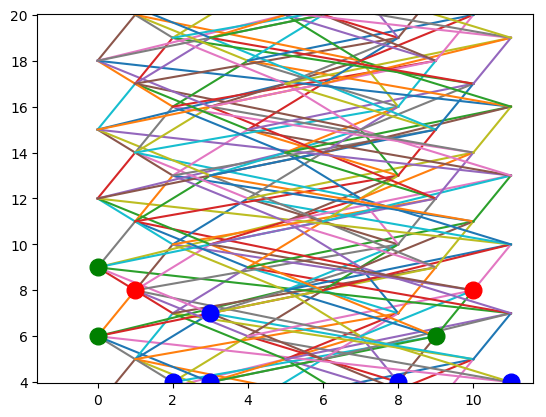

plaqColor =  [1. 0. 2. 2. 1. 0. 0. 1. 2. 1. 0. 2.]
paulibeforeerr =  Y
pauliaftererr =  X
t =  6
t =  7
predbefore =  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
predafter =  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


1

In [37]:
Nq=24;T=20;err=.2;Nc=1;
errduration=1; numedge=36; tinit=5;
errpaulitype="Y"; lattice="honeycombGraph";
errededge=np.zeros(numedge*errduration);

plbefore, plafter, dps, spl, plc = FloquetSyndromeGen(Nq, T, Nc, err, tinit, 
                                                      errduration, "honeycombGraph");

#a=findSyndromeFromError(24, 7, 9, "Z", "honeycombGraph")
_, _, spacetimeedge = honeycombGraph(24);
for stc in range(np.shape(spl)[0]):    
    plt.plot([spl[stc][0]-1, spl[stc][1]-1], [spl[stc][2], spl[stc][3]], "-")        
colorvec = ["red", "green", "blue"]
for nc in range(1):
    for t in range(2, np.shape(dps)[1]):
        #print("t shifted from julia = ", t+1)
        for n in range(np.shape(dps)[2]):
            if dps[nc, t, n]!=0:
                plt.plot(n, t+1, marker="o", markersize=12, color=colorvec[int(plc[n])])
            
plt.ylim([3.95, T+0.05])
plt.show()

#qbitindex=9; errtime=7;
#plaqandtime, syndbefore, syndafter = findSyndromeFromError(Nq, qbitindex, errtime, errpaulitype, lattice);

#plaqsyndbefore =  np.array([[ 0.  0. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.
#   0.  0.  0.  0.  0.  0.]])
PyMatchingDecoder(Nq, T, plbefore, plafter, err, tinit,
    errduration, lattice)

In [25]:
errduration=1; numedge=36; tinit=4; errduration=1; qbitindex=9; errtime=7; 
errpaulitype="Y"; Nq=24; T=12; lattice="honeycombGraph"; errprob=0.1;
errededge=np.zeros(numedge*errduration);
plaqandtime, syndbefore, syndafter = findSyndromeFromError(Nq, qbitindex, 
    errtime, errpaulitype, lattice);

errorcolor =  2
paulibeforeerr =  X
pauliaftererr =  Z
plaqcolormeasuredatt = 2, Y
incidentplaqvertex =  [ 2  4 10]
p = 2, plaqColor[2]=2.0
p = 4, plaqColor[4]=1.0
p = 10, plaqColor[10]=0.0
plaqandtime =  [[2, 7], [2, 10], [4, 9], [10, 8]]
t =  7
t =  8
incidentedgevertex =  [ 2 17 30]
edgecolor = 2,0
errededge =  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
edgecolor = 17,1
errededge =  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
edgecolor = 30,2


ValueError: could not broadcast input array from shape (0) into shape (12)

In [ ]:
def repetition_code(n):
    """
    Parity check matrix of a repetition code with length n.
    """
    row_ind, col_ind = zip(*((i, j) for i in range(n) for j in (i, (i+1)%n)))
    #print("row_ind = ", row_ind)
    #print("col_ind = ", col_ind)    
    data = np.ones(2*n, dtype=np.uint8)
    
    print(csc_matrix((data, (row_ind, col_ind))).toarray())
    return csc_matrix((data, (row_ind, col_ind))).toarray()


def toric_code_x_stabilisers(L):    
    """
    Sparse check matrix for the X stabilisers of a toric code with
    lattice size L, constructed as the hypergraph product of
    two repetition codes.
    """    
    Hr = repetition_code(L)
    H = hstack(
            [kron(Hr, eye(Hr.shape[1])), kron(eye(Hr.shape[0]), Hr.T)],
            dtype=np.uint8
        )
    
    H.data = H.data % 2
    print("H.data = ", H.data)
    H.eliminate_zeros()
    
    print("H.toarray = ", H.toarray())
    return csc_matrix(H)
def toric_code_x_logicals(L):
    """
    Sparse binary matrix with each row corresponding to an X logical operator 
    of a toric code with lattice size L. Constructed from the 
    homology groups of the repetition codes using the Kunneth 
    theorem.
    """
    H1 = csc_matrix(([1], ([0],[0])), shape=(1,L), dtype=np.uint8)
    H0 = csc_matrix(np.ones((1, L), dtype=np.uint8))
    x_logicals = block_diag([kron(H1, H0), kron(H0, H1)])
    x_logicals.data = x_logicals.data % 2
    x_logicals.eliminate_zeros()
    return csc_matrix(x_logicals)



def num_decoding_failures_via_physical_frame_changes(H, logicals, error_probability, num_shots):
    matching = Matching.from_check_matrix(H, weights=np.log((1-error_probability)/error_probability))
    num_errors = 0
    for i in range(num_shots):
        noise = (np.random.random(H.shape[1]) < error_probability).astype(np.uint8)
        #print("shape H = ", np.shape(H))
        syndrome = H@noise % 2
        # Shape H: [H]_{num_synd * num_qubits}
        # Shape noise: num_qubits        
        #print("shape syndrome = ", np.shape(syndrome))
        prediction = matching.decode(syndrome)
        print("prediction = ", prediction)
        predicted_logicals_flipped = logicals@prediction % 2
        actual_logicals_flipped = logicals@noise % 2
        if not np.array_equal(predicted_logicals_flipped, actual_logicals_flipped):
            num_errors += 1
    return num_errors

L=3;p=0.1;num_shots=10; #numqubits = 2*(L+1)^2;
Hx = toric_code_x_stabilisers(L)
logX = toric_code_x_logicals(L)
log_errors = []
#for p in ps:
#num_errors = num_decoding_failures_vectorised(Hx, logX, p, num_shots)
#num_errors = num_decoding_failures(Hx, logX, p, num_shots)
num_errors = num_decoding_failures_via_physical_frame_changes(Hx, logX, p, num_shots)

s = toric_code_x_stabilisers(2)

In [26]:
def hyperbolicSuperGraph(N):
    if N==144:
        edges = [[0, 1],
        [0, 2],[0, 5],[0, 10],[1, 3],[1, 6],[1, 11],[2, 4],[2, 9],[2, 19],[3, 7],[3, 14],[3, 21],[4, 8],[4, 16],[4, 23],[5, 13],[5, 22],[5, 24],[6, 12],[6, 23],[6, 35],[7, 15],[7, 26],[7, 33],[8, 15],[8, 20],[8, 29],[9, 12],[9, 18],[9, 30],[10, 17],[10, 26],[10, 29],[11, 25],[11, 30],[11, 34],[12, 20],[12, 31],[13, 27],[13, 28],[13, 30],[14, 19],[14, 22],[14, 29],[15, 28],[15, 35],[16, 17],[16, 22],[16, 31],[17, 25],[17, 28],[18, 22],[18, 32],[18, 33],[19, 27],[19, 35],[20, 25],[20, 27],[21, 24],[21, 31],[21, 32],[23, 26],[23, 32],[24, 25],[24, 35],[26, 30],[27, 33],[28, 32],[29, 34],[31, 34],
        [33, 34]];
        numEdge = np.shape(edges)[0];      
        dualEdges = [[0, 1],
        [0, 2],
        [0, 3],[0, 4],[0, 6],[0, 9],[0, 11],[0, 15],[1, 5],[1, 7],[1, 10],[1, 12],[1, 13],[1, 14],[1, 16],[2, 5],[2, 7],[2, 8],[2, 12],[2, 13],[2, 14],[2, 16],[3, 7],[3, 8],[3, 10],[3, 12],[3, 13],[3, 14],[3, 16],[4, 5],[4, 7],[4, 8],[4, 10],[4, 12],[4, 13],[4, 16],[5, 6],[5, 9],[5, 11],[5, 15],[5, 17],[6, 8],[6, 10],[6, 12],[6, 13],[6, 14],[6, 16],[7, 9],[7, 11],[7, 15],[7, 17],[8, 9],[8, 11],[8, 15],[8, 17],[9, 10],[9, 13],[9, 14],[9, 16],[10, 11],[10, 15],[10, 17],[11, 12],[11, 14],[11, 16],[12, 15],[12, 17],[13, 15],[13, 17],[14, 15],[14, 17],
                     [16, 17]];
        superLogicals = np.array([[6, 23, 4, 2, 0, 1],
        [9, 12, 6, 1, 0, 2],
        [10, 26, 7, 3, 1, 0],[10, 29, 8, 4, 2, 0],[11, 30, 9, 2, 0, 1],[12, 20, 8, 4, 2, 0, 1, 6],[13, 30, 9, 2, 0, 5],[14, 19, 2, 0, 1, 3],[14, 22, 5, 0, 1, 3],[14, 29, 8, 4, 2, 0, 1, 3],[15, 28, 13, 5, 0, 1, 3, 7],[15, 35, 6, 1, 3, 7],[16, 17, 10, 0, 2, 4],[16, 22, 5, 0, 2, 4],[16, 31, 12, 6, 1, 0, 2, 4],[18, 33, 7, 3, 1, 0, 2, 9],[19, 27, 13, 5, 0, 2],[19, 35, 6, 1, 0, 2],[20, 25, 11, 1, 0, 2, 4, 8],
        [21, 24, 5, 0, 1, 3]]);

        numLogical = np.shape(superLogicals)[0]
        #print("numLogical = ", numLogical)
        #lenLogical = np.shape(superLogicals)[1]

        dualSuperLogicals = np.array([[2, 7, 1, 0],
                        [2, 12, 1, 0], 
        [2, 13, 1, 0],[2, 14, 1, 0],[2, 16, 1, 0],[3, 8, 2, 0],[3, 10, 1, 0],[3, 12, 1, 0],[3, 13, 1, 0],[3, 14, 1, 0],[4, 5, 1, 0],[4, 7, 1, 0],[4, 10, 1, 0],[4, 13, 1, 0],[5, 6, 0, 1],[5, 9, 0, 1],[5, 11, 0, 1],[5, 15, 0, 1],[6, 10, 1, 0],
        [8, 9, 0, 2]]);
        numDualLogical = np.shape(dualSuperLogicals)[0]
        
        plaquettes = [[0, 1, 3, 7, 15, 8, 4, 2],
        [0, 1, 6, 12, 20, 27, 13, 5],
        [0, 2, 9, 18, 32, 28, 17, 10],[1, 3, 14, 22, 16, 17, 25, 11],[2, 4, 16, 31, 34, 33, 27, 19],[0, 5, 24, 21, 31, 34, 29, 10],[3, 7, 26, 30, 9, 12, 31, 21],[1, 6, 23, 32, 18, 33, 34, 11],[2, 9, 30, 11, 25, 24, 35, 19],[4, 8, 20, 25, 24, 21, 32, 23],[4, 16, 22, 5, 13, 30, 26, 23],[5, 22, 18, 33, 7, 15, 35, 24],[6, 12, 31, 16, 17, 28, 15, 35],[3, 14, 19, 27, 13, 28, 32, 21],[8, 20, 12, 9, 18, 22, 14, 29],[8, 15, 28, 13, 30, 11, 34, 29],[7, 26, 10, 17, 25, 20, 27, 33],
        [6, 23, 26, 10, 29, 14, 19, 35]];
    
        dualPlaquettes = [[0, 1, 5, 2],
        [0, 1, 7, 3],
        [0, 2, 8, 4],[0, 3, 13, 6],[0, 4, 10, 9],[1, 5, 11, 10],[1, 7, 17, 12],[0, 6, 16, 11],[0, 9, 14, 15],[2, 8, 6, 14],[2, 5, 17, 16],[3, 7, 15, 8],[1, 12, 6, 14],[1, 10, 15, 13],[3, 13, 17, 14],[0, 11, 12, 15],[3, 10, 4, 12],[2, 12, 3, 16],[2, 7, 11, 14],[4, 8, 17, 13],[1, 14, 9, 16],[5, 6, 13, 9],[3, 10, 11, 14],[7, 9, 10, 17],[5, 9, 8, 11],[3, 8, 9, 16],[6, 10, 17, 16],[1, 13, 4, 16],[2, 12, 15, 13],[5, 15, 14, 17],[6, 8, 15, 10],[4, 5, 6, 12],[2, 7, 9, 13],[4, 7, 11, 16],[4, 5, 15, 7],
        [8, 11, 12, 17]];
        
        
    elif N==400:
        edges=[[0, 1],
        [0, 2],[0, 5],[0, 8],[1, 3],[1, 7],[1, 14],[2, 4],[2, 10],[2, 18],[3, 6],[3, 11],[3, 22],[4, 9],[4, 16],[4, 30],[5, 12],[5, 26],[5, 44],[6, 13],[6, 27],[6, 45],[7, 15],[7, 21],[7, 42],[8, 17],[8, 34],[8, 56],[9, 13],[9, 35],[9, 57],[10, 19],[10, 29],[10, 54],[11, 20],[11, 46],[11, 69],[12, 24],[12, 36],[12, 65],[13, 37],[13, 49],[14, 25],[14, 39],[14, 66],[15, 23],[15, 28],[15, 72],[16, 28],[16, 58],[16, 69],[17, 32],[17, 48],[17, 83],[18, 33],[18, 51],[18, 71],[19, 20],[19, 31],[19, 86],[20, 43],[20, 65],[21, 38],[21, 68],[21, 75],[22, 40],[22, 50],[22, 93],[23, 24],[23, 51],[23, 87],[24, 57],[24, 77],[25, 41],[25, 60],[25, 67],[26, 47],[26, 62],[26, 81],[27, 36],[27, 55],[27, 63],[28, 55],[28, 83],[29, 50],[29, 75],[29, 84],[30, 38],[30, 52],[30, 93],[31, 32],[31, 39],[31, 73],[32, 45],[32, 90],[33, 53],[33, 67],[33, 78],[34, 59],[34, 63],[34, 80],[35, 43],[35, 48],[35, 81],[36, 68],[36, 96],[37, 44],[37, 60],[37, 79],[38, 47],[38, 70],[39, 61],[39, 91],[40, 71],[40, 83],[40, 88],[41, 43],[41, 87],[41, 92],[42, 64],[42, 78],[42, 90],[43, 97],[44, 73],[44, 94],[45, 74],[45, 92],[46, 62],[46, 76],[46, 98],[47, 67],[47, 86],[48, 84],[48, 96],[49, 56],[49, 61],[49, 78],[50, 59],[50, 85],[51, 79],[51, 91],[52, 65],[52, 66],[52, 74],[53, 55],[53, 73],[53, 98],[54, 60],[54, 77],[54, 82],[55, 97],[56, 87],[56, 95],[57, 88],[57, 98],[58, 80],[58, 89],[58, 92],[59, 67],[59, 72],[60, 83],[61, 70],[61, 76],[62, 90],[62, 99],[63, 64],[63, 91],[64, 88],[64, 94],[65, 78],[66, 84],[66, 99],[68, 71],[68, 95],[69, 94],[69, 95],[70, 77],[70, 97],[71, 99],[72, 74],[72, 76],[73, 93],[74, 82],[75, 92],[75, 98],[76, 96],[77, 80],[79, 85],[79, 89],[80, 99],[81, 82],[81, 91],[82, 95],[84, 94],[85, 90],[85, 97],[86, 88],[86, 89],[87, 93],
        [89, 96]];
        
        numEdge = np.shape(edges)[0];      
        dualEdges = [[0, 1],
        [0, 2],[0, 3],[0, 4],[0, 7],[0, 9],[0, 11],[0, 15],[1, 5],[1, 6],[1, 10],[1, 13],[1, 18],[1, 22],[1, 31],[2, 6],[2, 8],[2, 14],[2, 17],[2, 24],[2, 28],[2, 40],[3, 5],[3, 12],[3, 14],[3, 17],[3, 23],[3, 32],[3, 38],[4, 8],[4, 10],[4, 13],[4, 16],[4, 29],[4, 32],[4, 41],[5, 21],[5, 25],[5, 30],[5, 37],[5, 42],[5, 43],[6, 19],[6, 25],[6, 30],[6, 39],[6, 44],[6, 49],[7, 10],[7, 12],[7, 20],[7, 28],[7, 29],[7, 31],[7, 45],[8, 19],[8, 27],[8, 37],[8, 39],[8, 43],[8, 46],[9, 14],[9, 16],[9, 22],[9, 23],[9, 26],[9, 40],[9, 45],[10, 19],[10, 35],[10, 42],[10, 47],[10, 48],[11, 17],[11, 18],[11, 20],[11, 23],[11, 36],[11, 40],[11, 41],[12, 33],[12, 34],[12, 39],[12, 42],[12, 43],[12, 49],[13, 15],[13, 21],[13, 33],[13, 34],[13, 39],[13, 48],[14, 25],[14, 34],[14, 46],[14, 47],[14, 48],[15, 24],[15, 26],[15, 29],[15, 31],[15, 36],[15, 38],[16, 30],[16, 33],[16, 35],[16, 43],[16, 44],[16, 46],[17, 27],[17, 30],[17, 33],[17, 35],[17, 48],[18, 30],[18, 34],[18, 37],[18, 46],[18, 47],[18, 49],[19, 23],[19, 26],[19, 28],[19, 36],[19, 38],[20, 21],[20, 25],[20, 33],[20, 39],[20, 46],[20, 47],[21, 28],[21, 32],[21, 38],[21, 40],[21, 45],[22, 25],[22, 27],[22, 33],[22, 35],[22, 37],[22, 49],[23, 37],[23, 39],[23, 44],[23, 48],[24, 35],[24, 37],[24, 39],[24, 42],[24, 44],[24, 47],[25, 29],[25, 36],[25, 41],[26, 27],[26, 30],[26, 33],[26, 42],[26, 47],[27, 31],[27, 32],[27, 41],[27, 45],[28, 33],[28, 34],[28, 37],[28, 44],[29, 30],[29, 37],[29, 48],[29, 49],[30, 45],[31, 43],[31, 44],[31, 46],[31, 48],[32, 42],[32, 44],[32, 46],[32, 49],[34, 36],[34, 41],[34, 45],[35, 36],[35, 38],[35, 45],[36, 42],[36, 46],[38, 43],[38, 47],[38, 49],[39, 45],[40, 42],[40, 43],[40, 48],[40, 49],[41, 43],[41, 44],
        [41, 47]]
        

        superLogicals = np.array([[16, 28, 15, 7, 1, 0, 2, 4],
        [16, 69, 11, 3, 1, 0, 2, 4],[19, 20, 11, 3, 1, 0, 2, 10],[20, 65, 12, 5, 0, 1, 3, 11],[23, 51, 18, 2, 0, 1, 7, 15],[24, 57, 9, 4, 2, 0, 5, 12],[27, 36, 12, 5, 0, 1, 3, 6],[28, 55, 27, 6, 3, 1, 7, 15],[28, 83, 17, 8, 0, 1, 7, 15],[29, 50, 22, 3, 1, 0, 2, 10],[29, 75, 21, 7, 1, 0, 2, 10],[30, 38, 21, 7, 1, 0, 2, 4],[30, 93, 22, 3, 1, 0, 2, 4],[31, 39, 14, 1, 0, 2, 10, 19],[32, 45, 6, 3, 1, 0, 8, 17],[33, 67, 25, 14, 1, 0, 2, 18],[34, 63, 27, 6, 3, 1, 0, 8],[35, 43, 20, 11, 3, 1, 0, 2, 4, 9],[35, 48, 17, 8, 0, 2, 4, 9],[35, 81, 26, 5, 0, 2, 4, 9],[36, 68, 21, 7, 1, 0, 5, 12],[37, 44, 5, 0, 1, 3, 6, 13],[37, 60, 25, 14, 1, 3, 6, 13],[38, 47, 26, 5, 0, 1, 7, 21],[40, 71, 18, 2, 0, 1, 3, 22],[40, 83, 17, 8, 0, 1, 3, 22],[41, 87, 23, 15, 7, 1, 14, 25],[42, 78, 33, 18, 2, 0, 1, 7],[42, 90, 32, 17, 8, 0, 1, 7],[44, 73, 31, 19, 10, 2, 0, 5],[45, 92, 41, 25, 14, 1, 3, 6],[46, 62, 26, 5, 0, 1, 3, 11],[47, 67, 25, 14, 1, 0, 5, 26],[47, 86, 19, 10, 2, 0, 5, 26],[48, 84, 29, 10, 2, 0, 8, 17],[49, 56, 8, 0, 1, 3, 6, 13],[49, 61, 39, 14, 1, 3, 6, 13],[49, 78, 33, 18, 2, 0, 1, 3, 6, 13],[50, 59, 34, 8, 0, 1, 3, 22],[51, 79, 37, 13, 6, 3, 1, 0, 2, 18],[51, 91, 39, 14, 1, 0, 2, 18],[52, 65, 12, 5, 0, 2, 4, 30],[52, 66, 14, 1, 0, 2, 4, 30],[52, 74, 45, 6, 3, 1, 0, 2, 4, 30],[53, 98, 46, 11, 3, 1, 0, 2, 18, 33],[54, 60, 25, 14, 1, 0, 2, 10],[55, 97, 43, 20, 11, 3, 6, 27],[57, 88, 40, 22, 3, 1, 0, 2, 4, 9],[58, 80, 34, 8, 0, 2, 4, 16],[60, 83, 17, 8, 0, 1, 14, 25],[62, 90, 32, 17, 8, 0, 5, 26],
        [63, 64, 42, 7, 1, 3, 6, 27]])
        numLogical = np.shape(superLogicals)[0]        
        
        dualSuperLogicals = np.array([[3, 14, 2, 0],
        [3, 17, 2, 0],
        [4, 10, 1, 0],[4, 13, 1, 0],[4, 32, 3, 0],[6, 25, 5, 1],[6, 30, 5, 1],[7, 10, 1, 0],[7, 28, 2, 0],[7, 29, 4, 0],[7, 31, 1, 0],[8, 19, 6, 1, 0, 2],[8, 37, 5, 1, 0, 2],[8, 39, 6, 1, 0, 2],[8, 43, 5, 1, 0, 2],[9, 14, 2, 0],[9, 22, 1, 0],[9, 23, 3, 0],[9, 40, 2, 0],[9, 45, 7, 0],[10, 42, 5, 1],[11, 17, 2, 0],[11, 18, 1, 0],[11, 23, 3, 0],[11, 40, 2, 0],[11, 41, 4, 0],[12, 39, 6, 1, 0, 3],[12, 42, 5, 1, 0, 3],[13, 15, 0, 1],[13, 33, 12, 3, 0, 1],[13, 34, 12, 3, 0, 1],[13, 39, 6, 1],[13, 48, 10, 1],[14, 34, 12, 3, 0, 2],[14, 46, 8, 2],[14, 47, 10, 1, 0, 2],[14, 48, 10, 1, 0, 2],[15, 24, 2, 0],[15, 29, 4, 0],[15, 31, 1, 0],[15, 38, 3, 0],[16, 30, 5, 1, 0, 4],[16, 46, 8, 2, 0, 4],[17, 30, 5, 1, 0, 2],[17, 35, 10, 1, 0, 2],[18, 37, 5, 1],[18, 47, 10, 1],[19, 23, 3, 0, 1, 6],[19, 28, 2, 0, 1, 6],[19, 38, 3, 0, 1, 6],[20, 33, 12, 3, 0, 7],
        [22, 25, 5, 1]])
        
        numDualLogical = np.shape(dualSuperLogicals)[0]        
        
        plaquettes = [[0, 1, 3, 6, 13, 9, 4, 2],
        [0, 1, 7, 15, 23, 24, 12, 5],
        [0, 2, 10, 19, 31, 32, 17, 8],[1, 3, 11, 20, 43, 41, 25, 14],[2, 4, 16, 28, 55, 53, 33, 18],[1, 7, 21, 38, 70, 61, 39, 14],[0, 5, 26, 47, 67, 59, 34, 8],[3, 6, 27, 36, 68, 71, 40, 22],[2, 10, 29, 50, 85, 79, 51, 18],[4, 9, 35, 48, 84, 66, 52, 30],[5, 12, 36, 27, 55, 53, 73, 44],[6, 13, 37, 60, 54, 82, 74, 45],[3, 11, 46, 76, 72, 59, 50, 22],[7, 15, 28, 16, 69, 94, 64, 42],[8, 17, 48, 35, 43, 41, 87, 56],[9, 13, 49, 78, 42, 64, 88, 57],[4, 16, 58, 89, 86, 47, 38, 30],[10, 19, 20, 11, 69, 95, 82, 54],[15, 23, 51, 91, 81, 82, 74, 72],[5, 26, 62, 90, 85, 79, 37, 44],[6, 27, 63, 34, 80, 58, 92, 45],[7, 21, 75, 92, 45, 32, 90, 42],[12, 24, 77, 80, 99, 66, 52, 65],[14, 25, 60, 37, 44, 94, 84, 66],[19, 31, 39, 91, 63, 64, 88, 86],[8, 34, 80, 77, 70, 61, 49, 56],[9, 35, 81, 26, 62, 46, 98, 57],[10, 29, 75, 98, 57, 24, 77, 54],[17, 32, 90, 62, 99, 71, 40, 83],[18, 33, 78, 49, 56, 95, 68, 71],[21, 38, 47, 26, 81, 82, 95, 68],[22, 40, 88, 57, 24, 23, 87, 93],[25, 41, 92, 75, 98, 53, 33, 67],[11, 46, 62, 99, 80, 58, 16, 69],[15, 28, 83, 17, 48, 96, 76, 72],[12, 36, 96, 89, 86, 19, 20, 65],[13, 37, 79, 89, 96, 76, 61, 49],[14, 39, 91, 51, 18, 71, 99, 66],[20, 43, 97, 85, 90, 42, 78, 65],[29, 50, 59, 34, 63, 64, 94, 84],[30, 52, 74, 45, 32, 31, 73, 93],[28, 55, 97, 70, 77, 54, 60, 83],[31, 39, 61, 76, 46, 98, 53, 73],[22, 50, 85, 97, 70, 38, 30, 93],[25, 60, 83, 40, 88, 86, 47, 67],[21, 68, 36, 96, 48, 84, 29, 75],[23, 51, 79, 89, 58, 92, 41, 87],[27, 55, 97, 43, 35, 81, 91, 63],[44, 73, 93, 87, 56, 95, 69, 94],
        [33, 67, 59, 72, 74, 52, 65, 78]]
        dualPlaquettes = [[0, 1, 6, 2],
        [0, 1, 5, 3],
        [0, 2, 8, 4],[0, 3, 12, 7],[0, 4, 16, 9],[1, 6, 19, 10],[0, 7, 20, 11],[1, 5, 21, 13],[2, 6, 25, 14],[0, 9, 26, 15],[2, 8, 27, 17],[3, 12, 33, 17],[1, 10, 35, 22],[0, 11, 36, 15],[3, 5, 37, 23],[1, 13, 34, 18],[4, 13, 33, 16],[2, 14, 34, 28],[4, 8, 37, 29],[2, 17, 35, 24],[3, 17, 35, 38],[5, 21, 45, 30],[7, 12, 43, 31],[1, 18, 46, 31],[1, 22, 27, 31],[3, 23, 44, 32],[6, 19, 26, 30],[7, 10, 47, 20],[4, 13, 34, 41],[8, 27, 45, 39],[9, 16, 43, 40],[2, 24, 42, 40],[2, 28, 21, 40],[4, 29, 49, 32],[6, 25, 20, 39],[9, 14, 47, 26],[7, 10, 35, 45],[11, 23, 19, 36],[5, 30, 16, 43],[5, 37, 24, 42],[7, 28, 44, 31],[3, 14, 46, 32],[13, 15, 38, 21],[3, 14, 47, 38],[10, 19, 23, 48],[11, 20, 21, 40],[12, 33, 26, 42],[6, 30, 16, 44],[9, 14, 34, 45],[15, 29, 25, 36],[8, 39, 12, 43],[8, 37, 18, 46],[9, 22, 49, 40],[4, 10, 42, 32],[11, 17, 27, 41],[4, 10, 47, 41],[14, 25, 29, 48],[15, 26, 27, 31],[16, 33, 20, 46],[6, 39, 12, 49],[11, 23, 44, 41],[5, 25, 36, 42],[19, 26, 33, 28],[20, 39, 24, 47],[13, 15, 24, 39],[22, 35, 38, 49],[9, 22, 37, 23],[6, 44, 32, 49],[7, 29, 30, 45],[13, 33, 17, 48],[5, 25, 41, 43],[7, 28, 37, 29],[12, 34, 18, 49],[10, 42, 40, 48],[11, 18, 49, 40],[21, 32, 27, 45],[12, 34, 36, 42],[22, 25, 41, 27],[15, 29, 49, 38],[8, 19, 36, 46],[20, 25, 22, 33],[18, 30, 26, 47],[11, 17, 30, 18],[28, 34, 41, 44],[9, 23, 39, 45],[8, 19, 38, 43],[16, 35, 24, 44],[14, 46, 31, 48],[15, 24, 44, 31],[16, 35, 36, 46],[19, 28, 21, 38],[18, 37, 24, 47],[20, 21, 32, 46],[31, 43, 40, 48],[13, 39, 23, 48],[17, 30, 29, 48],[34, 36, 35, 45],[38, 43, 41, 47],[26, 27, 32, 42],
        [22, 33, 28, 37]]
    elif N==2160:
        edges=[
        [0, 1],[0, 2],[0, 5],[0, 10],[1, 3],[1, 6],[1, 11],[2, 4],[2, 9],[2, 19],[3, 7],[3, 14],[3, 21],[4, 8],[4, 16],[4, 34],[5, 13],[5, 24],[5, 36],[6, 12],[6, 23],[6, 49],[7, 15],[7, 26],[7, 38],[8, 15],[8, 29],[8, 61],[9, 18],[9, 32],[9, 50],[10, 17],[10, 31],[10, 63],[11, 25],[11, 43],[11, 65],[12, 20],[12, 40],[12, 84],[13, 27],[13, 45],[13, 67],[14, 22],[14, 42],[14, 86],[15, 47],[15, 52],[16, 33],[16, 57],[16, 89],[17, 28],[17, 54],[17, 108],[18, 35],[18, 59],[18, 91],[19, 30],[19, 56],[19, 110],[20, 27],[20, 69],[20, 144],[21, 44],[21, 76],[21, 111],[22, 37],[22, 71],[22, 146],[23, 46],[23, 78],[23, 113],[24, 39],[24, 73],[24, 148],[25, 48],[25, 80],[25, 115],[26, 41],[26, 75],[26, 150],[27, 82],[27, 117],[28, 35],[28, 93],[28, 180],[29, 58],[29, 100],[29, 153],[30, 51],[30, 95],[30, 182],[31, 60],[31, 102],[31, 155],[32, 53],[32, 97],[32, 184],[33, 62],[33, 104],[33, 157],[34, 55],[34, 99],[34, 186],[35, 106],[35, 159],[36, 77],[36, 130],[36, 187],[37, 48],[37, 119],[37, 233],[38, 79],[38, 132],[38, 189],[39, 64],[39, 121],[39, 235],[40, 81],[40, 134],[40, 191],[41, 66],[41, 123],[41, 237],[42, 83],[42, 136],[42, 193],[43, 68],[43, 125],[43, 238],[44, 85],[44, 138],[44, 194],[45, 70],[45, 127],[45, 240],[46, 87],[46, 140],[46, 196],[47, 72],[47, 129],[47, 242],[48, 142],[48, 198],[49, 74],[49, 131],[49, 244],[50, 101],[50, 169],[50, 247],[51, 62],[51, 128],[51, 286],[52, 103],[52, 171],[52, 249],[53, 88],[53, 140],[53, 288],[54, 105],[54, 172],[54, 251],[55, 90],[55, 163],[55, 254],[56, 107],[56, 174],[56, 253],[57, 92],[57, 165],[57, 289],[58, 109],[58, 176],[58, 255],[59, 94],[59, 120],[59, 291],[60, 64],[60, 177],[60, 257],[61, 96],[61, 168],[61, 292],[62, 178],[62, 259],[63, 98],[63, 170],[63, 294],[64, 200],[64, 284],[65, 133],[65, 214],[65, 295],[66, 85],[66, 202],[66, 340],[67, 135],[67, 216],[67, 297],[68, 87],[68, 203],[68, 341],[69, 137],[69, 218],[69, 242],[70, 112],[70, 163],[70, 204],[71, 139],[71, 141],[71, 281],[72, 114],[72, 206],[72, 305],[73, 141],[73, 221],[73, 300],[74, 90],[74, 116],[74, 208],[75, 143],[75, 221],[75, 302],[76, 118],[76, 210],[76, 344],[77, 145],[77, 147],[77, 223],[78, 120],[78, 165],[78, 346],[79, 147],[79, 225],[79, 304],[80, 122],[80, 212],[80, 348],[81, 149],[81, 225],[81, 227],[82, 124],[82, 153],[82, 213],[83, 121],[83, 151],[83, 306],[84, 126],[84, 215],[84, 350],[85, 101],[85, 308],[86, 128],[86, 217],[86, 352],[87, 231],[87, 310],[88, 107],[88, 261],[88, 382],[89, 142],[89, 271],[89, 354],[90, 109],[90, 369],[91, 173],[91, 273],[91, 356],[92, 152],[92, 177],[92, 384],[93, 150],[93, 175],[93, 230],[94, 154],[94, 227],[94, 264],[95, 122],[95, 275],[95, 358],[96, 156],[96, 264],[96, 361],[97, 134],[97, 136],[97, 332],[98, 156],[98, 158],[98, 266],[99, 179],[99, 277],[99, 359],[100, 160],[100, 268],[100, 386],[101, 181],[101, 279],[102, 161],[102, 268],[102, 317],[103, 183],[103, 280],[103, 362],[104, 161],[104, 162],[104, 205],[105, 138],[105, 185],[105, 204],[106, 164],[106, 249],[106, 270],[107, 282],[107, 320],[108, 166],[108, 272],[108, 345],[109, 219],[109, 363],[110, 167],[110, 274],[110, 390],[111, 219],[111, 322],[111, 392],[112, 145],[112, 312],[112, 427],[113, 220],[113, 324],[113, 372],[114, 147],[114, 167],[114, 429],[115, 173],[115, 252],[115, 326],[116, 149],[116, 164],[116, 211],[117, 222],[117, 328],[117, 365],[118, 151],[118, 313],[118, 329],[119, 224],[119, 292],[119, 330],[120, 188],[120, 283],[121, 226],[121, 291],[122, 190],[122, 227],[123, 226],[123, 228],[123, 229],[124, 192],[124, 195],[124, 314],[125, 229],[125, 277],[125, 332],[126, 182],[126, 237],[126, 361],[127, 136],[127, 230],[127, 298],[128, 195],[128, 283],[129, 232],[129, 332],[129, 395],[130, 197],[130, 315],[130, 360],[131, 234],[131, 334],[131, 397],[132, 199],[132, 317],[132, 431],[133, 183],[133, 236],[133, 258],[134, 201],[134, 293],[135, 157],[135, 194],[135, 362],[136, 268],[137, 181],[137, 239],[137, 250],[138, 319],[138, 415],[139, 204],[139, 241],[139, 280],[140, 205],[140, 281],[141, 243],[141, 279],[142, 201],[142, 207],[143, 203],[143, 245],[143, 399],[144, 209],[144, 321],[144, 425],[145, 220],[145, 224],[146, 166],[146, 323],[146, 370],[147, 400],[148, 211],[148, 325],[148, 418],[149, 265],[149, 402],[150, 327],[150, 417],[151, 338],[151, 404],[152, 179],[152, 365],[152, 460],[153, 373],[153, 435],[154, 181],[154, 224],[154, 462],[155, 276],[155, 374],[155, 394],[156, 183],[156, 449],[157, 331],[157, 375],[158, 185],[158, 265],[158, 269],[159, 278],[159, 377],[159, 436],[160, 246],[160, 282],[160, 463],[161, 208],[161, 248],[162, 204],[162, 206],[162, 250],[163, 378],[163, 437],[164, 241],[164, 252],[165, 172],[165, 221],[166, 254],[166, 305],[167, 234],[167, 256],[168, 285],[168, 300],[168, 439],[169, 258],[169, 324],[169, 440],[170, 287],[170, 343],[170, 379],[171, 260],[171, 346],[171, 464],[172, 213],[172, 388],[173, 255],[173, 304],[174, 210],[174, 262],[174, 346],[175, 207],[175, 290],[175, 314],[176, 228],[176, 262],[176, 263],[177, 191],[177, 263],[178, 189],[178, 265],[178, 307],[179, 371],[179, 380],[180, 267],[180, 338],[180, 372],[181, 276],[182, 239],[182, 316],[183, 443],[184, 269],[184, 328],[184, 334],[185, 342],[185, 445],[186, 202],[186, 376],[186, 465],[187, 329],[187, 413],[187, 467],[188, 234],[188, 405],[188, 491],[189, 355],[189, 469],[190, 236],[190, 256],[190, 493],[191, 323],[191, 415],[192, 194],[192, 320],[192, 359],[193, 315],[193, 321],[193, 331],[194, 278],[195, 241],[195, 318],[196, 276],[196, 417],[196, 471],[197, 219],[197, 243],[197, 406],[198, 261],[198, 333],[198, 418],[199, 245],[199, 408],[199, 421],[200, 308],[200, 420],[200, 425],[201, 296],[201, 424],[202, 287],[202, 312],[203, 240],[203, 335],[205, 299],[205, 409],[206, 335],[206, 336],[207, 250],[207, 301],[208, 327],[208, 393],[209, 254],[209, 303],[209, 409],[210, 300],[210, 336],[211, 288],[211, 305],[212, 218],[212, 221],[212, 393],[213, 337],[213, 355],[214, 303],[214, 307],[214, 410],[215, 251],[215, 339],[215, 429],[216, 309],[216, 348],[216, 363],[217, 266],[217, 325],[217, 473],[218, 311],[218, 376],[219, 342],[220, 255],[220, 306],[222, 304],[222, 343],[222, 368],[223, 229],[223, 271],[223, 388],[224, 345],[225, 411],[225, 448],[226, 347],[226, 368],[227, 228],[228, 314],[229, 349],[230, 351],[230, 366],[231, 286],[231, 365],[231, 412],[232, 313],[232, 353],[232, 474],[233, 316],[233, 414],[233, 489],[234, 367],[235, 318],[235, 354],[235, 459],[236, 312],[236, 331],[237, 269],[237, 387],[238, 318],[238, 416],[238, 432],[239, 329],[239, 431],[240, 273],[240, 358],[241, 458],[242, 389],[242, 470],[243, 423],[243, 476],[244, 320],[244, 419],[244, 497],[245, 425],[245, 478],[246, 285],[246, 436],[246, 511],[247, 341],[247, 453],[247, 498],[248, 287],[248, 398],[248, 512],[249, 296],[249, 499],[250, 407],[251, 282],[251, 348],[252, 371],[252, 439],[253, 301],[253, 438],[253, 454],[254, 290],[255, 299],[256, 342],[256, 370],[257, 301],[257, 352],[257, 405],[258, 293],[258, 336],[259, 326],[259, 455],[259, 500],[260, 353],[260, 380],[260, 487],[261, 338],[261, 457],[262, 266],[262, 357],[263, 333],[263, 335],[264, 406],[264, 409],[265, 297],[266, 298],[267, 335],[267, 360],[267, 361],[268, 275],[269, 384],[270, 275],[270, 322],[270, 381],[271, 374],[271, 479],[272, 340],[272, 358],[272, 383],[273, 364],[273, 443],[274, 330],[274, 385],[274, 442],[275, 450],[276, 362],[277, 317],[277, 367],[278, 385],[278, 448],[279, 373],[279, 450],[280, 367],[280, 368],[281, 387],[281, 448],[282, 368],[283, 389],[283, 447],[284, 369],[284, 436],[284, 452],[285, 408],[285, 451],[286, 347],[286, 394],[287, 411],[288, 435],[288, 506],[289, 370],[289, 377],[289, 379],[290, 341],[290, 344],[291, 375],[291, 437],[292, 351],[292, 513],[293, 459],[293, 486],[294, 371],[294, 456],[294, 515],[295, 421],[295, 482],[295, 517],[296, 339],[296, 508],[297, 395],[297, 451],[298, 452],[298, 471],[299, 308],[299, 473],[300, 411],[301, 304],[302, 356],[302, 410],[302, 414],[303, 343],[303, 507],[305, 347],[306, 470],[306, 518],[307, 349],[307, 378],[308, 432],[309, 351],[309, 456],[309, 479],[310, 400],[310, 486],[310, 489],[311, 367],[311, 391],[311, 502],[312, 350],[313, 348],[313, 409],[314, 422],[315, 334],[315, 422],[316, 396],[316, 437],[317, 406],[318, 361],[319, 330],[319, 332],[319, 447],[320, 398],[321, 426],[321, 520],[322, 396],[322, 480],[323, 428],[323, 449],[324, 379],[324, 458],[325, 410],[325, 462],[326, 401],[326, 415],[327, 416],[327, 444],[328, 403],[328, 529],[329, 430],[330, 357],[331, 399],[333, 362],[333, 397],[334, 407],[336, 381],[337, 406],[337, 433],[337, 521],[338, 481],[339, 444],[339, 482],[340, 483],[340, 511],[341, 423],[342, 356],[343, 522],[344, 484],[344, 495],[345, 421],[345, 464],[346, 378],[347, 440],[349, 430],[349, 514],[350, 386],[350, 487],[351, 523],[352, 485],[352, 504],[353, 489],[353, 500],[354, 492],[354, 507],[355, 383],[355, 524],[356, 474],[357, 441],[357, 468],[358, 380],[359, 501],[359, 508],[360, 385],[360, 527],[363, 478],[363, 509],[364, 389],[364, 428],[364, 477],[365, 496],[366, 411],[366, 434],[366, 533],[369, 387],[369, 438],[370, 463],[371, 441],[372, 461],[372, 525],[373, 428],[373, 454],[374, 402],[374, 442],[375, 400],[375, 444],[376, 401],[376, 503],[377, 446],[377, 528],[378, 424],[379, 422],[380, 448],[381, 466],[381, 494],[382, 449],[382, 491],[382, 500],[383, 413],[383, 473],[384, 499],[384, 532],[385, 485],[386, 442],[386, 455],[387, 479],[388, 420],[388, 506],[389, 484],[390, 451],[390, 477],[390, 517],[391, 426],[391, 489],[391, 536],[392, 461],[392, 487],[392, 515],[393, 412],[393, 518],[394, 482],[394, 520],[395, 480],[395, 483],[396, 397],[396, 453],[397, 505],[398, 430],[398, 459],[399, 513],[399, 535],[400, 495],[401, 419],[401, 440],[402, 503],[402, 534],[403, 433],[403, 444],[403, 465],[404, 443],[404, 476],[404, 511],[405, 423],[405, 494],[407, 410],[407, 472],[408, 415],[408, 437],[412, 413],[412, 488],[413, 438],[414, 490],[414, 525],[416, 427],[416, 480],[417, 475],[417, 522],[418, 477],[418, 528],[419, 420],[419, 495],[420, 472],[421, 494],[422, 488],[423, 441],[424, 496],[424, 537],[425, 434],[426, 469],[426, 479],[427, 524],[427, 536],[428, 461],[429, 460],[429, 526],[430, 471],[431, 523],[431, 530],[432, 456],[432, 529],[433, 436],[433, 534],[434, 461],[434, 519],[435, 475],[435, 527],[438, 525],[439, 524],[439, 526],[440, 490],[441, 506],[442, 458],[443, 530],[445, 454],[445, 523],[445, 538],[446, 466],[446, 473],[446, 513],[447, 481],[447, 535],[449, 501],[450, 457],[450, 532],[451, 502],[452, 453],[452, 510],[453, 501],[454, 503],[455, 505],[455, 529],[456, 457],[457, 488],[458, 510],[459, 502],[460, 478],[460, 512],[462, 480],[462, 519],[463, 469],[463, 537],[464, 503],[464, 509],[465, 467],[465, 474],[466, 500],[466, 538],[467, 498],[467, 517],[468, 490],[468, 511],[468, 539],[469, 497],[470, 492],[470, 505],[471, 521],[472, 481],[472, 516],[474, 533],[475, 492],[475, 504],[476, 522],[476, 536],[477, 496],[478, 514],[481, 482],[483, 520],[483, 527],[484, 493],[484, 524],[485, 486],[485, 530],[486, 519],[487, 521],[488, 531],[490, 499],[491, 507],[491, 534],[492, 498],[493, 508],[493, 539],[494, 518],[495, 528],[496, 510],[497, 504],[497, 515],[498, 513],[499, 504],[501, 520],[502, 532],[505, 514],[506, 533],[507, 526],[508, 523],[509, 522],[509, 528],[510, 516],[512, 527],[512, 538],[514, 539],[515, 517],[516, 536],[516, 538],[518, 537],[519, 531],[521, 535],[525, 526],[529, 530],[531, 534],[531, 539],[532, 535],
        [533, 537]];
        dualEdges=[[0, 1],
        [0, 2],[0, 3],[0, 4],[0, 6],[0, 9],[0, 11],[0, 16],[1, 5],[1, 7],[1, 10],[1, 12],[1, 20],[1, 21],[1, 37],[2, 5],[2, 8],[2, 15],[2, 17],[2, 28],[2, 29],[2, 49],[3, 7],[3, 13],[3, 19],[3, 22],[3, 36],[3, 38],[3, 65],[4, 8],[4, 14],[4, 27],[4, 30],[4, 48],[4, 50],[4, 86],[5, 23],[5, 26],[5, 39],[5, 47],[5, 66],[5, 85],[6, 13],[6, 24],[6, 34],[6, 40],[6, 63],[6, 67],[6, 110],[7, 18],[7, 35],[7, 41],[7, 64],[7, 68],[7, 111],[8, 31],[8, 45],[8, 51],[8, 83],[8, 87],[8, 131],[9, 14],[9, 25],[9, 46],[9, 52],[9, 84],[9, 88],[9, 132],[10, 23],[10, 42],[10, 52],[10, 59],[10, 69],[10, 108],[10, 163],[11, 24],[11, 43],[11, 60],[11, 70],[11, 108],[11, 112],[11, 164],[12, 18],[12, 32],[12, 60],[12, 61],[12, 71],[12, 88],[12, 165],[13, 33],[13, 62],[13, 72],[13, 109],[13, 113],[13, 166],[14, 53],[14, 79],[14, 89],[14, 129],[14, 133],[14, 186],[15, 31],[15, 54],[15, 63],[15, 80],[15, 90],[15, 91],[15, 187],[16, 25],[16, 43],[16, 81],[16, 91],[16, 130],[16, 134],[16, 188],[17, 26],[17, 34],[17, 44],[17, 82],[17, 92],[17, 134],[17, 189],[18, 73],[18, 103],[18, 114],[18, 116],[18, 160],[18, 200],[19, 30],[19, 41],[19, 74],[19, 104],[19, 115],[19, 130],[19, 199],[20, 42],[20, 46],[20, 48],[20, 63],[20, 75],[20, 129],[20, 167],[21, 32],[21, 50],[21, 55],[21, 67],[21, 70],[21, 161],[21, 169],[22, 33],[22, 50],[22, 56],[22, 81],[22, 105],[22, 116],[22, 202],[23, 57],[23, 80],[23, 106],[23, 117],[23, 168],[23, 198],[24, 58],[24, 107],[24, 118],[24, 162],[24, 169],[24, 209],[25, 93],[25, 125],[25, 135],[25, 184],[25, 190],[25, 221],[26, 71],[26, 94],[26, 126],[26, 136],[26, 146],[26, 174],[27, 36],[27, 53],[27, 70],[27, 95],[27, 105],[27, 127],[27, 222],[28, 36],[28, 54],[28, 81],[28, 84],[28, 96],[28, 184],[28, 191],[29, 38],[29, 40],[29, 44],[29, 76],[29, 88],[29, 113],[29, 185],[30, 45],[30, 77],[30, 112],[30, 128],[30, 137],[30, 223],[31, 78],[31, 119],[31, 127],[31, 138],[31, 149],[31, 215],[32, 119],[32, 127],[32, 135],[32, 139],[32, 164],[32, 240],[33, 78],[33, 101],[33, 142],[33, 154],[33, 158],[33, 178],[34, 72],[34, 84],[34, 120],[34, 148],[34, 155],[34, 223],[35, 73],[35, 105],[35, 108],[35, 109],[35, 121],[35, 142],[35, 170],[36, 74],[36, 83],[36, 108],[36, 122],[36, 185],[37, 55],[37, 75],[37, 124],[37, 156],[37, 170],[37, 174],[37, 241],[38, 56],[38, 91],[38, 97],[38, 112],[38, 181],[38, 207],[39, 57],[39, 87],[39, 88],[39, 90],[39, 98],[39, 149],[39, 156],[40, 46],[40, 58],[40, 90],[40, 99],[40, 158],[40, 222],[41, 59],[41, 100],[41, 124],[41, 144],[41, 157],[41, 171],[42, 101],[42, 125],[42, 132],[42, 158],[42, 159],[42, 242],[43, 102],[43, 139],[43, 159],[43, 181],[43, 208],[43, 224],[44, 110],[44, 118],[44, 140],[44, 153],[44, 181],[44, 255],[45, 92],[45, 97],[45, 120],[45, 141],[45, 182],[45, 192],[46, 61],[46, 93],[46, 142],[46, 153],[46, 202],[47, 61],[47, 63],[47, 64],[47, 94],[47, 143],[47, 160],[47, 193],[48, 60],[48, 95],[48, 130],[48, 144],[48, 159],[48, 218],[49, 76],[49, 96],[49, 120],[49, 168],[49, 183],[49, 193],[49, 256],[50, 68],[50, 77],[50, 123],[50, 134],[50, 167],[51, 78],[51, 99],[51, 105],[51, 121],[51, 133],[51, 134],[51, 183],[52, 67],[52, 79],[52, 124],[52, 148],[52, 194],[52, 199],[53, 73],[53, 99],[53, 140],[53, 153],[53, 173],[53, 195],[54, 102],[54, 107],[54, 114],[54, 116],[54, 188],[54, 257],[55, 79],[55, 162],[55, 172],[55, 227],[55, 243],[55, 245],[56, 80],[56, 89],[56, 93],[56, 106],[56, 188],[56, 254],[57, 58],[57, 107],[57, 152],[57, 187],[57, 204],[57, 231],[58, 95],[58, 140],[58, 150],[58, 172],[58, 205],[59, 99],[59, 117],[59, 161],[59, 173],[59, 201],[59, 250],[60, 118],[60, 128],[60, 174],[60, 189],[60, 206],[61, 89],[61, 90],[61, 119],[61, 128],[61, 192],[62, 78],[62, 90],[62, 95],[62, 98],[62, 130],[62, 162],[62, 210],[63, 120],[63, 130],[63, 161],[63, 175],[64, 121],[64, 123],[64, 156],[64, 161],[64, 176],[64, 227],[65, 77],[65, 97],[65, 122],[65, 160],[65, 193],[65, 210],[65, 258],[66, 68],[66, 98],[66, 145],[66, 167],[66, 170],[66, 175],[66, 234],[67, 99],[67, 134],[67, 135],[67, 146],[67, 238],[68, 69],[68, 100],[68, 147],[68, 168],[68, 193],[69, 70],[69, 101],[69, 105],[69, 107],[69, 148],[69, 192],[70, 102],[70, 149],[70, 172],[70, 187],[71, 95],[71, 103],[71, 150],[71, 167],[71, 197],[71, 250],[72, 77],[72, 96],[72, 104],[72, 151],[72, 192],[72, 211],[73, 89],[73, 152],[73, 202],[73, 212],[73, 228],[74, 79],[74, 86],[74, 140],[74, 172],[74, 184],[74, 263],[75, 118],[75, 133],[75, 153],[75, 219],[75, 234],[75, 239],[76, 109],[76, 125],[76, 158],[76, 211],[76, 246],[76, 254],[77, 101],[77, 169],[77, 180],[77, 262],[78, 179],[78, 203],[78, 214],[78, 222],[79, 137],[79, 157],[79, 196],[79, 219],[80, 138],[80, 147],[80, 175],[80, 185],[80, 247],[81, 82],[81, 139],[81, 160],[81, 165],[81, 180],[82, 83],[82, 105],[82, 135],[82, 140],[82, 148],[82, 157],[83, 85],[83, 141],[83, 156],[83, 174],[83, 197],[84, 107],[84, 108],[84, 142],[84, 198],[84, 251],[85, 143],[85, 145],[85, 150],[85, 183],[85, 185],[85, 254],[86, 123],[86, 144],[86, 149],[86, 156],[86, 220],[86, 237],[87, 121],[87, 122],[87, 177],[87, 191],[87, 193],[87, 204],[88, 112],[88, 124],[88, 150],[88, 191],[89, 112],[89, 143],[89, 190],[89, 220],[90, 114],[90, 115],[90, 157],[91, 115],[91, 125],[91, 163],[91, 168],[91, 213],[92, 126],[92, 142],[92, 178],[92, 191],[92, 225],[92, 247],[93, 94],[93, 101],[93, 175],[93, 180],[93, 226],[94, 135],[94, 165],[94, 179],[94, 227],[94, 261],[95, 136],[95, 164],[95, 234],[96, 180],[96, 190],[96, 204],[96, 229],[96, 252],[97, 208],[97, 212],[97, 213],[97, 247],[97, 259],[98, 109],[98, 127],[98, 172],[98, 241],[98, 258],[99, 132],[99, 157],[99, 227],[100, 102],[100, 159],[100, 163],[100, 179],[100, 234],[100, 262],[101, 128],[101, 179],[101, 235],[102, 119],[102, 123],[102, 213],[102, 236],[103, 145],[103, 171],[103, 173],[103, 214],[103, 222],[103, 237],[104, 149],[104, 171],[104, 207],[104, 215],[104, 229],[104, 230],[105, 106],[105, 136],[106, 125],[106, 128],[106, 152],[106, 174],[106, 183],[107, 147],[107, 208],[107, 235],[108, 173],[108, 174],[108, 207],[109, 193],[109, 207],[109, 212],[109, 216],[110, 142],[110, 146],[110, 170],[110, 175],[110, 235],[110, 244],[111, 113],[111, 147],[111, 173],[111, 176],[111, 185],[111, 210],[111, 257],[112, 149],[112, 200],[112, 251],[113, 115],[113, 124],[113, 151],[113, 170],[113, 201],[114, 124],[114, 139],[114, 148],[114, 152],[114, 210],[115, 128],[115, 136],[115, 140],[115, 159],[116, 123],[116, 143],[116, 154],[116, 185],[116, 229],[117, 126],[117, 150],[117, 176],[117, 203],[117, 222],[117, 244],[118, 136],[118, 155],[118, 196],[118, 245],[119, 120],[119, 148],[119, 179],[119, 220],[120, 129],[120, 213],[120, 261],[121, 153],[121, 158],[121, 241],[121, 256],[122, 127],[122, 139],[122, 182],[122, 233],[122, 257],[123, 171],[123, 240],[123, 260],[124, 206],[124, 231],[125, 151],[125, 194],[125, 252],[126, 175],[126, 177],[126, 202],[126, 228],[126, 253],[127, 167],[127, 195],[127, 243],[128, 129],[128, 181],[129, 131],[129, 183],[129, 196],[129, 225],[130, 160],[130, 215],[130, 238],[131, 167],[131, 177],[131, 178],[131, 197],[131, 220],[131, 240],[132, 150],[132, 183],[132, 198],[132, 232],[132, 253],[133, 143],[133, 156],[133, 214],[133, 217],[133, 218],[134, 168],[134, 178],[134, 218],[135, 197],[135, 224],[135, 232],[136, 168],[136, 170],[136, 179],[137, 160],[137, 182],[137, 200],[137, 218],[137, 230],[137, 243],[138, 145],[138, 178],[138, 182],[138, 202],[138, 212],[138, 258],[139, 141],[139, 206],[139, 259],[140, 152],[140, 232],[141, 152],[141, 181],[141, 189],[141, 254],[141, 263],[142, 192],[142, 204],[143, 180],[143, 237],[143, 256],[144, 206],[144, 214],[144, 224],[144, 236],[144, 250],[145, 216],[145, 217],[145, 239],[145, 246],[146, 194],[146, 203],[146, 221],[146, 226],[146, 250],[147, 162],[147, 213],[147, 244],[147, 258],[148, 169],[148, 184],[149, 192],[149, 212],[150, 233],[150, 255],[151, 152],[151, 184],[151, 199],[151, 255],[151, 257],[152, 192],[153, 191],[153, 226],[153, 246],[154, 176],[154, 187],[154, 204],[154, 211],[154, 215],[154, 256],[155, 168],[155, 198],[155, 211],[155, 225],[155, 238],[155, 239],[156, 157],[156, 233],[157, 160],[157, 179],[158, 161],[158, 205],[158, 239],[159, 201],[159, 221],[159, 232],[160, 214],[161, 166],[161, 187],[161, 267],[162, 170],[162, 203],[162, 238],[162, 248],[163, 187],[163, 199],[163, 205],[163, 207],[163, 211],[164, 173],[164, 200],[164, 210],[164, 232],[164, 264],[165, 182],[165, 189],[165, 191],[165, 195],[165, 202],[166, 169],[166, 201],[166, 215],[166, 216],[166, 235],[166, 242],[167, 202],[167, 267],[168, 203],[169, 196],[169, 210],[169, 230],[170, 246],[171, 187],[171, 216],[171, 231],[171, 264],[172, 207],[172, 233],[172, 236],[173, 246],[173, 263],[174, 194],[174, 228],[175, 242],[175, 260],[176, 177],[176, 233],[176, 243],[176, 248],[177, 195],[177, 229],[177, 249],[177, 260],[178, 188],[178, 239],[178, 262],[179, 196],[180, 218],[180, 259],[180, 260],[181, 209],[181, 225],[181, 235],[182, 217],[182, 261],[182, 266],[183, 190],[183, 239],[184, 186],[184, 220],[184, 230],[185, 222],[185, 268],[186, 191],[186, 200],[186, 217],[186, 225],[186, 232],[186, 255],[187, 222],[188, 215],[188, 220],[188, 235],[188, 266],[189, 218],[189, 219],[189, 223],[189, 226],[190, 197],[190, 228],[190, 249],[190, 251],[191, 268],[192, 193],[193, 260],[194, 201],[194, 219],[194, 246],[194, 251],[195, 200],[195, 219],[195, 227],[195, 241],[196, 223],[196, 240],[196, 242],[197, 206],[197, 237],[197, 253],[198, 205],[198, 209],[198, 228],[198, 247],[199, 223],[199, 236],[199, 238],[199, 245],[200, 229],[200, 231],[201, 208],[201, 244],[201, 264],[202, 222],[203, 227],[203, 256],[203, 262],[204, 228],[204, 244],[204, 257],[205, 216],[205, 234],[205, 241],[205, 245],[206, 233],[206, 245],[206, 251],[207, 209],[207, 268],[208, 210],[208, 231],[208, 251],[208, 265],[209, 230],[209, 232],[209, 248],[209, 263],[210, 243],[211, 248],[211, 262],[211, 266],[212, 231],[212, 237],[212, 254],[213, 238],[213, 252],[213, 260],[214, 234],[214, 258],[214, 261],[215, 243],[215, 261],[216, 247],[216, 260],[216, 265],[217, 226],[217, 233],[217, 250],[217, 265],[218, 221],[218, 267],[219, 249],[219, 263],[219, 264],[220, 224],[220, 229],[221, 230],[221, 235],[221, 249],[221, 262],[223, 251],[223, 252],[223, 259],[224, 225],[224, 238],[224, 261],[224, 265],[225, 253],[225, 266],[226, 252],[226, 254],[226, 256],[227, 240],[227, 253],[228, 241],[228, 263],[229, 265],[229, 268],[230, 264],[230, 266],[231, 241],[231, 255],[232, 250],[233, 268],[234, 242],[234, 264],[235, 247],[236, 248],[236, 257],[236, 258],[236, 259],[237, 259],[237, 263],[237, 269],[238, 267],[239, 249],[239, 267],[240, 259],[240, 262],[240, 264],[241, 269],[242, 252],[242, 253],[242, 261],[243, 265],[243, 267],[244, 252],[244, 255],[244, 269],[245, 253],[245, 255],[245, 265],[246, 248],[246, 268],[247, 249],[247, 268],[248, 249],[248, 250],[249, 259],[250, 267],[251, 268],[252, 265],[253, 269],[254, 255],[254, 266],[256, 261],[256, 269],[257, 263],[257, 266],[258, 262],[258, 269],[260, 267],[264, 269],
        [266, 269]];
        plaquettes = [[0, 1, 3, 7, 15, 8, 4, 2],
                      [0, 1, 6, 12, 20, 27, 13, 5],[0, 2, 9, 18, 35, 28, 17, 10],[1, 3, 14, 22, 37, 48, 25, 11],[2, 4, 16, 33, 62, 51, 30, 19],[0, 5, 24, 39, 64, 60, 31, 10],[3, 7, 26, 41, 66, 85, 44, 21],[1, 6, 23, 46, 87, 68, 43, 11],[2, 9, 32, 53, 88, 107, 56, 19],[4, 8, 29, 58, 109, 90, 55, 34],[5, 13, 45, 70, 112, 145, 77, 36],[7, 15, 47, 72, 114, 147, 79, 38],[6, 12, 40, 81, 149, 116, 74, 49],[3, 14, 42, 83, 151, 118, 76, 21],[4, 16, 57, 92, 152, 179, 99, 34],[9, 18, 59, 94, 154, 181, 101, 50],[8, 15, 52, 103, 183, 156, 96, 61],[10, 17, 54, 105, 185, 158, 98, 63],[6, 23, 78, 120, 188, 234, 131, 49],[11, 25, 80, 122, 190, 236, 133, 65],[13, 27, 82, 124, 192, 194, 135, 67],[12, 20, 69, 137, 239, 182, 126, 84],[14, 22, 71, 139, 241, 195, 128, 86],[5, 24, 73, 141, 243, 197, 130, 36],[7, 26, 75, 143, 245, 199, 132, 38],[8, 29, 100, 160, 246, 285, 168, 61],[10, 31, 102, 161, 248, 287, 170, 63],[16, 33, 104, 162, 250, 207, 142, 89],[18, 35, 106, 164, 252, 115, 173, 91],[17, 28, 93, 175, 290, 254, 166, 108],[19, 30, 95, 122, 190, 256, 167, 110],[9, 32, 97, 134, 293, 258, 169, 50],[12, 40, 134, 201, 296, 339, 215, 84],[14, 42, 136, 127, 298, 266, 217, 86],[21, 44, 138, 105, 185, 342, 219, 111],[23, 46, 140, 205, 299, 255, 220, 113],[25, 48, 142, 207, 301, 304, 173, 115],[20, 27, 117, 222, 343, 303, 209, 144],[22, 37, 119, 224, 345, 108, 166, 146],[24, 39, 121, 226, 347, 305, 211, 148],[26, 41, 123, 228, 314, 175, 93, 150],[11, 43, 125, 229, 349, 307, 214, 65],[13, 45, 127, 230, 351, 309, 216, 67],[15, 47, 129, 232, 353, 260, 171, 52],[17, 54, 172, 213, 355, 383, 272, 108],[19, 56, 174, 262, 357, 330, 274, 110],[29, 58, 176, 228, 314, 124, 82, 153],[31, 60, 177, 263, 333, 362, 276, 155],[33, 62, 178, 265, 297, 67, 135, 157],[28, 35, 159, 278, 385, 360, 267, 180],[30, 51, 128, 195, 318, 361, 126, 182],[32, 53, 140, 281, 387, 237, 269, 184],[34, 55, 163, 70, 112, 312, 202, 186],[16, 57, 165, 172, 388, 223, 271, 89],[18, 59, 120, 283, 389, 364, 273, 91],[20, 69, 218, 311, 391, 426, 321, 144],[22, 71, 141, 279, 373, 428, 323, 146],[24, 73, 221, 75, 302, 410, 325, 148],[26, 75, 221, 212, 393, 208, 327, 150],[36, 77, 223, 229, 349, 430, 329, 187],[38, 79, 225, 81, 149, 265, 178, 189],[40, 81, 227, 228, 176, 263, 177, 191],[42, 83, 121, 291, 375, 157, 331, 193],[44, 85, 101, 181, 276, 362, 135, 194],[46, 87, 231, 286, 394, 155, 276, 196],[37, 48, 198, 333, 397, 396, 316, 233],[39, 64, 200, 308, 432, 238, 318, 235],[41, 66, 202, 312, 350, 84, 126, 237],[43, 68, 203, 335, 267, 361, 318, 238],[45, 70, 204, 162, 206, 335, 203, 240],[47, 72, 206, 162, 250, 137, 69, 242],[49, 74, 208, 161, 248, 398, 320, 244],[21, 76, 210, 336, 381, 270, 322, 111],[23, 78, 165, 57, 289, 379, 324, 113],[25, 80, 212, 218, 376, 401, 326, 115],[27, 82, 213, 337, 433, 403, 328, 117],[28, 93, 230, 366, 434, 461, 372, 180],[30, 95, 275, 270, 322, 396, 316, 182],[32, 97, 136, 42, 193, 315, 334, 184],[34, 99, 277, 367, 311, 218, 376, 186],[50, 101, 279, 141, 243, 423, 341, 247],[52, 103, 280, 139, 241, 164, 106, 249],[54, 105, 204, 139, 280, 368, 282, 251],[56, 107, 282, 368, 222, 304, 301, 253],[58, 109, 219, 342, 356, 91, 173, 255],[60, 64, 284, 369, 438, 253, 301, 257],[51, 62, 259, 326, 401, 440, 347, 286],[53, 88, 261, 198, 418, 148, 211, 288],[55, 90, 74, 116, 211, 305, 166, 254],[57, 92, 177, 191, 323, 146, 370, 289],[59, 94, 227, 228, 123, 226, 121, 291],[61, 96, 264, 94, 154, 224, 119, 292],[63, 98, 266, 262, 357, 441, 371, 294],[29, 100, 268, 275, 450, 279, 373, 153],[31, 102, 268, 100, 386, 442, 374, 155],[33, 104, 161, 208, 327, 444, 375, 157],[35, 106, 270, 381, 466, 446, 377, 159],[37, 119, 330, 357, 468, 490, 414, 233],[39, 121, 83, 306, 470, 492, 354, 235],[41, 123, 229, 223, 271, 479, 387, 237],[43, 125, 332, 129, 395, 480, 416, 238],[45, 127, 136, 268, 275, 95, 358, 240],[47, 129, 332, 319, 447, 283, 389, 242],[49, 131, 334, 407, 472, 420, 419, 244],[65, 133, 258, 336, 381, 494, 421, 295],[71, 139, 204, 162, 104, 205, 140, 281],[71, 141, 73, 300, 411, 225, 448, 281],[75, 143, 203, 240, 273, 91, 356, 302],[77, 145, 220, 255, 173, 304, 79, 147],[83, 151, 338, 180, 372, 113, 220, 306],[66, 85, 308, 299, 473, 383, 272, 340],[68, 87, 310, 400, 495, 344, 290, 341],[72, 114, 167, 256, 370, 146, 166, 305],[76, 118, 313, 409, 209, 254, 290, 344],[59, 120, 78, 346, 378, 163, 437, 291],[80, 122, 227, 94, 264, 409, 313, 348],[86, 128, 283, 120, 188, 405, 257, 352],[36, 130, 315, 422, 488, 412, 413, 187],[38, 132, 317, 406, 337, 213, 355, 189],[40, 134, 97, 332, 319, 138, 415, 191],[44, 138, 319, 330, 274, 385, 278, 194],[46, 140, 53, 288, 435, 475, 417, 196],[48, 142, 201, 424, 496, 477, 418, 198],[51, 128, 283, 447, 481, 482, 394, 286],[55, 163, 378, 307, 214, 303, 209, 254],[61, 168, 300, 411, 366, 230, 351, 292],[63, 170, 379, 422, 488, 457, 456, 294],[89, 142, 201, 134, 293, 459, 235, 354],[81, 225, 448, 380, 358, 95, 122, 227],[99, 179, 380, 448, 278, 194, 192, 359],[103, 183, 133, 236, 331, 157, 135, 362],[88, 107, 320, 192, 359, 501, 449, 382],[90, 109, 363, 216, 309, 479, 387, 369],[92, 152, 365, 117, 328, 184, 269, 384],[96, 156, 98, 158, 269, 237, 126, 361],[84, 215, 251, 282, 160, 100, 386, 350],[102, 161, 104, 205, 409, 264, 406, 317],[110, 167, 234, 367, 311, 502, 451, 390],[50, 169, 324, 458, 510, 452, 453, 247],[52, 171, 346, 378, 424, 201, 296, 249],[54, 172, 165, 221, 212, 80, 348, 251],[56, 174, 346, 171, 464, 503, 454, 253],[58, 176, 262, 266, 217, 473, 299, 255],[60, 177, 92, 384, 499, 504, 352, 257],[62, 178, 307, 349, 514, 505, 455, 259],[64, 200, 420, 472, 516, 510, 452, 284],[66, 202, 287, 248, 512, 527, 483, 340],[68, 203, 143, 399, 513, 498, 247, 341],[70, 163, 437, 408, 415, 138, 105, 204],[72, 206, 336, 258, 169, 440, 347, 305],[74, 90, 369, 438, 413, 412, 393, 208],[76, 210, 300, 168, 439, 524, 484, 344],[73, 221, 165, 78, 346, 174, 210, 300],[82, 153, 435, 288, 506, 388, 172, 213],[86, 217, 325, 462, 519, 486, 485, 352],[111, 219, 197, 406, 337, 521, 487, 392],[117, 222, 368, 226, 347, 286, 231, 365],[123, 226, 368, 280, 367, 277, 125, 229],[93, 150, 417, 196, 471, 298, 127, 230],[67, 216, 348, 313, 232, 129, 395, 297],[103, 280, 367, 234, 131, 397, 333, 362],[137, 181, 276, 196, 471, 430, 329, 239],[143, 245, 425, 144, 321, 193, 331, 399],[112, 145, 224, 154, 462, 480, 416, 427],[114, 147, 400, 375, 444, 339, 215, 429],[116, 149, 402, 374, 442, 458, 241, 164],[118, 151, 404, 443, 530, 431, 239, 329],[124, 192, 320, 398, 459, 235, 318, 195],[96, 264, 406, 197, 130, 360, 267, 361],[132, 199, 408, 437, 316, 182, 239, 431],[144, 209, 409, 205, 299, 308, 200, 425],[65, 214, 410, 407, 472, 481, 482, 295],[69, 218, 212, 393, 518, 306, 470, 242],[77, 147, 400, 495, 419, 420, 388, 223],[79, 225, 411, 287, 170, 343, 222, 304],[85, 101, 279, 450, 457, 456, 432, 308],[87, 231, 412, 488, 531, 519, 486, 310],[88, 261, 457, 488, 531, 534, 491, 382],[98, 156, 449, 501, 453, 452, 298, 266],[97, 136, 268, 102, 317, 277, 125, 332],[106, 249, 499, 384, 532, 450, 275, 270],[108, 272, 358, 380, 260, 171, 464, 345],[110, 274, 442, 458, 510, 496, 477, 390],[159, 278, 448, 281, 387, 369, 284, 436],[115, 252, 439, 168, 285, 408, 415, 326],[175, 207, 301, 257, 405, 423, 341, 290],[152, 179, 371, 252, 439, 526, 429, 460],[137, 181, 154, 462, 325, 410, 407, 250],[156, 183, 443, 273, 364, 428, 323, 449],[149, 265, 158, 185, 445, 454, 503, 402],[159, 377, 289, 370, 463, 160, 246, 436],[116, 164, 252, 371, 441, 506, 288, 211],[174, 210, 336, 206, 335, 263, 176, 262],[180, 267, 335, 263, 333, 198, 261, 338],[186, 202, 287, 411, 366, 533, 474, 465],[89, 271, 374, 402, 534, 491, 507, 354],[99, 277, 317, 132, 431, 523, 508, 359],[107, 282, 160, 463, 469, 497, 244, 320],[109, 219, 197, 243, 476, 522, 509, 363],[112, 312, 236, 190, 493, 484, 524, 427],[114, 167, 234, 188, 491, 507, 526, 429],[118, 313, 232, 474, 465, 467, 187, 329],[124, 195, 241, 458, 324, 379, 422, 314],[130, 315, 193, 321, 520, 483, 527, 360],[148, 325, 217, 473, 446, 377, 528, 418],[150, 327, 416, 427, 536, 476, 522, 417],[178, 189, 469, 463, 537, 424, 378, 307],[145, 220, 306, 518, 494, 421, 345, 224],[232, 353, 489, 233, 414, 302, 356, 474],[199, 245, 478, 363, 509, 464, 345, 421],[233, 316, 437, 291, 375, 400, 310, 489],[111, 322, 480, 462, 519, 434, 461, 392],[113, 324, 169, 440, 490, 414, 525, 372],[119, 292, 513, 399, 535, 447, 319, 330],[131, 334, 184, 328, 529, 455, 505, 397],[133, 183, 443, 530, 485, 486, 293, 258],[151, 338, 481, 472, 516, 536, 476, 404],[152, 365, 496, 510, 516, 538, 512, 460],[158, 265, 297, 451, 502, 532, 384, 269],[186, 376, 503, 402, 534, 433, 403, 465],[191, 323, 449, 382, 500, 259, 326, 415],[246, 285, 451, 297, 395, 483, 340, 511],[175, 207, 250, 407, 334, 315, 422, 314],[185, 342, 256, 190, 493, 508, 523, 445],[259, 455, 386, 350, 487, 260, 353, 500],[179, 371, 294, 515, 392, 487, 260, 380],[153, 373, 454, 445, 538, 512, 527, 435],[155, 374, 271, 479, 426, 321, 520, 394],[170, 343, 522, 509, 528, 377, 289, 379],[188, 405, 494, 381, 466, 500, 382, 491],[199, 408, 285, 451, 390, 517, 295, 421],[214, 303, 507, 526, 525, 414, 302, 410],[215, 251, 348, 216, 363, 478, 460, 429],[231, 365, 496, 424, 537, 518, 393, 412],[238, 416, 327, 444, 403, 328, 529, 432],[240, 273, 443, 404, 511, 340, 272, 358],[242, 389, 484, 493, 539, 514, 505, 470],[244, 419, 401, 440, 490, 499, 504, 497],[236, 312, 350, 487, 521, 535, 399, 331],[284, 436, 433, 337, 521, 471, 298, 452],[296, 339, 482, 394, 520, 501, 359, 508],[303, 343, 522, 417, 475, 492, 354, 507],[309, 351, 523, 431, 530, 529, 432, 456],[293, 459, 502, 311, 391, 489, 310, 486],[187, 413, 383, 473, 446, 513, 498, 467],[189, 355, 524, 427, 536, 391, 426, 469],[200, 420, 388, 506, 533, 366, 434, 425],[243, 423, 441, 357, 468, 511, 404, 476],[245, 425, 434, 519, 531, 539, 514, 478],[246, 436, 433, 534, 531, 539, 468, 511],[248, 398, 430, 349, 514, 478, 460, 512],[256, 342, 356, 474, 533, 537, 463, 370],[292, 351, 523, 445, 538, 466, 446, 513],[294, 456, 309, 479, 426, 469, 497, 515],[253, 438, 525, 372, 461, 428, 373, 454],[355, 383, 413, 438, 525, 526, 439, 524],[352, 485, 385, 360, 527, 435, 475, 504],[344, 484, 389, 364, 477, 418, 528, 495],[247, 453, 396, 397, 505, 470, 492, 498],[249, 296, 508, 493, 539, 468, 490, 499],[261, 338, 481, 447, 535, 532, 450, 457],[274, 385, 485, 530, 529, 455, 386, 442],[322, 396, 453, 501, 520, 483, 395, 480],[376, 401, 419, 495, 528, 509, 464, 503],[295, 482, 339, 444, 403, 465, 467, 517],[353, 489, 391, 536, 516, 538, 466, 500],[364, 428, 461, 392, 515, 517, 390, 477],[398, 430, 471, 521, 535, 532, 502, 459],[405, 423, 441, 506, 533, 537, 518, 494],
                      [467, 498, 492, 475, 504, 497, 515, 517]]
        dualPlaquettes = [[0, 1, 5, 2],
        [0, 1, 7, 3],[0, 2, 8, 4],[0, 3, 13, 6],[0, 4, 14, 9],[1, 5, 23, 10],[1, 7, 18, 12],[0, 6, 24, 11],[0, 9, 25, 16],[2, 8, 31, 15],[2, 5, 26, 17],[3, 7, 41, 19],[1, 12, 32, 21],[1, 10, 42, 20],[3, 13, 33, 22],[0, 11, 43, 16],[4, 14, 53, 27],[2, 17, 44, 29],[2, 15, 54, 28],[4, 8, 45, 30],[1, 21, 55, 37],[6, 13, 72, 34],[3, 22, 56, 38],[7, 18, 73, 35],[5, 23, 57, 39],[3, 19, 74, 36],[6, 24, 58, 40],[1, 20, 75, 37],[2, 29, 76, 49],[9, 25, 93, 46],[4, 30, 77, 50],[5, 26, 94, 47],[8, 31, 78, 51],[4, 27, 95, 48],[9, 14, 79, 52],[2, 28, 96, 49],[10, 23, 117, 59],[3, 38, 97, 65],[11, 24, 118, 60],[5, 39, 98, 66],[12, 32, 119, 61],[6, 40, 99, 67],[13, 33, 78, 62],[7, 41, 100, 68],[6, 34, 120, 63],[10, 42, 101, 69],[7, 35, 121, 64],[11, 43, 102, 70],[3, 36, 122, 65],[12, 18, 103, 71],[15, 31, 138, 80],[4, 50, 123, 86],[16, 43, 139, 81],[8, 51, 121, 87],[17, 44, 140, 82],[9, 52, 124, 88],[8, 45, 141, 83],[14, 53, 73, 89],[9, 46, 142, 84],[15, 54, 114, 90],[5, 47, 143, 85],[16, 25, 125, 91],[4, 48, 144, 86],[17, 26, 126, 92],[5, 66, 145, 85],[19, 41, 171, 104],[6, 67, 146, 110],[20, 42, 159, 48],[7, 68, 147, 111],[21, 55, 172, 70],[10, 52, 148, 69],[22, 56, 106, 105],[11, 70, 149, 112],[23, 57, 152, 106],[12, 71, 150, 88],[24, 58, 57, 107],[13, 72, 151, 113],[10, 59, 173, 108],[18, 73, 152, 114],[11, 60, 174, 108],[19, 74, 140, 115],[12, 60, 128, 61],[20, 46, 153, 75],[13, 62, 98, 109],[21, 32, 135, 67],[6, 63, 175, 110],[22, 33, 154, 116],[7, 64, 176, 111],[8, 87, 177, 131],[27, 53, 195, 127],[9, 88, 150, 132],[28, 54, 107, 84],[14, 89, 143, 133],[29, 40, 158, 76],[15, 90, 115, 91],[30, 77, 101, 128],[16, 91, 168, 134],[31, 78, 179, 119],[17, 92, 178, 134],[14, 79, 196, 129],[25, 93, 94, 135],[15, 63, 175, 80],[26, 94, 179, 136],[16, 81, 160, 130],[27, 95, 136, 105],[17, 34, 148, 82],[28, 81, 180, 96],[8, 83, 197, 131],[29, 38, 181, 44],[9, 84, 198, 132],[30, 45, 182, 137],[34, 72, 211, 155],[10, 52, 199, 163],[35, 73, 212, 109],[11, 112, 200, 164],[28, 36, 74, 184],[12, 88, 191, 165],[37, 75, 133, 156],[13, 113, 201, 166],[38, 91, 213, 97],[18, 114, 54, 116],[39, 90, 62, 98],[19, 30, 128, 115],[40, 90, 157, 99],[20, 46, 202, 167],[41, 100, 179, 157],[21, 50, 134, 67],[33, 101, 42, 158],[22, 50, 123, 116],[43, 102, 100, 159],[23, 117, 203, 168],[18, 103, 214, 160],[24, 118, 196, 169],[19, 104, 215, 130],[31, 119, 32, 127],[20, 48, 130, 63],[33, 78, 179, 101],[21, 70, 187, 161],[34, 120, 119, 148],[22, 81, 82, 105],[35, 105, 51, 121],[23, 80, 56, 106],[27, 36, 122, 127],[24, 107, 147, 162],[37, 55, 162, 170],[10, 108, 207, 163],[38, 56, 89, 112],[11, 108, 173, 164],[39, 57, 204, 87],[12, 60, 189, 165],[40, 58, 205, 158],[13, 109, 216, 166],[14, 133, 217, 186],[46, 93, 226, 153],[15, 91, 163, 187],[47, 64, 227, 94],[16, 134, 178, 188],[48, 95, 62, 130],[17, 134, 218, 189],[49, 96, 190, 183],[25, 135, 197, 190],[26, 71, 95, 136],[27, 70, 69, 105],[52, 124, 114, 148],[28, 81, 165, 191],[53, 73, 152, 140],[29, 38, 112, 88],[30, 112, 200, 137],[25, 125, 151, 184],[31, 138, 212, 149],[26, 126, 228, 174],[43, 139, 141, 181],[44, 140, 53, 153],[28, 36, 108, 84],[45, 141, 152, 192],[29, 40, 222, 185],[46, 61, 192, 142],[47, 61, 89, 143],[48, 60, 206, 144],[14, 129, 225, 186],[49, 76, 109, 193],[15, 63, 161, 187],[21, 50, 77, 169],[16, 130, 215, 188],[51, 78, 214, 133],[17, 34, 223, 189],[52, 79, 219, 194],[59, 117, 244, 201],[18, 116, 229, 200],[60, 118, 245, 206],[19, 30, 223, 199],[61, 89, 220, 119],[20, 129, 131, 167],[62, 78, 203, 162],[20, 63, 120, 129],[22, 50, 167, 202],[64, 121, 158, 161],[23, 168, 155, 198],[65, 122, 87, 193],[24, 169, 230, 209],[66, 145, 246, 170],[32, 127, 122, 139],[52, 67, 146, 194],[68, 69, 107, 147],[69, 105, 82, 148],[35, 105, 136, 170],[69, 70, 149, 192],[27, 36, 185, 222],[58, 95, 71, 150],[37, 124, 113, 170],[72, 151, 152, 192],[39, 87, 191, 88],[58, 140, 74, 172],[44, 118, 75, 153],[41, 124, 231, 171],[32, 135, 232, 164],[42, 132, 232, 159],[33, 142, 204, 154],[55, 79, 74, 172],[34, 84, 198, 155],[35, 108, 207, 109],[57, 58, 140, 152],[37, 156, 83, 174],[53, 99, 59, 173],[38, 91, 163, 207],[60, 128, 106, 174],[39, 90, 157, 156],[61, 90, 115, 128],[40, 46, 61, 90],[41, 59, 99, 157],[42, 125, 76, 158],[64, 156, 233, 176],[43, 159, 201, 208],[65, 97, 208, 210],[18, 160, 137, 200],[66, 98, 127, 167],[19, 130, 238, 199],[51, 99, 67, 134],[66, 68, 100, 234],[21, 161, 166, 169],[69, 101, 235, 107],[22, 81, 165, 202],[70, 102, 236, 172],[23, 80, 247, 198],[71, 103, 237, 197],[24, 162, 248, 209],[25, 190, 249, 221],[80, 138, 258, 147],[26, 71, 250, 146],[81, 139, 259, 180],[27, 70, 187, 222],[82, 135, 232, 140],[28, 184, 186, 191],[83, 85, 254, 141],[29, 88, 124, 113],[35, 108, 84, 142],[30, 112, 251, 223],[85, 143, 116, 185],[31, 149, 104, 215],[86, 144, 224, 220],[43, 181, 225, 224],[87, 177, 260, 193],[45, 92, 142, 192],[47, 61, 192, 193],[91, 115, 136, 168],[48, 60, 189, 218],[33, 142, 92, 178],[49, 168, 68, 193],[93, 94, 179, 101],[51, 133, 218, 134],[72, 77, 180, 96],[53, 99, 227, 195],[44, 110, 235, 181],[54, 107, 235, 188],[45, 120, 261, 182],[77, 101, 93, 180],[47, 63, 161, 64],[79, 157, 179, 196],[49, 120, 129, 183],[56, 80, 175, 93],[81, 82, 157, 160],[51, 105, 106, 183],[82, 83, 197, 135],[54, 102, 123, 116],[85, 145, 239, 183],[25, 184, 230, 221],[64, 123, 86, 156],[26, 146, 194, 174],[87, 121, 153, 191],[73, 89, 190, 228],[29, 113, 111, 185],[62, 90, 114, 210],[91, 125, 252, 213],[31, 127, 243, 215],[92, 126, 253, 225],[104, 171, 264, 230],[32, 139, 259, 240],[48, 159, 221, 218],[33, 158, 239, 178],[35, 142, 110, 170],[106, 125, 151, 152],[36, 83, 85, 185],[57, 107, 208, 231],[37, 124, 231, 241],[36, 83, 174, 108],[39, 88, 112, 149],[98, 109, 207, 172],[41, 124, 206, 144],[66, 170, 110, 175],[42, 132, 253, 242],[111, 176, 243, 210],[55, 79, 137, 243],[52, 67, 238, 199],[113, 115, 159, 201],[40, 46, 202, 222],[78, 203, 117, 222],[65, 77, 169, 210],[118, 136, 179, 196],[50, 68, 66, 167],[102, 119, 120, 213],[71, 167, 131, 197],[55, 162, 203, 227],[72, 77, 262, 211],[56, 89, 220, 188],[73, 202, 138, 212],[57, 187, 154, 204],[74, 86, 220, 184],[58, 95, 234, 205],[75, 133, 214, 234],[59, 161, 166, 201],[45, 97, 213, 120],[62, 130, 238, 162],[100, 102, 119, 179],[47, 160, 65, 193],[78, 214, 103, 222],[68, 69, 192, 193],[72, 104, 149, 192],[75, 118, 155, 239],[109, 193, 260, 216],[32, 164, 264, 240],[110, 146, 221, 235],[80, 147, 111, 185],[34, 84, 251, 223],[37, 174, 228, 241],[111, 113, 151, 257],[38, 181, 209, 207],[114, 139, 141, 152],[39, 149, 86, 156],[115, 140, 232, 159],[41, 59, 250, 144],[67, 135, 224, 238],[42, 125, 252, 242],[116, 143, 256, 154],[43, 208, 265, 224],[98, 127, 195, 241],[44, 118, 245, 255],[84, 107, 208, 251],[45, 92, 247, 97],[101, 128, 181, 235],[129, 131, 240, 196],[49, 168, 203, 256],[50, 68, 168, 134],[47, 63, 130, 160],[132, 198, 209, 232],[54, 188, 266, 257],[133, 156, 233, 217],[76, 125, 194, 246],[79, 137, 160, 157],[82, 83, 156, 157],[85, 150, 132, 183],[89, 112, 251, 190],[92, 191, 186, 225],[76, 109, 212, 254],[56, 93, 226, 254],[94, 165, 195, 227],[62, 95, 164, 210],[74, 79, 219, 263],[96, 190, 228, 204],[114, 124, 206, 139],[73, 202, 126, 228],[128, 129, 225, 181],[72, 96, 229, 104],[131, 177, 229, 220],[44, 110, 244, 255],[133, 143, 180, 218],[49, 120, 261, 256],[94, 135, 224, 261],[51, 99, 132, 183],[53, 153, 246, 173],[54, 102, 236, 257],[137, 182, 266, 230],[55, 243, 265, 245],[155, 211, 266, 225],[58, 150, 233, 172],[64, 123, 240, 227],[100, 159, 221, 262],[65, 77, 262, 258],[65, 160, 214, 258],[71, 167, 267, 250],[147, 162, 238, 213],[111, 173, 164, 210],[74, 86, 237, 263],[165, 189, 219, 195],[75, 219, 264, 234],[166, 216, 247, 235],[116, 185, 268, 229],[118, 136, 168, 155],[103, 171, 187, 222],[148, 169, 230, 184],[113, 115, 136, 170],[57, 187, 171, 231],[106, 125, 194, 174],[117, 150, 233, 176],[117, 150, 255, 244],[97, 208, 231, 212],[119, 148, 184, 220],[100, 163, 205, 234],[121, 158, 205, 241],[87, 122, 257, 204],[103, 173, 263, 237],[103, 145, 246, 173],[104, 207, 209, 230],[117, 126, 202, 222],[80, 185, 268, 247],[122, 139, 206, 233],[162, 170, 246, 248],[55, 227, 253, 245],[163, 199, 245, 205],[56, 188, 266, 254],[164, 200, 186, 232],[59, 161, 267, 250],[166, 169, 196, 242],[66, 175, 242, 234],[75, 219, 249, 239],[76, 211, 248, 246],[121, 153, 226, 256],[183, 190, 249, 239],[114, 148, 169, 210],[85, 150, 255, 254],[151, 184, 186, 255],[86, 149, 212, 237],[92, 191, 268, 247],[94, 165, 182, 261],[166, 215, 188, 235],[95, 164, 264, 234],[189, 223, 252, 226],[96, 204, 244, 252],[102, 123, 260, 213],[106, 128, 129, 183],[131, 178, 188, 220],[93, 175, 260, 180],[137, 218, 221, 230],[138, 145, 239, 178],[138, 178, 262, 258],[141, 189, 226, 254],[144, 214, 261, 224],[126, 175, 242, 253],[126, 175, 260, 177],[138, 182, 165, 202],[127, 167, 267, 243],[186, 217, 250, 232],[76, 211, 266, 254],[154, 187, 163, 211],[190, 197, 206, 251],[141, 181, 209, 263],[194, 201, 264, 219],[96, 229, 265, 252],[201, 244, 269, 264],[97, 247, 249, 259],[197, 206, 245, 253],[98, 172, 236, 258],[158, 161, 267, 239],[103, 145, 216, 171],[110, 142, 204, 244],[194, 201, 208, 251],[121, 241, 269, 256],[198, 205, 216, 247],[122, 182, 266, 257],[209, 232, 250, 248],[99, 132, 253, 227],[100, 163, 211, 262],[123, 171, 216, 260],[123, 171, 264, 240],[146, 203, 262, 221],[151, 199, 236, 257],[154, 215, 261, 256],[154, 176, 243, 215],[155, 225, 224, 238],[117, 126, 177, 176],[208, 210, 243, 265],[97, 212, 237, 259],[177, 195, 200, 229],[98, 241, 269, 258],[199, 223, 259, 236],[104, 207, 268, 229],[111, 173, 263, 257],[122, 182, 217, 233],[197, 237, 269, 253],[147, 244, 269, 258],[143, 180, 259, 237],[220, 224, 265, 229],[131, 178, 262, 240],[137, 218, 267, 243],[141, 189, 219, 263],[143, 237, 269, 256],[144, 214, 258, 236],[153, 191, 268, 246],[195, 200, 231, 241],[196, 223, 259, 240],[198, 209, 263, 228],[138, 145, 217, 182],[221, 235, 247, 249],[146, 226, 217, 250],[147, 213, 252, 244],[144, 236, 248, 250],[225, 253, 269, 266],[145, 216, 265, 217],[230, 264, 269, 266],[172, 207, 268, 233],[154, 176, 248, 211],[203, 227, 240, 262],[155, 238, 267, 239],[198, 205, 241, 228],[196, 223, 252, 242],[151, 199, 245, 255],[212, 231, 255, 254],[186, 200, 231, 255],[146, 203, 256, 226],[204, 228, 263, 257],[214, 234, 242, 261],[166, 215, 261, 242],[176, 177, 249, 248],[180, 218, 267, 260],[194, 246, 268, 251],[177, 195, 219, 249],[213, 238, 267, 260],[205, 216, 265, 245],[206, 233, 268, 251],[217, 226, 252, 265],
        [236, 248, 249, 259]]
        superLogicals = np.array([[53, 140, 46, 23, 6, 1, 0, 2, 9, 32],
        [69, 242, 47, 15, 7, 3, 1, 6, 12, 20],[70, 163, 55, 34, 4, 2, 0, 5, 13, 45],[73, 141, 71, 22, 14, 3, 1, 0, 5, 24],[74, 90, 55, 34, 4, 2, 0, 1, 6, 49],[75, 221, 73, 24, 5, 0, 1, 3, 7, 26],[78, 120, 59, 18, 9, 2, 0, 1, 6, 23],[78, 165, 57, 16, 4, 2, 0, 1, 6, 23],[79, 147, 77, 36, 5, 0, 1, 3, 7, 38],[81, 225, 79, 38, 7, 3, 1, 6, 12, 40],[82, 153, 29, 8, 4, 2, 0, 5, 13, 27],[83, 121, 39, 24, 5, 0, 1, 3, 14, 42],[85, 101, 50, 9, 2, 0, 1, 3, 21, 44],[86, 128, 51, 30, 19, 2, 0, 1, 3, 14],[89, 142, 48, 25, 11, 1, 0, 2, 4, 16],[92, 177, 60, 31, 10, 0, 2, 4, 16, 57],[93, 150, 26, 7, 3, 1, 0, 10, 17, 28],[94, 227, 81, 40, 12, 6, 1, 0, 2, 9, 18, 59],[95, 122, 80, 25, 11, 1, 0, 2, 19, 30],[96, 264, 94, 59, 18, 9, 2, 4, 8, 61],[97, 134, 40, 12, 6, 1, 0, 2, 9, 32],[97, 136, 42, 14, 3, 1, 0, 2, 9, 32],[98, 156, 96, 61, 8, 4, 2, 0, 10, 63],[102, 268, 100, 29, 8, 4, 2, 0, 10, 31],[104, 161, 102, 31, 10, 0, 2, 4, 16, 33],[105, 138, 44, 21, 3, 1, 0, 10, 17, 54],[105, 204, 70, 45, 13, 5, 0, 10, 17, 54],[106, 249, 52, 15, 7, 3, 1, 0, 2, 9, 18, 35],[111, 219, 109, 58, 29, 8, 4, 2, 0, 1, 3, 21],[114, 167, 110, 19, 2, 0, 1, 3, 7, 15, 47, 72],[115, 173, 91, 18, 9, 2, 0, 1, 11, 25],[116, 164, 106, 35, 18, 9, 2, 0, 1, 6, 49, 74],[119, 292, 61, 8, 4, 2, 0, 1, 3, 14, 22, 37],[121, 291, 59, 18, 9, 2, 0, 5, 24, 39],[122, 227, 81, 40, 12, 6, 1, 11, 25, 80],[123, 226, 121, 39, 24, 5, 0, 1, 3, 7, 26, 41],[125, 229, 123, 41, 26, 7, 3, 1, 11, 43],[125, 277, 99, 34, 4, 2, 0, 1, 11, 43],[125, 332, 97, 32, 9, 2, 0, 1, 11, 43],[126, 182, 30, 19, 2, 0, 1, 6, 12, 84],[126, 237, 41, 26, 7, 3, 1, 6, 12, 84],[126, 361, 96, 61, 8, 4, 2, 0, 1, 6, 12, 84],[127, 136, 42, 14, 3, 1, 0, 5, 13, 45],[127, 230, 93, 28, 17, 10, 0, 5, 13, 45],[128, 195, 124, 82, 27, 13, 5, 0, 2, 19, 30, 51],[128, 283, 120, 59, 18, 9, 2, 19, 30, 51],[129, 332, 97, 32, 9, 2, 0, 1, 3, 7, 15, 47],[132, 317, 102, 31, 10, 0, 1, 3, 7, 38],[133, 183, 103, 52, 15, 7, 3, 1, 11, 65],[135, 157, 33, 16, 4, 2, 0, 5, 13, 67],[135, 194, 44, 21, 3, 1, 0, 5, 13, 67],[135, 362, 103, 52, 15, 7, 3, 1, 0, 5, 13, 67],[136, 268, 100, 29, 8, 4, 2, 0, 1, 3, 14, 42],[137, 181, 101, 50, 9, 2, 0, 1, 6, 12, 20, 69],[139, 204, 70, 45, 13, 5, 0, 1, 3, 14, 22, 71],[139, 280, 103, 52, 15, 7, 3, 14, 22, 71],[140, 205, 104, 33, 16, 4, 2, 0, 1, 6, 23, 46],[140, 281, 71, 22, 14, 3, 1, 6, 23, 46],[141, 279, 101, 50, 9, 2, 0, 1, 3, 14, 22, 71],[142, 201, 134, 40, 12, 6, 1, 11, 25, 48],[143, 203, 68, 43, 11, 1, 3, 7, 26, 75],[145, 220, 113, 23, 6, 1, 0, 5, 36, 77],[145, 224, 119, 37, 22, 14, 3, 1, 0, 5, 36, 77],[146, 166, 108, 17, 10, 0, 1, 3, 14, 22],[148, 211, 116, 74, 49, 6, 1, 0, 5, 24],[152, 365, 117, 27, 13, 5, 0, 2, 4, 16, 57, 92],[158, 265, 149, 81, 40, 12, 6, 1, 0, 10, 63, 98],[160, 282, 107, 56, 19, 2, 4, 8, 29, 100],[161, 208, 74, 49, 6, 1, 0, 10, 31, 102],[162, 206, 72, 47, 15, 7, 3, 1, 0, 2, 4, 16, 33, 104],[165, 172, 54, 17, 10, 0, 2, 4, 16, 57],[165, 221, 73, 24, 5, 0, 2, 4, 16, 57],[166, 254, 55, 34, 4, 2, 0, 10, 17, 108],[166, 305, 72, 47, 15, 7, 3, 1, 0, 10, 17, 108],[167, 234, 131, 49, 6, 1, 0, 2, 19, 110],[168, 300, 73, 24, 5, 0, 2, 4, 8, 61],[169, 258, 133, 65, 11, 1, 0, 2, 9, 50],[169, 324, 113, 23, 6, 1, 0, 2, 9, 50],[171, 346, 78, 23, 6, 1, 3, 7, 15, 52],[172, 213, 82, 27, 13, 5, 0, 10, 17, 54],[173, 255, 58, 29, 8, 4, 2, 9, 18, 91],[173, 304, 79, 38, 7, 3, 1, 0, 2, 9, 18, 91],[174, 210, 76, 21, 3, 1, 0, 2, 19, 56],[174, 346, 78, 23, 6, 1, 0, 2, 19, 56],[175, 207, 142, 48, 25, 11, 1, 0, 10, 17, 28, 93],[175, 314, 124, 82, 27, 13, 5, 0, 10, 17, 28, 93],[176, 262, 174, 56, 19, 2, 4, 8, 29, 58],[177, 191, 40, 12, 6, 1, 0, 10, 31, 60],[178, 189, 38, 7, 3, 1, 0, 2, 4, 16, 33, 62],[180, 338, 151, 83, 42, 14, 3, 1, 0, 10, 17, 28],[180, 372, 113, 23, 6, 1, 0, 10, 17, 28],[181, 276, 155, 31, 10, 0, 2, 9, 50, 101],[184, 269, 158, 98, 63, 10, 0, 2, 9, 32],[184, 328, 117, 27, 13, 5, 0, 2, 9, 32],[184, 334, 131, 49, 6, 1, 0, 2, 9, 32],[186, 202, 66, 41, 26, 7, 3, 1, 0, 2, 4, 34],[187, 329, 118, 76, 21, 3, 1, 0, 5, 36],[191, 323, 146, 22, 14, 3, 1, 6, 12, 40],[191, 415, 138, 44, 21, 3, 1, 6, 12, 40],[192, 320, 107, 56, 19, 2, 0, 5, 13, 27, 82, 124],[192, 359, 99, 34, 4, 2, 0, 5, 13, 27, 82, 124],[193, 315, 130, 36, 5, 0, 1, 3, 14, 42],[193, 321, 144, 20, 12, 6, 1, 3, 14, 42],[193, 331, 157, 33, 16, 4, 2, 0, 1, 3, 14, 42],[194, 278, 159, 35, 18, 9, 2, 0, 1, 3, 21, 44],[196, 276, 155, 31, 10, 0, 1, 6, 23, 46],[196, 417, 150, 26, 7, 3, 1, 6, 23, 46],[197, 219, 109, 58, 29, 8, 4, 2, 0, 5, 36, 130],[198, 261, 88, 53, 32, 9, 2, 0, 1, 11, 25, 48],[198, 418, 148, 24, 5, 0, 1, 11, 25, 48],[200, 308, 85, 44, 21, 3, 1, 0, 5, 24, 39, 64],[200, 425, 144, 20, 12, 6, 1, 0, 5, 24, 39, 64],[202, 287, 170, 63, 10, 0, 1, 3, 7, 26, 41, 66],[203, 240, 45, 13, 5, 0, 1, 11, 43, 68],[208, 327, 150, 26, 7, 3, 1, 6, 49, 74],[209, 254, 55, 34, 4, 2, 0, 1, 6, 12, 20, 144],[209, 409, 205, 104, 33, 16, 4, 2, 0, 1, 6, 12, 20, 144],[210, 336, 206, 72, 47, 15, 7, 3, 21, 76],[212, 218, 69, 20, 12, 6, 1, 11, 25, 80],[212, 221, 73, 24, 5, 0, 1, 11, 25, 80],[213, 355, 189, 38, 7, 3, 1, 0, 5, 13, 27, 82],[214, 303, 209, 144, 20, 12, 6, 1, 11, 65],[214, 307, 178, 62, 33, 16, 4, 2, 0, 1, 11, 65],[215, 251, 54, 17, 10, 0, 1, 6, 12, 84],[215, 429, 114, 72, 47, 15, 7, 3, 1, 6, 12, 84],[216, 348, 80, 25, 11, 1, 0, 5, 13, 67],[216, 363, 109, 58, 29, 8, 4, 2, 0, 5, 13, 67],[217, 266, 98, 63, 10, 0, 1, 3, 14, 86],[217, 325, 148, 24, 5, 0, 1, 3, 14, 86],[218, 376, 186, 34, 4, 2, 0, 1, 6, 12, 20, 69],[222, 304, 79, 38, 7, 3, 1, 0, 5, 13, 27, 117],[222, 343, 170, 63, 10, 0, 5, 13, 27, 117],[223, 229, 123, 41, 26, 7, 3, 1, 0, 5, 36, 77],[223, 271, 89, 16, 4, 2, 0, 5, 36, 77],[226, 368, 222, 117, 27, 13, 5, 24, 39, 121],[231, 286, 51, 30, 19, 2, 0, 1, 6, 23, 46, 87],[231, 365, 117, 27, 13, 5, 0, 1, 6, 23, 46, 87],[232, 313, 118, 76, 21, 3, 7, 15, 47, 129],[233, 316, 182, 30, 19, 2, 0, 1, 3, 14, 22, 37],[235, 318, 195, 124, 82, 27, 13, 5, 24, 39],[235, 354, 89, 16, 4, 2, 0, 5, 24, 39],[236, 312, 112, 70, 45, 13, 5, 0, 1, 11, 65, 133],[238, 318, 195, 124, 82, 27, 13, 5, 0, 1, 11, 43],[239, 329, 118, 76, 21, 3, 1, 6, 12, 20, 69, 137],[239, 431, 132, 38, 7, 3, 1, 6, 12, 20, 69, 137],[240, 273, 91, 18, 9, 2, 0, 5, 13, 45],[240, 358, 95, 30, 19, 2, 0, 5, 13, 45],[244, 320, 107, 56, 19, 2, 0, 1, 6, 49],[245, 425, 144, 20, 12, 6, 1, 3, 7, 26, 75, 143],[246, 436, 159, 35, 18, 9, 2, 4, 8, 29, 100, 160],[247, 341, 68, 43, 11, 1, 0, 2, 9, 50],[249, 296, 201, 134, 40, 12, 6, 1, 3, 7, 15, 52],[251, 282, 107, 56, 19, 2, 0, 10, 17, 54],[252, 371, 179, 99, 34, 4, 2, 0, 1, 11, 25, 115],[252, 439, 168, 61, 8, 4, 2, 0, 1, 11, 25, 115],[253, 301, 207, 142, 48, 25, 11, 1, 0, 2, 19, 56],[256, 342, 185, 105, 54, 17, 10, 0, 2, 19, 110, 167],[257, 301, 207, 142, 48, 25, 11, 1, 0, 10, 31, 60],[257, 352, 86, 14, 3, 1, 0, 10, 31, 60],[258, 336, 206, 72, 47, 15, 7, 3, 1, 11, 65, 133],[259, 326, 115, 25, 11, 1, 0, 2, 4, 16, 33, 62],[260, 380, 179, 99, 34, 4, 2, 0, 1, 3, 7, 15, 52, 171],[261, 338, 151, 83, 42, 14, 3, 1, 0, 2, 9, 32, 53, 88],[262, 266, 98, 63, 10, 0, 2, 19, 56, 174],[263, 333, 198, 48, 25, 11, 1, 0, 2, 4, 8, 29, 58, 176],[264, 406, 197, 130, 36, 5, 0, 2, 9, 18, 59, 94],[264, 409, 205, 104, 33, 16, 4, 2, 9, 18, 59, 94],[270, 275, 95, 30, 19, 2, 9, 18, 35, 106],[270, 322, 111, 21, 3, 1, 0, 2, 9, 18, 35, 106],[271, 374, 155, 31, 10, 0, 2, 4, 16, 89],[272, 340, 66, 41, 26, 7, 3, 1, 0, 10, 17, 108],[272, 358, 95, 30, 19, 2, 0, 10, 17, 108],[273, 443, 183, 103, 52, 15, 7, 3, 1, 0, 2, 9, 18, 91],[274, 330, 119, 37, 22, 14, 3, 1, 0, 2, 19, 110],[277, 367, 234, 131, 49, 6, 1, 0, 2, 4, 34, 99],[278, 385, 274, 110, 19, 2, 9, 18, 35, 159],[278, 448, 225, 79, 38, 7, 3, 1, 0, 2, 9, 18, 35, 159],[279, 373, 153, 29, 8, 4, 2, 9, 50, 101],[281, 448, 225, 79, 38, 7, 3, 14, 22, 71],[283, 389, 242, 47, 15, 7, 3, 1, 0, 2, 9, 18, 59, 120],[284, 369, 90, 55, 34, 4, 2, 0, 5, 24, 39, 64],[284, 436, 159, 35, 18, 9, 2, 0, 5, 24, 39, 64],[285, 408, 199, 132, 38, 7, 3, 1, 0, 2, 4, 8, 61, 168],[288, 435, 153, 29, 8, 4, 2, 9, 32, 53],[289, 377, 159, 35, 18, 9, 2, 4, 16, 57],[289, 379, 170, 63, 10, 0, 2, 4, 16, 57],[290, 341, 68, 43, 11, 1, 0, 10, 17, 28, 93, 175],[290, 344, 76, 21, 3, 1, 0, 10, 17, 28, 93, 175],[291, 437, 163, 55, 34, 4, 2, 9, 18, 59],[292, 351, 230, 93, 28, 17, 10, 0, 2, 4, 8, 61],[294, 371, 179, 99, 34, 4, 2, 0, 10, 63],[295, 421, 199, 132, 38, 7, 3, 1, 11, 65],[297, 451, 285, 168, 61, 8, 4, 2, 0, 5, 13, 67],[298, 452, 284, 64, 39, 24, 5, 13, 45, 127],[302, 410, 214, 65, 11, 1, 3, 7, 26, 75],[302, 414, 233, 37, 22, 14, 3, 7, 26, 75],[306, 470, 242, 47, 15, 7, 3, 14, 42, 83],[309, 456, 294, 63, 10, 0, 5, 13, 67, 216],[310, 400, 147, 77, 36, 5, 0, 1, 6, 23, 46, 87],[310, 486, 293, 134, 40, 12, 6, 23, 46, 87],[310, 489, 233, 37, 22, 14, 3, 1, 6, 23, 46, 87],[315, 422, 314, 124, 82, 27, 13, 5, 36, 130],[316, 437, 163, 55, 34, 4, 2, 19, 30, 182],[323, 449, 156, 96, 61, 8, 4, 2, 0, 1, 3, 14, 22, 146],[324, 458, 241, 139, 71, 22, 14, 3, 1, 6, 23, 113],[325, 462, 154, 94, 59, 18, 9, 2, 0, 5, 24, 148],[327, 416, 238, 43, 11, 1, 3, 7, 26, 150],[339, 482, 295, 65, 11, 1, 6, 12, 84, 215],[340, 511, 246, 160, 100, 29, 8, 4, 2, 0, 1, 3, 7, 26, 41, 66],[345, 421, 199, 132, 38, 7, 3, 1, 0, 10, 17, 108],[350, 487, 260, 171, 52, 15, 7, 3, 1, 6, 12, 84],[353, 489, 233, 37, 22, 14, 3, 7, 15, 47, 129, 232],[353, 500, 259, 62, 33, 16, 4, 2, 0, 1, 3, 7, 15, 47, 129, 232],[354, 507, 303, 209, 144, 20, 12, 6, 1, 0, 2, 4, 16, 89],[359, 508, 296, 201, 134, 40, 12, 6, 1, 0, 2, 4, 34, 99],[363, 478, 245, 143, 75, 26, 7, 3, 1, 0, 2, 4, 8, 29, 58, 109],[373, 454, 253, 56, 19, 2, 4, 8, 29, 153],[374, 402, 149, 81, 40, 12, 6, 1, 0, 10, 31, 155],[374, 442, 274, 110, 19, 2, 0, 10, 31, 155],[382, 449, 156, 96, 61, 8, 4, 2, 9, 32, 53, 88],[382, 491, 188, 120, 59, 18, 9, 32, 53, 88],[383, 413, 187, 36, 5, 0, 10, 17, 108, 272],[384, 499, 249, 52, 15, 7, 3, 1, 0, 2, 4, 16, 57, 92],[385, 485, 352, 86, 14, 3, 1, 0, 2, 19, 110, 274],[388, 420, 200, 64, 39, 24, 5, 0, 10, 17, 54, 172],[389, 484, 344, 76, 21, 3, 7, 15, 47, 242],[390, 451, 285, 168, 61, 8, 4, 2, 19, 110],[390, 477, 364, 273, 91, 18, 9, 2, 19, 110],[391, 489, 233, 37, 22, 14, 3, 1, 6, 12, 20, 69, 218, 311],[392, 461, 372, 113, 23, 6, 1, 3, 21, 111],[392, 487, 260, 171, 52, 15, 7, 3, 21, 111],[393, 412, 231, 87, 46, 23, 6, 49, 74, 208],[394, 482, 295, 65, 11, 1, 0, 10, 31, 155],[394, 520, 321, 144, 20, 12, 6, 1, 0, 10, 31, 155],[395, 480, 322, 111, 21, 3, 7, 15, 47, 129],[396, 453, 247, 50, 9, 2, 19, 30, 182, 316],[398, 430, 329, 118, 76, 21, 3, 1, 0, 10, 31, 102, 161, 248],[399, 513, 292, 61, 8, 4, 2, 0, 1, 3, 7, 26, 75, 143],[401, 419, 244, 49, 6, 1, 11, 25, 115, 326],[402, 503, 376, 186, 34, 4, 2, 0, 1, 6, 12, 40, 81, 149],[403, 444, 327, 150, 26, 7, 3, 1, 0, 5, 13, 27, 117, 328],[403, 465, 186, 34, 4, 2, 0, 5, 13, 27, 117, 328],[404, 443, 183, 103, 52, 15, 7, 3, 14, 42, 83, 151],[404, 476, 243, 141, 71, 22, 14, 42, 83, 151],[405, 494, 381, 270, 106, 35, 18, 59, 120, 188],[412, 413, 187, 36, 5, 0, 1, 6, 23, 46, 87, 231],[414, 525, 372, 113, 23, 6, 1, 3, 14, 22, 37, 233],[416, 427, 112, 70, 45, 13, 5, 0, 1, 11, 43, 238],[417, 522, 343, 170, 63, 10, 0, 1, 3, 7, 26, 150],[418, 477, 364, 273, 91, 18, 9, 2, 0, 5, 24, 148],[418, 528, 377, 159, 35, 18, 9, 2, 0, 5, 24, 148],[419, 420, 200, 64, 39, 24, 5, 0, 1, 6, 49, 244],[423, 441, 357, 262, 174, 56, 19, 2, 0, 1, 3, 14, 22, 71, 141, 243],[424, 496, 365, 117, 27, 13, 5, 0, 1, 6, 12, 40, 134, 201],[425, 434, 366, 230, 93, 28, 17, 10, 0, 1, 6, 12, 20, 144],[426, 469, 189, 38, 7, 3, 1, 6, 12, 20, 144, 321],[427, 524, 355, 189, 38, 7, 3, 1, 0, 5, 13, 45, 70, 112],[428, 461, 372, 113, 23, 6, 1, 3, 14, 22, 146, 323],[429, 460, 152, 92, 57, 16, 4, 2, 0, 1, 3, 7, 15, 47, 72, 114],[431, 523, 351, 230, 93, 28, 17, 10, 0, 1, 3, 7, 38, 132],[432, 456, 294, 63, 10, 0, 1, 11, 43, 238],[433, 436, 159, 35, 18, 9, 2, 0, 5, 13, 27, 82, 213, 337],[435, 527, 360, 130, 36, 5, 0, 2, 4, 8, 29, 153],[439, 524, 355, 189, 38, 7, 3, 1, 0, 2, 4, 8, 61, 168],[445, 454, 253, 56, 19, 2, 0, 10, 17, 54, 105, 185],[445, 523, 351, 230, 93, 28, 17, 54, 105, 185],[446, 513, 292, 61, 8, 4, 2, 9, 18, 35, 159, 377],[447, 481, 338, 151, 83, 42, 14, 3, 1, 0, 2, 9, 18, 59, 120, 283],[452, 453, 247, 50, 9, 2, 0, 5, 24, 39, 64, 284],[455, 505, 397, 131, 49, 6, 1, 0, 2, 4, 16, 33, 62, 259],[463, 469, 189, 38, 7, 3, 1, 0, 2, 4, 8, 29, 100, 160],
        [470, 505, 397, 131, 49, 6, 1, 3, 7, 15, 47, 242]])
        dualSuperLogicals = np.array([[10, 52, 9, 0, 1],
        [11, 108, 10, 1, 0],[12, 60, 11, 0, 1],[12, 88, 9, 0, 1],[15, 63, 6, 0, 2],[16, 91, 15, 2, 0],[17, 34, 6, 0, 2],[17, 134, 16, 0, 2],[19, 30, 4, 0, 3],[19, 130, 16, 0, 3],[20, 46, 9, 0, 1],[20, 48, 4, 0, 1],[20, 63, 6, 0, 1],[20, 129, 14, 4, 0, 1],[21, 50, 4, 0, 1],[21, 67, 6, 0, 1],[21, 70, 11, 0, 1],[22, 50, 4, 0, 3],[22, 81, 16, 0, 3],[22, 116, 18, 7, 1, 0, 3],[23, 80, 15, 2, 0, 1, 5],[24, 169, 21, 1, 0, 6],[26, 71, 12, 1, 5],[27, 36, 3, 0, 4],[27, 70, 11, 0, 4],[27, 105, 22, 3, 0, 4],[28, 36, 3, 0, 2],[28, 81, 16, 0, 2],[28, 84, 9, 0, 2],[28, 184, 25, 9, 0, 2],[29, 38, 3, 0, 2],[29, 40, 6, 0, 2],[29, 88, 9, 0, 2],[29, 113, 13, 3, 0, 2],[30, 112, 11, 0, 4],[31, 127, 27, 4, 0, 2, 8],[32, 119, 31, 8, 2, 0, 1, 12],[32, 135, 25, 9, 0, 1, 12],[32, 164, 11, 0, 1, 12],[33, 78, 31, 8, 2, 0, 3, 13],[34, 84, 9, 0, 6],[34, 223, 30, 4, 0, 6],[35, 105, 22, 3, 0, 1, 7],[35, 108, 10, 1, 7],[35, 109, 13, 3, 0, 1, 7],[35, 142, 33, 13, 3, 0, 1, 7],[36, 83, 8, 2, 0, 3],[36, 108, 10, 1, 0, 3],[36, 185, 29, 2, 0, 3],[37, 170, 35, 7, 1],[37, 174, 26, 5, 1],[38, 91, 15, 2, 0, 3],[38, 112, 11, 0, 3],[39, 87, 8, 2, 0, 1, 5],[39, 88, 9, 0, 1, 5],[39, 90, 15, 2, 0, 1, 5],[39, 149, 31, 8, 2, 0, 1, 5],[39, 156, 37, 1, 5],[40, 46, 9, 0, 6],[40, 90, 15, 2, 0, 6],[40, 158, 33, 13, 3, 0, 6],[41, 59, 10, 1, 7],[41, 124, 37, 1, 7],[42, 101, 33, 13, 3, 0, 1, 10],[42, 125, 25, 9, 0, 1, 10],[42, 132, 9, 0, 1, 10],[43, 139, 32, 12, 1, 0, 11],[43, 159, 42, 10, 1, 0, 11],[43, 181, 38, 3, 0, 11],[44, 110, 6, 0, 2, 17],[44, 118, 24, 6, 0, 2, 17],[45, 92, 17, 2, 8],[45, 97, 38, 3, 0, 2, 8],[45, 120, 34, 6, 0, 2, 8],[46, 61, 12, 1, 0, 9],[46, 153, 44, 17, 2, 0, 9],[46, 202, 22, 3, 0, 9],[47, 61, 12, 1, 5],[47, 63, 6, 0, 1, 5],[47, 64, 7, 1, 5],[47, 160, 18, 7, 1, 5],[48, 60, 11, 0, 4],[48, 130, 16, 0, 4],[48, 144, 41, 7, 1, 0, 4],[49, 120, 34, 6, 0, 2],[49, 168, 23, 5, 1, 0, 2],[49, 193, 47, 5, 1, 0, 2],[50, 68, 7, 1, 0, 4],[50, 134, 16, 0, 4],[51, 99, 40, 6, 0, 2, 8],[51, 105, 22, 3, 0, 2, 8],[51, 133, 14, 4, 0, 2, 8],[51, 183, 49, 2, 8],[52, 67, 6, 0, 9],[52, 124, 37, 1, 0, 9],[52, 148, 34, 6, 0, 9],[52, 199, 19, 3, 0, 9],[53, 73, 18, 7, 1, 0, 4, 14],[53, 99, 40, 6, 0, 4, 14],[53, 140, 44, 17, 2, 0, 4, 14],[54, 102, 43, 11, 0, 2, 15],[54, 107, 24, 6, 0, 2, 15],[54, 114, 18, 7, 1, 0, 2, 15],[54, 188, 16, 0, 2, 15],[55, 79, 14, 4, 0, 1, 21],[55, 162, 24, 6, 0, 1, 21],[56, 80, 15, 2, 0, 3, 22],[56, 89, 14, 4, 0, 3, 22],[56, 93, 25, 9, 0, 3, 22],[56, 188, 16, 0, 3, 22],[57, 58, 24, 6, 0, 1, 5, 23],[57, 187, 15, 2, 0, 1, 5, 23],[58, 95, 27, 4, 0, 6, 24],[58, 140, 44, 17, 2, 0, 6, 24],[58, 172, 55, 21, 1, 0, 6, 24],[59, 99, 40, 6, 0, 1, 10],[59, 161, 21, 1, 10],[60, 128, 30, 4, 0, 11],[60, 174, 26, 5, 1, 0, 11],[60, 189, 17, 2, 0, 11],[61, 89, 14, 4, 0, 1, 12],[61, 192, 45, 8, 2, 0, 1, 12],[62, 90, 15, 2, 0, 3, 13],[62, 95, 27, 4, 0, 3, 13],[62, 162, 24, 6, 0, 3, 13],[63, 161, 21, 1, 0, 6],[64, 123, 50, 4, 0, 1, 7],[64, 156, 37, 1, 7],[64, 227, 55, 21, 1, 7],[65, 77, 30, 4, 0, 3],[65, 160, 18, 7, 1, 0, 3],[65, 210, 62, 13, 3],[66, 68, 7, 1, 5],[66, 170, 35, 7, 1, 5],[66, 175, 63, 6, 0, 1, 5],[67, 146, 26, 5, 1, 0, 6],[68, 69, 10, 1, 7],[68, 168, 23, 5, 1, 7],[69, 70, 11, 0, 1, 10],[69, 107, 24, 6, 0, 1, 10],[71, 95, 27, 4, 0, 1, 12],[71, 167, 20, 1, 12],[71, 250, 59, 10, 1, 12],[72, 77, 30, 4, 0, 3, 13],[72, 96, 28, 2, 0, 3, 13],[72, 104, 19, 3, 13],[72, 192, 45, 8, 2, 0, 3, 13],[73, 202, 22, 3, 0, 1, 7, 18],[74, 79, 14, 4, 0, 3, 19],[74, 86, 4, 0, 3, 19],[75, 133, 14, 4, 0, 1, 20],[75, 234, 66, 5, 1, 20],[76, 109, 13, 3, 0, 2, 29],[76, 211, 72, 13, 3, 0, 2, 29],[76, 254, 56, 22, 3, 0, 2, 29],[77, 101, 33, 13, 3, 0, 4, 30],[78, 222, 27, 4, 0, 2, 8, 31],[79, 137, 30, 4, 14],[79, 157, 41, 7, 1, 0, 4, 14],[79, 219, 75, 20, 1, 0, 4, 14],[80, 147, 68, 7, 1, 0, 2, 15],[80, 185, 29, 2, 15],[81, 165, 12, 1, 0, 16],[82, 83, 8, 2, 17],[82, 135, 25, 9, 0, 2, 17],[83, 85, 5, 1, 0, 2, 8],[83, 197, 71, 12, 1, 0, 2, 8],[84, 198, 23, 5, 1, 0, 9],[85, 150, 58, 24, 6, 0, 1, 5],[85, 183, 49, 2, 0, 1, 5],[85, 254, 56, 22, 3, 0, 1, 5],[87, 122, 36, 3, 0, 2, 8],[89, 190, 25, 9, 0, 4, 14],[89, 220, 86, 4, 14],[91, 163, 10, 1, 0, 2, 15],[92, 191, 28, 2, 17],[92, 247, 80, 15, 2, 17],[93, 94, 26, 5, 1, 0, 9, 25],[93, 101, 33, 13, 3, 0, 9, 25],[94, 165, 12, 1, 5, 26],[95, 164, 11, 0, 4, 27],[95, 234, 66, 5, 1, 0, 4, 27],[96, 190, 25, 9, 0, 2, 28],[96, 204, 57, 23, 5, 1, 0, 2, 28],[97, 208, 43, 11, 0, 3, 38],[97, 212, 73, 18, 7, 1, 0, 3, 38],[98, 127, 27, 4, 0, 1, 5, 39],[98, 172, 55, 21, 1, 5, 39],[98, 241, 37, 1, 5, 39],[98, 258, 65, 3, 0, 1, 5, 39],[99, 227, 55, 21, 1, 0, 6, 40],[100, 102, 43, 11, 0, 1, 7, 41],[100, 163, 10, 1, 7, 41],[100, 179, 78, 31, 8, 2, 0, 1, 7, 41],[100, 262, 77, 30, 4, 0, 1, 7, 41],[102, 213, 91, 15, 2, 0, 11, 43],[103, 145, 66, 5, 1, 7, 18],[103, 171, 41, 7, 18],[103, 173, 53, 14, 4, 0, 1, 7, 18],[103, 214, 78, 31, 8, 2, 0, 1, 7, 18],[103, 237, 86, 4, 0, 1, 7, 18],[104, 207, 38, 3, 19],[106, 125, 25, 9, 0, 1, 5, 23],[106, 128, 30, 4, 0, 1, 5, 23],[107, 208, 43, 11, 0, 6, 24],[110, 235, 101, 33, 13, 3, 0, 6],[111, 173, 53, 14, 4, 0, 1, 7],[111, 257, 54, 15, 2, 0, 1, 7],[113, 115, 19, 3, 13],[113, 201, 59, 10, 1, 0, 3, 13],[114, 124, 37, 1, 7, 18],[114, 139, 32, 12, 1, 7, 18],[115, 159, 42, 10, 1, 0, 3, 19],[116, 143, 47, 5, 1, 7, 18],[116, 229, 96, 28, 2, 0, 1, 7, 18],[117, 126, 26, 5, 23],[117, 150, 58, 24, 6, 0, 1, 5, 23],[117, 176, 64, 7, 1, 5, 23],[117, 203, 78, 31, 8, 2, 0, 1, 5, 23],[117, 244, 110, 6, 0, 1, 5, 23],[118, 136, 26, 5, 1, 0, 6, 24],[118, 245, 55, 21, 1, 0, 6, 24],[120, 261, 94, 26, 5, 1, 0, 6, 34],[121, 153, 44, 17, 2, 0, 1, 7, 35],[121, 158, 33, 13, 3, 0, 1, 7, 35],[121, 241, 37, 1, 7, 35],[121, 256, 49, 2, 0, 1, 7, 35],[122, 182, 45, 8, 2, 0, 3, 36],[122, 257, 54, 15, 2, 0, 3, 36],[123, 171, 41, 7, 1, 0, 4, 50],[123, 240, 32, 12, 1, 0, 4, 50],[125, 151, 72, 13, 3, 0, 9, 25],[125, 252, 96, 28, 2, 0, 9, 25],[126, 175, 63, 6, 0, 1, 5, 26],[126, 177, 87, 8, 2, 0, 1, 5, 26],[127, 243, 55, 21, 1, 0, 4, 27],[129, 225, 92, 17, 2, 0, 4, 14],[131, 178, 33, 13, 3, 0, 2, 8],[131, 240, 32, 12, 1, 0, 2, 8],[132, 253, 126, 26, 5, 1, 0, 9],[135, 224, 43, 11, 0, 9, 25],[137, 218, 48, 4, 30],[137, 230, 104, 19, 3, 0, 4, 30],[138, 145, 66, 5, 1, 0, 2, 8, 31],[138, 178, 33, 13, 3, 0, 2, 8, 31],[138, 182, 45, 8, 31],[138, 258, 65, 3, 0, 2, 8, 31],[139, 259, 97, 38, 3, 0, 1, 12, 32],[141, 189, 17, 2, 8, 45],[141, 263, 74, 19, 3, 0, 2, 8, 45],[142, 204, 57, 23, 5, 1, 0, 3, 13, 33],[143, 180, 77, 30, 4, 0, 1, 5, 47],[143, 256, 49, 2, 0, 1, 5, 47],[144, 214, 78, 31, 8, 2, 0, 1, 7, 41],[144, 224, 43, 11, 0, 1, 7, 41],[145, 216, 109, 13, 3, 0, 1, 5, 66],[145, 217, 133, 14, 4, 0, 1, 5, 66],[145, 239, 75, 20, 1, 5, 66],[146, 203, 78, 31, 8, 2, 0, 1, 5, 26],[146, 221, 25, 9, 0, 1, 5, 26],[147, 213, 91, 15, 2, 0, 1, 7, 68],[151, 199, 19, 3, 13, 72],[151, 255, 44, 17, 2, 0, 3, 13, 72],[154, 176, 64, 7, 1, 0, 3, 13, 33],[154, 215, 31, 8, 2, 0, 3, 13, 33],[166, 215, 31, 8, 2, 0, 3, 13],[177, 195, 53, 14, 4, 0, 2, 8, 87],[177, 229, 96, 28, 2, 8, 87],[194, 201, 59, 10, 1, 0, 9, 52],[196, 223, 30, 4, 14, 79],[198, 205, 58, 24, 6, 0, 1, 5, 23],
        [205, 216, 109, 13, 3, 0, 6, 24, 58]])      

    numLogical = np.shape(superLogicals)[0];
    numEdge = np.shape(edges)[0];
    numDualLogical = np.shape(dualSuperLogicals)[0] 
    sortedLogicals = [ [] for _ in range(numLogical)]
    for p in range(numLogical):            
        lenLogical = np.shape(superLogicals[p])[0]
        for e in range(lenLogical):                
                #print("superLogicals[p][e] = ", superLogicals[p][e])
                #print("superLogicals[p][(e+1)%lenLogical] = ", superLogicals[p][(e+1)%lenLogical])
            edge = [superLogicals[p][e], superLogicals[p][(e+1)%lenLogical]]                            
            try: 
                ind = edges.index(edge)
            except:
                edge = [superLogicals[p][(e+1)%lenLogical], superLogicals[p][e]]            
                ind = edges.index(edge)                    
            sortedLogicals[p].append(ind)    
    
    #print("sortedLogicals = ", np.shape(sortedLogicals))
    
    sortedDualLogicals = [ [] for _ in range(numDualLogical)]
    for p in range(numDualLogical):            
        lenDualLogical = np.shape(dualSuperLogicals[p])[0]
        for e in range(lenDualLogical):            
            edge = [dualSuperLogicals[p][e], dualSuperLogicals[p][(e+1)%lenDualLogical]]            
            try: 
                ind = dualEdges.index(edge)
            except:
                edge = [dualSuperLogicals[p][(e+1)%lenDualLogical], dualSuperLogicals[p][e]]
                ind = dualEdges.index(edge)
            sortedDualLogicals[p].append(ind)
            
            
    #    sortedLogicals = [[48, 46, 22, 5, 0, 1, 7, 14], [50, 36, 11, 4, 0, 1, 7, 14], [57, 34, 11, 4, 0, 1, 8, 31], [61, 39, 16, 2, 0, 4, 11, 34], [69, 55, 9, 1, 0, 5, 22, 45], [71, 30, 13, 7, 1, 2, 16, 37], [79, 38, 16, 2, 0, 4, 10, 20], [82, 80, 20, 10, 4, 5, 22, 46], [83, 53, 25, 3, 0, 5, 22, 46], [84, 66, 12, 4, 0, 1, 8, 32], [85, 64, 23, 5, 0, 1, 8, 32], [87, 62, 23, 5, 0, 1, 7, 15], [89, 67, 12, 4, 0, 1, 7, 15], [91, 43, 6, 0, 1, 8, 31, 58], [93, 21, 10, 4, 0, 3, 25, 51], [96, 75, 42, 6, 0, 1, 9, 54], [99, 81, 20, 10, 4, 0, 3, 26], [101, 60, 34, 11, 4, 0, 1, 7, 13, 29], [102, 52, 25, 3, 1, 7, 13, 29], [103, 78, 17, 2, 1, 7, 13, 29], [104, 63, 23, 5, 0, 2, 16, 38], [106, 18, 2, 0, 4, 10, 19, 40], [107, 74, 42, 6, 4, 10, 19, 40], [109, 76, 17, 2, 0, 5, 23, 62], [113, 56, 9, 1, 0, 4, 12, 65], [114, 53, 25, 3, 0, 4, 12, 65], [117, 70, 45, 22, 5, 6, 42, 73], [120, 97, 54, 9, 1, 0, 5, 24], [121, 94, 51, 25, 3, 0, 5, 24], [123, 92, 58, 31, 8, 1, 2, 18], [126, 118, 73, 42, 6, 4, 10, 21], [127, 77, 17, 2, 0, 4, 11, 35], [130, 75, 42, 6, 0, 2, 17, 76], [131, 59, 31, 8, 1, 2, 17, 76], [132, 86, 32, 8, 1, 3, 25, 52], [134, 27, 3, 0, 4, 10, 19, 41], [135, 111, 43, 6, 4, 10, 19, 41], [136, 97, 54, 9, 1, 0, 4, 10, 19, 41], [137, 98, 26, 3, 0, 4, 12, 66], [139, 108, 40, 19, 10, 4, 0, 1, 9, 55], [140, 112, 43, 6, 0, 1, 9, 55], [141, 39, 16, 2, 1, 7, 15, 88], [142, 44, 6, 0, 1, 7, 15, 88], [143, 125, 21, 10, 4, 0, 1, 7, 15, 88], [146, 129, 35, 11, 4, 0, 1, 9, 54, 95], [147, 74, 42, 6, 0, 1, 8, 33], [150, 122, 60, 34, 11, 10, 20, 80], [153, 115, 65, 12, 4, 0, 1, 7, 13, 30], [155, 100, 26, 3, 1, 7, 14, 49], [160, 53, 25, 3, 0, 6, 42, 74], [163, 94, 51, 25, 3, 2, 17, 77], [165, 119, 24, 5, 4, 10, 20, 81]]
    #    sortedDualLogicals = [[24, 17, 1, 2], [25, 18, 1, 2], [30, 10, 0, 3], [31, 11, 0, 3], [34, 27, 2, 3], [43, 37, 8, 9], [44, 38, 8, 9], [48, 10, 0, 4], [51, 20, 1, 4], [52, 33, 3, 4], [53, 14, 0, 4], [55, 42, 9, 0, 1, 16], [57, 39, 8, 0, 1, 16], [58, 45, 9, 0, 1, 16], [59, 41, 8, 0, 1, 16], [61, 17, 1, 5], [63, 13, 0, 5], [64, 26, 2, 5], [66, 21, 1, 5], [67, 54, 4, 5], [70, 40, 8, 10], [73, 18, 1, 6], [74, 12, 0, 6], [76, 26, 2, 6], [78, 21, 1, 6], [79, 35, 3, 6], [82, 45, 9, 0, 2, 23], [83, 40, 8, 0, 2, 23], [86, 7, 0, 11], [88, 80, 23, 2, 0, 11], [89, 81, 23, 2, 0, 11], [90, 45, 9, 11], [91, 72, 10, 11], [93, 81, 23, 2, 1, 17], [94, 60, 16, 17], [95, 71, 10, 0, 1, 17], [96, 72, 10, 0, 1, 17], [97, 19, 1, 7], [99, 33, 3, 7], [100, 14, 0, 7], [102, 28, 2, 7], [103, 38, 8, 0, 3, 32], [108, 60, 16, 1, 3, 32], [110, 38, 8, 0, 1, 18], [112, 69, 10, 0, 1, 18], [116, 39, 8, 12], [118, 71, 10, 12], [120, 26, 2, 0, 9, 42], [122, 20, 1, 0, 9, 42], [124, 28, 2, 0, 9, 42], [127, 80, 23, 2, 4, 50], [136, 37, 8, 13]]
    
    #for e in range(numLogical):
    #fstindarr=[];lstindarr=[];
    #fstindarr = [[] for _ in range(np.shape(edges)[0])] #np.zeros((np.shape(edges)[0], 2))
    plaqindarr = [[] for _ in range(np.shape(edges)[0])]
    for ne in range(np.shape(edges)[0]):
        #print("ne = ", ne)
        edge = edges[ne][:]
        #print("edge = ", edge)
        fstedge = edge[0]
        lstedge = edge[1]
        #print("fstedge = {}, lstedge = {}".format(fstedge, lstedge))
        for p in range(np.shape(plaquettes)[0]):
            #print("p = ", p)
            #print(plaquettes[p][:])
            try:
                fstind = plaquettes[p].index(fstedge)
                #print("fstind = ", fstind)                
                try:
                    lstind = plaquettes[p].index(lstedge)
                    #print("lstind = ", lstind)
                    #print("plaquettes[p] = ", plaquettes[p], "\n")
                    plaqindarr[ne].append(p)
                    #fstindarr[ne].append(fstind)
                except: 
                    continue
            except:
                continue
                
    #print("plaqarr = ", plaqindarr)                
    edgetodualedgemap = []
    #print("np.shape(dualEdges) = ", np.shape(dualEdges))
    for ne in range(np.shape(dualEdges)[0]):    
        try:
            dualedgeind = plaqindarr.index((dualEdges[ne]))
            edgetodualedgemap.append(dualedgeind)
        except:
            inverteddualedge = [dualEdges[ne][1], dualEdges[ne][0]]
            dualedgeind = plaqindarr.index((inverteddualedge))
            edgetodualedgemap.append(dualedgeind)
    #print("edgetodualedgemap = ", edgetodualedgemap)
    
    dualedgetoedgemap = np.zeros(np.shape(edgetodualedgemap))
    
    for i in edgetodualedgemap:
        dualind = edgetodualedgemap[i]
        dualedgetoedgemap[dualind] = i
        
    #print("dualedgetoedgemap = ", dualedgetoedgemap)
    
    # After finding the mapping of the edges to dualedges and vice versa we need to 
    # find the mapping of the sortedLogicals and sortedSuperLogicals.
    
    mappedSortedDualLogicals = [[] for _ in range(np.shape(sortedDualLogicals)[0])]
    
    scnt = 0
    for s in sortedDualLogicals: 
        for i in range(len(s)):
            mappedSortedDualLogicals[scnt].append(dualedgetoedgemap[s[i]])
        #[dualedgetoedgemap[s[i]] for i in range(len(s))]
        scnt += 1;
    
        
    #print("sortedLogicals = ", sortedLogicals)
    mappedSortedLogicals = [[] for _ in range(np.shape(sortedLogicals)[0])]# np.zeros(np.shape(sortedLogicals))
    scnt = 0
    #print("edgetodualedgemap = ", edgetodualedgemap)
    #print("np.shape mappedSortedLogicals = ", np.shape(sortedDualLogicals))
    for s in sortedLogicals:   
        for i in range(len(s)):
            mappedSortedLogicals[scnt].append(edgetodualedgemap[s[i]])
        scnt += 1;
    
    sortedXZLogicals = [sortedLogicals, mappedSortedDualLogicals, sortedDualLogicals, mappedSortedLogicals]
    #print("mappedSortedDualLogicals = sortedXZLogicals[1] = ", mappedSortedDualLogicals, "\n")
    #print("mappedSortedLogicals = sortedXZLogicals[3]", mappedSortedLogicals)
    lattAndDualPlaq = [plaquettes, dualPlaquettes]
    #return edges, dualEdges, superLogicals, dualSuperLogicals, plaquettes, dualPlaquettes
    #lattAndDualPlaq
    return edges, dualEdges, sortedXZLogicals 

In [27]:
out = hyperbolicSuperGraph(2160)


/Users/hosseindehghani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/hosseindehghani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/hosseindehghani/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, y

In [28]:
Nq=16
GZLogic = [[1,1,0,0,1,1,1,0,0,1,0,1,1,1,0,0,1,
           1,1,0,1,0,0,0,0,1,1,0,0,1,1,1,0,1,
           1,0,1,1,0,1,1,0,1,0,1,0,0,0],[0,0,
           0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,
           0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,0,1]]

GXLogic = [[1,1,0,0,1,1,1,0,0,1,0,1,1,1,0,0,1,
            1,1,0,1,0,0,0,0,1,1,0,0,1,1,1,0,1,
            1,0,1,1,0,1,1,0,1,0,1,0,0,0,1],
           [0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,
            0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,
             0,0,0,0,0,0,0,0,0,0,0,0,1,0]]
Nq=64

GZLogic = np.array([[1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0], 
[0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,1,1,0,1,1,1,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,1,0,1,1,0,1,1,0,0,1,0,1,1,1,1,0,1,0,1,1,0,1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1], 
[1,0,1,0,1,1,0,0,1,1,0,0,0,0,1,1,1,1,0,1,0,0,1,1,1,1,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0], 
[1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0], 
[0,1,1,0,0,1,1,1,1,0,1,0,0,1,1,1,1,0,1,1,0,0,1,0,0,1,1,0,0,1,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0], 
[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
[0,0,0,0,0,1,0,1,0,0,1,1,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,0,1,1,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,0,0,1,0,1,1,0,1,1,1,0,1,1,1,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,1,0,0,0,1,1,1,1,0,1,0,0,1,1,0,0,0], 
[1,0,1,0,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1], 
[1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,0,1,0,0,0,0,0,1,1,1,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1], 
[1,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,0,1,1,1,1,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,0,1,0,1,0,1,0,1,1,0,1,1,0,0,0,1,0,1,1,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,1,0,1]]);

GXLogic = np.array([[0,0,0,0,0,1,1,1,0,1,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,1,1,1,0,0,1,0,0,0,1,0,1,1,1,1,0,0,1,1,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,1,1,1,0,1,0,1,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1],                
[1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,1,0,0,0,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,1,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1],                
[0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],                
[0,0,1,1,0,0,0,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,0,1,1,0,0,1,0,1,1,1,0,0,1,0,1,1,1,1,1,0,0,0,1,0,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1],                
[0,1,1,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,1,1,0,0,0,1,1,1,0,0,1,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0],                
[1,1,1,1,1,1,0,0,1,0,1,0,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,0,0,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0],                
[0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0,1,1,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,0,0,1,0,0,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,1,1,1,0,1,0,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1],                
[1,0,1,0,1,0,0,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0,1,1,1,1,1,0,1,0,1,1,1,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,1,1,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1],                
[1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1],                
[0,1,0,1,0,1,0,1,0,0,1,1,1,0,0,1,1,0,0,0,0,1,1,1,1,1,1,0,1,0,0,0,1,0,1,1,1,0,1,1,1,1,0,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,0,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,1,1,1,1,0,1,1,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,1,1,0,1,1]])
#GXLogic = "[0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1; 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1; 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1; 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0; 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0; 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1; 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1; 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1; 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1]"
#print(np.char.replace(GXLogic, " ", ","))    


#GZLogic = "[1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1]"
#print(np.char.replace(GZLogic, " ", ","))    
#GXLogic = "[0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1]"
#print(np.char.replace(GXLogic, " ", ","))    
a=np.array([[1, 2],[0, 3]]);a[0, 0]
e1=Edge(Vertex(a[0, 0]), Vertex(a[0, 1]))
#print(e1)
e1p = Edge(Vertex(a[0, 1]), Vertex(a[0, 0]))
#print(e1p==e1)

NameError: name 'Edge' is not defined

In [29]:
# Indices are in the format (lattice, row, column).
# Qubit sites (i.e. edges) are indexed with lattice=0 and lattice=1 \
# indicating horizontal and vertical edges, respectively, on the primal lattice.


# In our binary representation of the Pauli operators we take: Z=(1, 0),\
# X=(0, 1) and Y=(1, 1)

class Pauli:
    def __init__(self, nqbit=1):
        #print("coordinate[0] = ", coordinate)
        hilbsize = 2**n;
        return np.identity(hilbsize*nqbit);
        
        
    def Z(self):
        zmat = np.array([[1, 0], [0, -1]])
        return zmat
    def X(self):
        zmat = np.array([[0, 1], [1, 0]])
        return zmat
    def Y(self):
        zmat = np.array([[0, -j], [0, j]])
        return zmat
    
    def binaryRep(Zindex=[], Xindex=[]):
        # qbitIndex: qbits with Pauli index
        #print("Xindex = ", Xindex)
        
        nqbit = max(len(Xindex), len(Zindex))
            
        #print("nqbit = ", nqbit)
        binarymat = np.zeros(2*nqbit)
        for i in range(nqbit):
            if Zindex==[]:                
                binarymat[2*i+1] = Xindex[i]
            elif Xindex==[]:
                binarymat[2*i] = Zindex[i]            
            
        #        Xbits[i, :] = S_XZRep[i, 1:Int(size2/2)]
        #        Zbits[i, :] = S_XZRep[i, Int(size2/2)+1:size2]             
            
        #print("binarymat = ", binarymat)
        return binarymat
            
    def symplecticProd(P1, P2):
        # The sign bit is removed.
        N = int((len(P1))/2)
        #sumP = 0
        sumP = sum([P1[2*i]*P2[2*i+1] + P1[2*i+1]*P2[2*i] for i in range(N)])
        #print("sumP = ", sumP)
    
        return sumP%2

    def xor(P1, P2):
        #print("P1 = ", P1)
        #print("P2 = ", P2)    
        xorAB = [int((P1[i] and not(P2[i])) or (not(P1[i]) and P2[i])) \
            for i in range(len(P1))]
        return xorAB
    
    
    def PauliProd(P1, P2): # equivalent to xor function
        # Takes two vectorial Pauli Operators. 
        #println("length(P1) = ", length(P1))
        N = int(round((length(P1)-1)/2)) 
        #print("N = ", N)
        sumPauli = xor(P1[0:Int(2*N)], P2[0:Int(2*N)])

        return sumPauli


class Code():
    def __init__(self, Name, Size=[]):
        self.name = Name
        self.size = Size        
#    def __eq__(self, __o):
#        if isinstance(__o, Vertex):
#            return (self.label == __o.label)
#        return False
    
    def __hash__(self):
        return hash(self.name())
    
    def __str__(self):
        return str(self.name) 
    
    def __repr__(self):
        return str(self)

class edgeState(Enum):
    Unoccupied = 0
    HalfGrown = 0.5
    Grown = 1
    
    
class Vertex():    
    def __init__(self, label):
        #print("coordinate[0] = ", coordinate)
        #self.x = coordinate[0]
        #self.y = coordinate[1]
        self.label = label
        self.root = self
        self.edges = []
        self.rank = 1 # size of the cluster tree
        self.syndromex = 0 # is error on it
        self.syndromez = 0 # is error on it
        
        self.clusterBelong = None # belong to which cluster
        self.child = [] # for spanning tree and peeling algorithm
        self.used = 0  # for spanning tree
    
    def getLabel(self):
        return self.label
    #def getX(self):
    #    return self.x
    
    #def getY(self):
    #    return self.y

    #def coordinate(self):
    #    return (self.x, self.y)
    
    def invert(self, ErrorType="Z"):
        #print("invert self: self.syndromex = ", self.syndromex, "self = ", self)
        if ErrorType == "Z":
            self.syndromex = 1-self.syndromex
        elif ErrorType == "X":
            self.syndromez = 1-self.syndromez
        
    
    def getChild(self):
        return self.child
    
    def addChild(self,c):
        self.child.append(c)
    
    def isSyndrome(self, ErrorType="Z"):
        if ErrorType=="Z":
            return self.syndromex==1
        elif ErrorType=="X":
            return self.syndromez==1
    def rootClusterBelong(self):
        return self.getRoot().clusterBelong
    
    def addedge(self, e):
        self.edges.append(e)

    def calcMidCoordinate(self, v, codeLength=[]):
        if isinstance(v, BoundaryCondition):
            return v.calcMidCoordinate(self)
        #print("v = ", v)
        #print("self = ", self)
        #print("codeLength = ", codeLength)
        if codeLength!=[]:
            #print("inside codeLength!=[]")
            if (self.x==0 and v.x==codeLength[0]-1) or \
            (v.x==0 and self.x==codeLength[0]-1):
                midX = codeLength[0]-0.5;
            else: 
                midX = (self.x+v.x)/2
                
            if (self.y==0 and v.y==codeLength[1]-1) or \
            (v.y==0 and self.y==codeLength[1]-1):
                midY = codeLength[1]-0.5;
            else:
                midY = (self.y+v.y)/2
        else:            
            midX = (self.x+v.x)/2
            midY = (self.y+v.y)/2            
        return (midX, midY)
    
    
    #def plaq2node(self,v): # to change node in this class
    #    return (v[0]+0.5,v[1]+0.5)
    
    def unionVertex(self, v):
        """unify two vertices
        Args:
            v (Vertex): vertex to unify with self
        Returns:
            int: 0 => union to self 
                 1 => union to v
        """
        # tell which rank is bigger
        r1 = self.getRoot()
        r2 = v.getRoot()
        if r1.rank > r2.rank:
            r2.root = r1
            r1.rank += r2.rank
            return 0
        else:
            r1.root = r2
            r2.rank += r1.rank
            return 1

    def getRoot(self):
        if self != self.root:
            self.root = self.root.getRoot()
        return self.root
    
    def growVertex(self):
        """grow each edge self connect
        Returns:
            list: edge which become Grown
            list: new boundary vertex
        """
        fusionList = []
        newBoundaryList = []
        #print("self vertex = ", self)
        for edge in self.edges:
            #print("edge = ", edge, " , edge.state = ", edge.state)            
            if edge.growEdge():
                fusionList.append(edge)
                newBoundaryList.append(edge.anotherVertex(self))
        return fusionList, newBoundaryList
    
    def isInsideVertex(self):
        for e in self.edges:
            if e.state != edgeState.Grown:
                return False
        return True
        
    def __eq__(self, __o):
        if isinstance(__o, Vertex):
            return (self.label == __o.label)
        return False
    
    def __hash__(self):          
        return hash(self.label)
    
    def __str__(self):
        return "("+str(self.label)+")" 
    
    def __repr__(self):
        return str(self)
    
class BoundaryCondition(Vertex):
    """This class aims to handle odd syndrome in decoder
    * when even syndrome, we need a trivial boundary vertex
    * when odd syndrome, we need a nontrivial imaginary syndrome vertex
    * all boundary vertex will merge into **one** imaginary vertex
    For example, stabilizer plaquette types and indices on a 3 x 3 lattice:
    if 'X' error happen, (-1,0) is the only syndrome, we need to add syndrome (0,-1) so that the decoder
    can decode by (-1,0) to (0,-1) successfully
    * Notice: there are several imaginary vertex, when we need its position to decode, we choose the nearest
      boundary vertex
    """
    
    def __init__(self, position, t):
        super().__init__(position)
        self.type = t
    # overide
    def calcMidCoordinate(self, v, codeLength=[]):
        # print(v,self.type)
        if self.type == 'X':
            if v.getY() == 0: # low line
                return (v.getX()+0.5,v.getY()-0.5)
            else: # high line
                return (v.getX()-0.5,v.getY()+0.5)
        if self.type == 'Z':
            if v.getX() == 0: # left line
                return (v.getX()-0.5,v.getY()-0.5)
            else: # right line
                return (v.getX()+0.5,v.getY()+0.5)
            
    def __str__(self):
        return "BoundaryVertex"    
        
class Edge(): 
    def __init__(self, a:Vertex, b:Vertex): # u->v
        self.u = a
        self.v = b
        self.state = edgeState.Unoccupied        
        self.errorx = 0
        self.errorz = 0
        self.edgeIndex = 0
        a.addedge(self)
        b.addedge(self)
    def copyEdge(self):
        return True
        
        
        
    def fstVertex(self):
        return self.u
    def lstVertex(self):
        return self.v
    
    def anotherVertex(self, othervertex):
        if self.v == othervertex:
            return self.u
        if self.u == othervertex:
            return self.v
        return None

    def growEdge(self):
        """grow half edge
        Returns:
            bool: is it become Grown
        """

        if self.state == edgeState.Unoccupied:
            self.state = edgeState.HalfGrown
            return False
        elif self.state == edgeState.HalfGrown:
            self.state = edgeState.Grown
            return True
        elif self.state == edgeState.Grown:
            return False
        
    def setEdgeIndex(self, index):
        self.__edgeIndex = index
        #print("self.edgeIndex = ", self.edgeIndex)
        return self.__edgeIndex
    
    def getEdgeIndex(self):
        print("self.edgeIndex = ", self.__edgeIndex)
        return self.__edgeIndex
    
    def __eq__(self,o):
        if isinstance(o, Edge):
            return (self.u == o.u and self.v == o.v) or (self.u == o.v and self.v == o.u)
        return False
    
    def __str__(self):
        return str(self.u)+"->"+str(self.v)
    
    def __repr__(self):
        return str(self)
    
class Face():
    def __init__(self, faceEdges:Edge): # u->v
        self.vertices = dict()
        self.edges = []        
        self.state = edgeState.Unoccupied
        a.addedge(self)
        b.addedge(self)

    
class Graph():
    def __init__(self,code,EdgeList=[],ErrorType="Z", type=[]):
        """createGraph
        * build vertex according to surface code
        * build edge connected by vertex according to surface code
        Args:
            code (RotatedPlanarCode): Surface Code
            type (function): decoder 'Z' or 'X' error
        """
        self.vertices = dict()
        self.edges = []
        self.edgeList = EdgeList
        #self.code = code
        self.visual = []
        self.errorx = [] # edges/qubits where there are 
        self.errorz = []
        self.syndromex = []
        self.syndromez = []

        self.stabilizers = np.zeros((code.size, 2*np.shape(EdgeList)[0]))
        #print("np.shape(EdgeList) = ", np.shape(EdgeList)[0])
        #if isinstance(code, Honeycomb):
        #print("code name= ", code.name)
        if code.name == "Honeycomb" or code.name == "Square" or code.name == "Hyperbolic"\
            or code.name == "HyperbolicSuper":
            #print("code.stabilizers = ", code.stabilizers)
            #plaquettes = code._plaquette_indices
            #print("plaquettes = ", plaquettes)            
            # create the vertices            
            #print("ToricCode size = {} \n".format(code.size))
            codeSize = code.size
            #print("Code size = {} \n".format(code.size))            
            numVertex = codeSize;
            vertexList = list(x for x in range(numVertex))            
            #stabilizers = np.zeros((len(vertexList), len(self.edges)))             
            for qbit in vertexList:
                #coord = [x, y]
                keypos = (qbit)
                #keypos = (x, y)            
                self.vertices[keypos] = Vertex(qbit)
            
            # create the edge list

            vertexList = self.vertices;
            #print("vertexList = ", vertexList)
            for keyv in vertexList:                
                #edgeListCopy = edgeList.copy();
                edgeListCopy = EdgeList.copy();#copy.deepcopy(edgeList);
                v = self.vertices[keyv]

                
            for edgeCounter in range(np.shape(EdgeList)[0]):
                #print("edgeCounter in Graph = ", edgeCounter)
                tempEdge = edgeListCopy[edgeCounter][0:2]

                fstVertex = tempEdge[0]
                lstVertex = tempEdge[1]
                newEdge = Edge(self.vertices[fstVertex], self.vertices[lstVertex])
                self.edges.append(newEdge)
                EdgeIndex = newEdge.setEdgeIndex(edgeCounter)
                if ErrorType=="Z": # The stabilizers are X type.
                    self.stabilizers[fstVertex, 2*edgeCounter+1] = 1
                    self.stabilizers[lstVertex, 2*edgeCounter+1] = 1
                elif ErrorType=="X": # The stabilizers are Z type.
                    self.stabilizers[fstVertex, 2*edgeCounter] = 1
                    self.stabilizers[lstVertex, 2*edgeCounter] = 1
                    
                #self.stabilizers[lstVertex, 2*edgeCounter] = 1 
                
            #stabilizers = [[0 for col in range(len(self.edges))] for row in range(len(vertexList))]                            
            #print("self.edges in Graph __init__ = ", self.edges) 
            
                #del vertexList[keyv]    
                #vertexList.keys().remove(keyv)
            #self.createBoundaryVertex(type)
            
            #for i in self.vertices.values():
                #print("i = ", i, ", i edges = ", i.edges)

    def ZPauliBinary(self, edgeInd):
        # Creates the edge index at 
        rowLen = np.shape(self.edgeList)[0]
        #print("rowLen = ", rowLen)
        zPauli = np.zeros(2*rowLen)
        zPauli[2*edgeInd] = 1        
        return zPauli

    def PauliBinary(self, edgeIndX, edgeIndZ):
        # Creates the edge index at 
        rowLen = np.shape(self.edgeList)[0]
        if type(edgeIndX)==int:
            edgeIndX = [edgeIndX]
        if type(edgeIndZ)==int:
            edgeIndZ = [edgeIndZ]
        
        PauliOp = np.zeros(2*rowLen)
        if len(edgeIndZ)>0: 
            for ind in edgeIndZ:
                PauliOp[int(2*ind)] = 1        
            
        if len(edgeIndX)>0:
            for ind in edgeIndX:         
                PauliOp[int(1+2*ind)] = 1        
        #print("edgeIndX = ", edgeIndX)
        #print("edgeIndZ = ", edgeIndZ)        
        #print("PauliOp = ", PauliOp)
        return PauliOp
    
        
    def createBoundaryVertex(self, type):
        """Create imaginary vertex
        * See class:BoundaryCondition for detail
        Args:
            type (function): 'Z' or 'X' error lead to different special boundary vertex
        """
        #print("type = ", type)
        print("self.code = ", self.code)
        if isinstance(self.code,  RotatedPlanarCode):
            dim = self.code.n_k_d[2]
            if type == self.code.is_x_plaquette:
                # print('x',self.edges)
                l1 = [(i,0) for i in range(-1,dim,2)]
                l2 = [(i, dim-2) for i in range(0, dim, 2)]
                # print(dim)
                imagVertex = BoundaryCondition((-666,-666), 'X')
                for i in l1:
                    self.edges.append(Edge(self.vertices[i], imagVertex))
                for i in l2:
                    self.edges.append(Edge(self.vertices[i], imagVertex))                    
                self.vertices[((-666,-666))] = imagVertex
            if type == self.code.is_z_plaquette:
                l3 = [(0,i) for i in range(0,dim,2)]
                l4 = [(dim-2, i) for i in range(-1,dim,2)]
                imagVertex = BoundaryCondition((-666,-666), 'Z')
                for i in l3:
                    self.edges.append(Edge(self.vertices[i], imagVertex))
                for i in l4:
                    self.edges.append(Edge(self.vertices[i], imagVertex))    
                self.vertices[((-666, -666))] = imagVertex
    
    def label2vertex(self, label):
        return self.vertices[label]

    def genError(self, errRate, ErrorType="Z", Seed=[]):
        #self.syndromex = Syndromex # size of the cluster tree
        #self.syndromez = Syndromez # is error on it        
        # We generate errors on the edges which represent the qubits. 
        numEdges = np.shape(self.edgeList)[0]
        #aX = np.random.random(numEdges);
        a = np.random.random(numEdges);
        #print("a = ", a)
        #print("errRate = ", errRate)
        randBVertex = np.zeros(numEdges)
        #randBX = np.zeros(numEdges)        
        #random.random(Seed)        
        #print("numEdges = ", numEdges)
        #randBX = 1*(aX<errRateX)        
        randBVertex = 1*(a<errRate)
        #print("randBVertex in genError= ", randBVertex)
        #randBVertex =  np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        #randBVertex =  [0]* 36;#[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]        
        #randBVertex[0, 0]=1;randBVertex[0, 3]=1;randBVertex[0, 4]=1;randBVertex[0, 7]=1;\
        #randBVertex[0, 16]=1;randBVertex[0, 34]=1;
        #randBX = np.zeros(numEdges);randBVertex = np.zeros(numEdges); 
        #randBVertex[0]=1;randBVertex[1]=1;randBVertex[13]=1;randBVertex[14]=1;randBVertex[11]=1;randBVertex[29]=1;
                
        vertexList = self.vertices;        
        cnt = 0;  
        for tempEdge in self.edges:
            if ErrorType=="Z":
                tempEdge.errorz = randBVertex[cnt]
                #("tempEdge.errorz = ", tempEdge.errorz)
            elif ErrorType=="X":
                tempEdge.errorx = randBVertex[cnt]
                #print("tempEdge.errorx = ", tempEdge.errorx)
                #if randBVertex[cnt]:
                #print("Edge[{}] = {}, v1={}, v2={}".format(cnt, self.edges[cnt], self.edges[cnt].fstVertex(), self.edges[cnt].lstVertex()))
                #print("Edge[{}] = {}".format(cnt, self.edges[cnt]))            
            cnt += 1     
            
        #print("randBVertex = ", randBVertex)
        return randBVertex
            
    def genSyndromeVertex(self, ErrorType = "Z"):
        # Syndromx is created from the "star" operators on the vertices: A_v = \Prod_{i incident on v} X_{i}
        vertexList = self.vertices;        
        #edgesList = copy.deepcopy(self.edges);
        edgesList = copy.copy(self.edges);
        for keyv in vertexList:
            v = self.vertices[keyv]            
            #print("v = ", v)
            vSynd = 0
            #for vedges in v.edges:
                #print("vedges = ", vedges)
            if ErrorType=="Z":
                #[print("vedges.errorz = ", vedges.errorz) for vedges in v.edges]
                vSynd = [vedges.errorz for vedges in v.edges] # sum(v.edges[i].errorz)%2
                #print("vSyndx = ", vSynd)
                v.syndromex = sum(vSynd)%2 
                self.syndromex.append(v.syndromex)
            elif ErrorType=="X":
                #[print("vedges.errorx = ", vedges.errorx) for vedges in v.edges]                
                #for vedges in v.edges:
                #    if vedges.errorx==1:
                #        print("vedges = ", vedges)
                vSynd = [vedges.errorx for vedges in v.edges] # sum(v.edges[i].errorz)%2
                #print("vSyndz = ", vSynd)                
                v.syndromez = sum(vSynd)%2 
                self.syndromez.append(v.syndromez)
            #print("vSynd = ", vSynd)
            
            #if v.syndromex==1:
            #    print("v = ", v, ", v.edges = ", v.edges)
                #for vedges in v.edges:                
                #    print("vedges = ", vedges, ", vedges error= ", vedges.errorz)
            #print("v.syndromx = ", v.syndromx)
            
    
        #print("self.syndromex = ", self.syndromex)
        #print("self.syndromez = ", self.syndromez)        
        if ErrorType=="Z":
            return self.syndromex
        elif ErrorType=="X":
            return self.syndromez
        
    def genSyndromez(self):
        return self.syndromez    
    
    def __str__(self):
        s = ''
        # for v in self.v:
        #     s += str(v)
        # s+='\n'
        for e in self.edges:
            s += str(e)+' '
        return s
    
    
        
class Cluster():
    """represent cluster in unionfind algorithm
    Attributes:
        treeroot: a representation vertex of the cluster
        edges: all Grown edges in this cluster
        boundaryList: represent boundary in unionfind algorithm
        parity: there are odd/even syndrome in this cluster
        alive: when this cluster merge by another cluster or be even, alive = False
    """
    id = 0
    def __init__(self, point):
        
        self.treeroot = point # vertex
        self.edges = [] # edge list
        self.boundaryList = [point]
        #self.support = dict()
        self.parity = 1
        self.alive = True
        self.id = Cluster.id
        Cluster.id = Cluster.id + 1
        point.clusterBelong = self
        #print("point.syndromex (in __init__ Cluster) = ", point.syndromex, ", point = ", point)
        
    def isEven(self):
        return self.parity % 2 == 0
        
    def growCluster(self):
        self.treeroot = self.treeroot.getRoot()
        clusterEdges = []
        newBoundaryList = []
        for boundary in self.boundaryList:
            #print("boundary in self.boundaryList = ", boundary)
            tempEdge, boundarylist = boundary.growVertex()
            clusterEdges += tempEdge
            newBoundaryList += boundarylist
            # update boundary
            
        self.edges += clusterEdges # update edges that belong to the cluster
        self.boundaryList += newBoundaryList
        return clusterEdges
    
    def combineCluster(self, c):
        r1: Vertex = self.treeroot.getRoot()
        r2: Vertex = c.treeroot.getRoot()
        c1 = r1.clusterBelong
        c2 = r2.clusterBelong
        flag = r1.unionVertex(r2)

        if flag == 0: # c->self
            c2.alive = False # update vertex belong
            r2.clusterBelong = c1
            c1.parity += c2.parity # update syndrome's parity
            # update boundary
            c1.boundaryList += c2.boundaryList
            c1.edges += c2.edges
            return 0, c2
        else: # self->c
            c1.alive = False
            r1.clusterBelong = c2
            c2.parity += c1.parity
            # update boundary
            c2.boundaryList += c1.boundaryList
            c2.edges += c1.edges 
            return 1,c1
            # self = c
            # print('parity',c2.parity)
            # print('belong', r2.rootClusterBelong())
            
    def cleanBoundary(self):
        self.boundaryList = list(set(self.boundaryList))
        for i in range(len(self.boundaryList)-1,-1,-1):
            boundary = self.boundaryList[i]
            if boundary.isInsideVertex():
                self.boundaryList.remove(boundary)

                
    def cluster2Tree(self):
        edges = self.edges
        vertexDict = dict()
        for edge in edges:
            u = edge.fstVertex()
            v = edge.lstVertex()
            if vertexDict.__contains__(u):
                vertexDict[u].append(edge)
            else:
                vertexDict[u] = [edge]
            if vertexDict.__contains__(v):
                    vertexDict[v].append(edge)
            else:
                vertexDict[v] = [edge]        

        root = v
        # Build a tree by root
        buildList = [root]
        root.used = 1
        while len(buildList)>0:
            v = buildList.pop()
            for edge in vertexDict[v]:
                another = edge.anotherVertex(v)
                if another.used == 0:
                    buildList.append(another)
                    v.addChild(another)
                    another.used = 1
        return root
    
    def __eq__(self, __o):
        if isinstance(__o, Cluster):
            return self.treeroot == __o.treeroot
        return False
    
    def __hash__(self) -> int:
        return self.id
    
    def __str__(self):
        return str(self.treeroot)+" parity:"+str(self.parity)+" alive "+str(self.alive)
    
    def __repr__(self):
        return str(self)

@cli_description('unionfind decoder')
class UnionFindDecoder(Decoder):
    def __init__(self, code=[], ErrRateX=0, ErrRateZ=0, Seed=[]):
        self.errRateX = ErrRateX
        self.errRateZ = ErrRateZ
        self.seed = Seed
    
    def decode(self, code, EdgeList=[], logicals = [], showRes = 0, binaryLogicalFormat=0, 
               ErrorType="Z", syndrome=[], debug=False, **kwargs):    
        self.debug = debug
        self.code = code
        self.syndrome = syndrome
        recovery = []
        syndromex = []
        syndromez = []
        #print("inside decode function \n")
        #print("code.syndrome_to_plaquette_indices = ", code.syndrome_to_plaquette_indices)
        #print("code = ", code.__dict__)
        #elif isinstance(code, ToricCode):
        
        if code.name=="Honeycomb" or code.name=="Square" or code.name=="Hyperbolic" \
            or code.name=="HyperbolicSuper":
                
            if ErrorType=="Z":
                graph = self.createGraph(code, EdgeList, ErrorType)
                randBVertex = graph.genError(self.errRateZ, ErrorType, self.seed)
                syndrome = graph.genSyndromeVertex(ErrorType)
            elif ErrorType=="X":
                graph = self.createGraph(code, EdgeList, ErrorType)
                randBVertex = graph.genError(self.errRateX, ErrorType, self.seed)
                syndrome = graph.genSyndromeVertex(ErrorType)            
                #print("syndrome in ErrorType=X ", syndrome)
            
            recovery += self._decoder(syndrome, graph, ErrorType)
            if showRes:
                print("EdgeList = ", EdgeList, "\n")
                #print("logicals =", logicals)
                print("randBVertex = ", randBVertex)
                print("syndrome = ", syndrome)
                print("recovery = ", recovery)
                
            logVerify, stabVerify = self.verifyRecovery(randBVertex, recovery, graph, 
                logicals, showRes, binaryLogicalFormat, ErrorType)
            

            stabres = all(stab == 0 for stab in stabVerify)
            if showRes:            
                print("stabres = ", stabres)
            if stabres:
                #print("stabilization correct!")
                logres = all(log == 0 for log in logVerify)
                #if logres:
                #    print("Decoding Successful!")
                #else:
                #    print("Decoding Failed!")                           
            else:
                print("stabilization incorrect!")
            
        return np.array(recovery), logres, graph
        
    def verifyRecovery(self, Err, recoveryList, graph, logicals, showRes, 
                       binaryLogicalFormat=0, ErrorType="Z"):
        
        error = [0]*len(Err)
        if showRes:
            print("Err in beginning of verifyRecovery = ", Err)
        if ErrorType=="Z":
            #pauliError = graph.PauliBinary([], Err)
            pauliError = Pauli.binaryRep(Err, []);
        elif ErrorType=="X":
            pauliError = graph.PauliBinary(Err, [])
            pauliError = Pauli.binaryRep([], Err);
        #correction = graph.PauliBinary(recoveryList[0], []);
        if showRes:        
            print("pauliError start of verifyRecovery = ", pauliError)
        
        if showRes:
            #print("edges = ", graph.edges)
            print("recoveryList = ", recoveryList)
            print("pauliError = ", pauliError)
            #print("Recovery Edge {} = ".format(graph.edges))
            for edge in recoveryList:
                print("edges in recoveryList = ", edge)
                print("Recovery Edge = {}".format(graph.edges[edge]))
            
        #if showRes:
        #    for pauliError in pauliError

        if len(recoveryList)>0:
            if ErrorType=="Z":
                #correction = graph.ZPauliBinary(recoveryList[0]);
                
                correction = graph.PauliBinary([], recoveryList[0]);
                # Apply Z strings to correct the error.
                #PauliBinary(self, edgeIndX, edgeIndZ)
                #print("correction in 'if ErrorType==Z' = ", correction)
                if len(recoveryList)>1:
                    for i in range(1, len(recoveryList)):
                        tempCorr = graph.PauliBinary([], recoveryList[i]) 
                        #PauliBinary(self, edgeIndX, edgeIndZ):
                        correction = Pauli.xor(correction, tempCorr)               
            elif ErrorType=="X":
                #print("recoveryList[0] = ", recoveryList[0])
                correction = graph.PauliBinary(recoveryList[0], []);            
                if len(recoveryList)>1:                            
                    for i in range(1, len(recoveryList)):
                        tempCorr = graph.PauliBinary(recoveryList[i], [])
                        correction = Pauli.xor(correction, tempCorr)
        else:
            correction = [0]*len(pauliError)
            
        #print("correction before xor = ", correction)
        #print("pauliError before xor = ", pauliError)
        
        corrTimesErr = Pauli.xor(correction, pauliError)
        
        if showRes:
            print("correction = ", correction)        
            print("corrTimesErr = ", corrTimesErr)
        
        numVertex = np.shape(graph.stabilizers)[0]
        stabilizeVerify = np.zeros(numVertex)
        #print("numVertex = ", numVertex)
        for r in range(numVertex):
            #print("numVertex = ", numVertex)
            #print("stabilizers[{}, :]= {}".format(r, graph.stabilizers[r, :]))
            #print("corrTimesErr = ", corrTimesErr)
            stabilizeVerify[r] = Pauli.symplecticProd(corrTimesErr, graph.stabilizers[r, :])            
                        
        numLogicals = len(logicals)
        #print("logicals in verifyRecovery = ", logicals)
        
        
        logicalsVerify = np.zeros(numLogicals)
        cnt = 0;
        #print("binaryLogicalFormat = ", binaryLogicalFormat)
        #print("type(logicals) = ", type(logicals))
        if binaryLogicalFormat==0:
            if type(logicals)==dict:
                print("logicals are given in dictionaries!")
                logicalsBinary=dict()            
                #for r in logicals.keys(): 
                #    logicalsBinary[r] = graph.PauliBinary(logicals[r], []);     
                #    print("logicalsBinary[r] = ", logicalsBinary[r])
                    #print("Pauli.symplecticProd(corrTimesErr, logicalsBinary[r]) = ", Pauli.symplecticProd(corrTimesErr, logicalsBinary[r]))
                #    logicalsVerify[int(r)] = Pauli.symplecticProd(corrTimesErr, logicalsBinary[r])            
                logicalsBinary["X1"] = graph.PauliBinary(logicals["X1"], []);                                            
                #print("logicalsBinary[X1] = ", logicalsBinary["X1"])
                #print("logicalX1 = ", logicals["X1"])
                logicalsBinary["X2"] = graph.PauliBinary(logicals["X2"], []);                            
                #print("logicalX2 = ", logicals["X2"])        
                logicalsBinary["Z1"] = graph.PauliBinary([], logicals["Z1"]);
                #print("logicalZ1 = ", logicals["Z1"])        
                logicalsBinary["Z2"] = graph.PauliBinary([], logicals["Z2"]);
                
                for r in logicalsBinary.keys(): 
                    logicalsVerify[int(r)] = Pauli.symplecticProd(corrTimesErr, logicalsBinary[r])            
                    
            elif type(logicals)!=dict:
                #print("logicals are 'not' given in dictionaries!")
                #[ [] for _ in range(numLogical)]
                logicalsBinary = [[] for _ in range(np.shape(logicals)[0])]
                for r in range(np.shape(logicals)[0]):                    
                    # X logicals on the vertices of the superlattice
                    
                    #print("logicals[r] = ", logicals[r])
                    if ErrorType=="Z":
                        logicalsBinary[r] = graph.PauliBinary(logicals[r], []); #PauliBinary(self, edgeIndX, edgeIndZ): 
                        #if showRes:
                        #    print("logicalsBinary[r] = ", logicalsBinary[r])                          
                        # if ErrorType is Z we detect it with a X string and vice a versa
                    elif ErrorType=="X":
                        logicalsBinary[r] = graph.PauliBinary([], logicals[r]);
                        #if showRes:
                        #    print("logicalsBinary[r] = ", logicalsBinary[r])  
                    
                    logicalsVerify[r] = Pauli.symplecticProd(corrTimesErr, logicalsBinary[r]);
                    #print("logicalsBinary[r] = ", logicalsBinary[r])
            #print("logicalZ2 = ", logicals["Z2"])        
        elif binaryLogicalFormat==1:
            for r in range(np.shape(logicals)[0]):
                #print("logicals[r] = ", logicals[r])
                #print("np.shape(logicals[r, :]) = ", np.shape(logicals[r, :]))
                #print("np.shape(corrTimesErr) = ", np.shape(corrTimesErr))
                logicalsVerify[r] = Pauli.symplecticProd(corrTimesErr, logicals[r, :])            

            


        if showRes:
            print("corrTimesErr = ", corrTimesErr)
        
        
        #print("stabilizeVerify = ", stabilizeVerify)
        #print("logicalsVerify = ", logicalsVerify)        
        return logicalsVerify, stabilizeVerify
        
    def _decoder(self, syndromeList, graph, ErrorType="Z"):
        #print("syndromeList = ", syndromeList)
        """main procedure to decoder
        Args:
            syndromeList (list): list contains syndromes in (x, y)
            graph (Graph): abstarct graph built by self.createGraph
            
        Returns:
            recoveryList (list): list contains recovery in (x, y)
        """
        #print("syndromeList in decoder = ", syndromeList)
        clusterList = self.initialCluster(syndromeList, graph)
        clusterList = set(clusterList)
        #print("initial clusterList = ", clusterList)
        evenClusterList = set()
        while len(clusterList)>0: # odd cluster not empty      

            if self.debug:      
                print('all',clusterList)
                print('even', evenClusterList)
            # clusterList.sort(key=lambda x: len(x.boundaryList)) # emm
            fusionList = []
            for cluster in clusterList:                
                fusionList += cluster.growCluster()                
            #print("fusionList = ", fusionList)
            for fusionEdge in fusionList:
                u = fusionEdge.fstVertex()
                v = fusionEdge.lstVertex()
                if u.rootClusterBelong() == None: # new vertex does not belong to any cluster
                    u.clusterBelong = v.rootClusterBelong
                    u.root = v
                    continue
                if v.rootClusterBelong() == None:
                    v.root = u
                    v.clusterBelong = u.rootClusterBelong
                    continue
                if u.getRoot() != v.getRoot():
                    flag,removeCluster = u.rootClusterBelong().combineCluster(v.rootClusterBelong())
                    if flag==0: # v->u
                        cluster = u.rootClusterBelong()
                        if cluster.isEven()== False:
                            evenClusterList.discard(cluster)
                            clusterList.add(cluster)
                        else:
                            clusterList.discard(cluster)
                            evenClusterList.add(cluster)
                        clusterList.discard(removeCluster)
                    else: # u->v
                        cluster = v.rootClusterBelong()
                        if cluster.isEven()== False:
                            evenClusterList.discard(cluster)
                            clusterList.add(cluster)
                        else:
                            clusterList.discard(cluster)
                            evenClusterList.add(cluster)
                        clusterList.discard(removeCluster)
            for cluster in clusterList:  # remove non-boundary vertex from boundaryList
                cluster.cleanBoundary()
               
        if self.debug:
            print('even cluster list:', evenClusterList)
        #print('even cluster list:', evenClusterList)
        treeList = self.spanningTree(evenClusterList)
        #for tree in treeList:
            #print("tree = ", tree)
            #for treeEdges in tree.edges:
            #    print("tree edges = ", treeEdges, ", state = ", treeEdges.state)

        recoveryList = self.peeling(treeList, graph, ErrorType)
        #print("recoveryList = ", recoveryList)
        return recoveryList
                
    def createGraph(self, code, EdgeList, type=[]):
        """build abstract graph by given suface code 
        Args:
            code: surface code
            type: a function  'Z' error or 'X' error
        Returns:
            Graph: abstract graph
        """
        #print("EdgeList[:10] = ", EdgeList[:10])
        G = Graph(code, EdgeList, type)
        return G
     
    def initialCluster(self, syndromeList, graph:Graph):
        """initial cluster induce by syndrome in graph"""
        clusterList = []
        loop=0;
        for syn in syndromeList:
            if syn==1:
                clusterList.append(Cluster(graph.label2vertex(loop)))         
            loop+=1;
        if len(syndromeList) %2 == 1: # odd syndrome->boudary vertex nontrivial
            clusterList.append(Cluster(graph.coord2vertex((-666,-666))))
        return clusterList
    
    def spanningTree(self, clusterList):
        """generate spanning tree
        Args:
            clusterList (list): list of even syndrome cluster
        Returns:
            list: list of spanning tree according to each cluster
        """

        treeList = []
        for cluster in clusterList:

            if cluster.alive:
                tree = cluster.cluster2Tree() # tree is the root vertex
                treeList.append(tree)
        
        # for tree in treeList: # test Depth First Search
        #     temp = [tree]
        #     while len(temp)>0:
        #         node = temp.pop()
        #         print('par',node,'child',node.getChild())
        #         for child in node.getChild():
        #             temp.append(child)
        return treeList

    def peeling(self, treeList, graph, ErrorType="Z"):
        """peeling algorithm to decode
        * see https://arxiv.org/abs/1703.01517 for details
        Args:
            treeList (list): list of spanning tree
        Returns:
            list: list of recovery in format [(x_1,y_1),...,]
        """
        recoveryList = []
        for tree in treeList:
            recoveryOne = []
            self._peeling_(tree, recoveryOne, graph, ErrorType)
            recoveryList += recoveryOne
        #print("recoveryList in peeling = ", recoveryList)
        return recoveryList
    
    """
    def _peeling(self, treeNode:Vertex, l:list, ErrorType = "Z"):
        subroute of peeling, a recursive implementation
        Args:
            treeNode (Vertex): current node
            l (list): list of node need recovery
            
        for child in treeNode.getChild():
            self._peeling(child, l)
        for child in treeNode.getChild():
            if child.isSyndrome(ErrorType):
                #treeNode.invert()
                treeNode.invert(ErrorType)
                # print('invert', treeNode)
                mid = treeNode.calcMidCoordinate(child, self.code.size)
                # l.append(treeNode)
                l.append(treeNode.plaq2node(mid))
    """                
                
    def _peeling_(self, root:Vertex, l:list, graph, ErrorType = "Z"):
        """subroute of peeling, an iterative implementation
        Args:
            treeNode (Vertex): current node
            l (list): list of node need recovery
        """
        levelTraversal = [] # list of nodes:Vertex
        EdgeList = []
        usedList = [root]
        #print("root in _peeling_ = ", root)
        while len(usedList)>0:
            node = usedList.pop()
            levelTraversal.append(node)
            for child in node.getChild():
                usedList.append(child)
        #print("levelTraversal = ", levelTraversal)
        while len(levelTraversal)>0:
            node = levelTraversal.pop() # node vertices            
            for child in node.getChild():
                #print("child in node.getChild() = ", child, "child.syndromex = ", child.syndromex)
                #print("child in node.getChild() = ", child, "child.syndromez = ", child.syndromez)                
                #print("child.isSyndrome(ErrorType) = ", child.isSyndrome(ErrorType))
                if child.isSyndrome(ErrorType):
                    node.invert(ErrorType)
                    nodeEdge = node.edges
                    nodeChildEdge = Edge(node, child)
                    graghEdgeIndex = graph.edges.index(Edge(node, child))
                    EdgeList.append(Edge(node, child))
                    l.append(graghEdgeIndex)
                    
        
        #print("l in _peeling_ = ", l)        
        #print("edgeList in _peeling_ = ", EdgeList)
        
    def index2binary(self, recoveryList):
        
        """position list to binary list
        Args:
            recoveryList (list): [(x_1,y_1)]
        Returns:
            list: [0,1,1,0,...]
        """
        
        length = int(self.code.stabilizers.T.shape[0]/2)
        dim = int(math.sqrt(length))
        l = [0]*length
        for r in recoveryList:
            l[int(r[1])*dim+int(r[0])] = 1
        # print(recoveryList)
        return l

    @property
    def label(self):
        """See :meth:`qecsim.model.Decoder.label`"""
        return 'UnionFind Decoder'

    def __repr__(self):
        return "UnionFind Decoder"
    
#my_code = ToricCode(2, 2)
#inspect.getmembers(ToricCode, lambda a:not(inspect.isroutine(my_code)))
#syndrome = pt.bsp(error, my_code.stabilizers.T)    
#my_code = ToricCode(2, 2)
#i=1;
#string = "pythonpool".format(i)
#a={"0":[1, 2, 3], "1":[4, 5, 6]}
#print(a)
#locals()[string] = [5000, 1]
##print(locals()[string]) 
#locals()[a["0"]]
#r=0; key = "{}".format(r);
#a[key]
#type(a)=="dict"

In [30]:
#Nq=24;mycode = Code("Honeycomb", Nq);edges, logicals = honeycombGraph(Nq);

Nq=144;mycode = Code("HyperbolicSuper", Nq); 
#edges, dedges, logicals = squareGraph(Nq);


edges, dualedges, logicals = hyperbolicSuperGraph(Nq);

Xlogicals = logicals[1] # We only consider the logicals on the dual lattice for the Z error detected by X logicals.
    
Zlogicals = logicals[3] # We only consider the logicals on the original lattice for the X error.


#print("logicals = ", logicals)
#Xlogicals = logicals[1]
#print("Xlogicals = ", Xlogicals)
#Zlogicals = logicals[0]
#print("Zlogicals = ", Zlogicals)
showRes=0;

#edges, logicals = squareGraph(Nq);
test = UnionFindDecoder(mycode, ErrRateX=0.05, ErrRateZ=0);
#recovery, logres, graph = test.decode(mycode, edges, Xlogicals, showRes, 0, "Z")
recovery, logres, graph = test.decode(mycode, dualedges, Zlogicals, showRes, 0, "X")
#dualRecovery, dualLogres, dualGraph = test.decode(mycode, dualedges, Zlogicals,  
#    showRes, 0, "X")


#test = UnionFindDecoder(mycode, ErrRateX=0., ErrRateZ=0.5);
#recovery, logres, graph = test.decode(mycode, edges, Xlogicals, showRes, 0, "Z")

#code, EdgeList=[], logicals = [], showRes = 0, binaryLogicalFormat=0, 
#           ErrorType="Z"
#            dualRecovery, dualLogres, dualGraph = test.decode(mycode, dualEdges, Zlogicals,
#                    showRes, binaryLogical, "X")

print("logres = ", logres)

#ErrorType=X stabilizers: [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


logres =  True


/Users/hosseindehghani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [31]:
import numpy as np
def Threshold(Nq, Nsamples, errRate, lattice="Hyperbolic", showRes=0, binaryLogical=0):
    # error: random error based on error probability
    #error = my_error_model.generate(my_code, error_probability, rng)
    
    #my_error_model = PhaseFlipErrorModel()
    # error: random error based on error probability
    
    print("Nq = ", Nq)

    #print("mycode = ", mycode)
    #test = UnionFindDecoder(mycode, 0, errRate)
    #recovery, logres, graph = test.decode(mycode, edges, logicals)
    
    successRate = 0;
    logicalError = 0;
    dualSuccessRate = 0;
    dualLogicalError = 0;

    if lattice=="Honeycomb":
        edges, Xlogicals, Zlogicals = honeycombGraph(Nq);
        mycode = Code("Honeycomb", Nq)   
    elif lattice=="Square":
        edges, dualEdges, sortedXZLogicals = squareGraph(Nq);        
        mycode = Code("Square", Nq)                
        Xlogicals = sortedXZLogicals[0]
        print("Xlogicals = ", Xlogicals)
        Zlogicals = sortedXZLogicals[1] 
        print("Zlogicals = ", Zlogicals)
        for n in range(Nsamples):                 
            #def __init__(self, code=[], ErrRateX=0, ErrRateZ=0, Seed=[]):            
            test = UnionFindDecoder(mycode, 0, errRate)
            recovery, logres, graph = test.decode(mycode, edges, Xlogicals, 
                                                  showRes, binaryLogical)                                      
            
            test = UnionFindDecoder(mycode, errRate, 0)            
            dualRecovery, dualLogres, dualGraph = test.decode(mycode, dualEdges, Zlogicals,
                    showRes, binaryLogical, "X")
            
            
            
            if logres:
                successRate += 1
            if dualLogres:
                dualSuccessRate += 1;        
            
            
    elif lattice=="Hyperbolic":
        edges, logicals = hyperbolicGraph(Nq);        
        mycode = Code("Hyperbolic", Nq)            
        
        for n in range(Nsamples):                

            test = UnionFindDecoder(mycode, 0, errRate)
            
            recovery, logres, graph = test.decode(mycode, edges, Xlogicals, 
                                                  showRes, binaryLogical)                                      
            if logres:
                successRate += 1
            if dualLogres:
                dualSuccessRate = 0;        
            
    elif lattice=="HyperbolicSuper":
            
        edges, dualEdges, sortedXZLogicals = hyperbolicSuperGraph(Nq);
        #[sortedLogicals, mappedSortedDualLogicals, sortedDualLogicals, mappedSortedLogicals]        
        #Zlogicals0 = sortedXZLogicals[0]
        Xlogicals = sortedXZLogicals[1] # We only consider the logicals on the dual 
        #lattice for the Z error detected by X logicals.
        #Zlogicals0 = sortedXZLogicals[2]
        Zlogicals = sortedXZLogicals[3] # We only consider the logicals on the original 
        #lattice for the X error.
        
        #for log in Xlogicals0:            
        #    Xlogicals.append(log)

        #for log in Xlogicals1: 
        #    Xlogicals.append(log)
        
        #print(np.shape(Xlogicals0))
        #print(np.shape(Xlogicals1))        
        
        mycode = Code("HyperbolicSuper", Nq)                
        for n in range(Nsamples):        
            if n%20==0: 
                print("n in Nsamples = ", n)            
            test = UnionFindDecoder(mycode, 0, errRate)
            recovery, logres, graph = test.decode(mycode, edges, Xlogicals, 
                showRes, binaryLogical)
            if logres:
                successRate += 1
                
            test = UnionFindDecoder(mycode, errRate, 0) 
            dualRecovery, dualLogres, dualGraph = test.decode(mycode, dualEdges, Zlogicals,  
                showRes, binaryLogical, "X")
            if dualLogres:
                dualSuccessRate += 1;        
            #print("dualLogres = ", dualLogres)
            
    successRate = successRate/Nsamples
    logicalError = 1-successRate

    dualSuccessRate = dualSuccessRate/Nsamples
    dualLogicalError = 1-dualSuccessRate
    
    #print("successRate/Nsamples = ", successRate)
    #print("logicalError/Nsamples = ", logicalError)   
    return logicalError, dualLogicalError

In [32]:
Ns=200;Nq=18;binaryLogical=0;showRes=0;
pvec = np.linspace(0., .05, 21)
Nqvec = [2*n**2 for n in range(3, 6, 2)]
Nqvec = [144, 400, 2160]
sys.setrecursionlimit(1000)
print(Nqvec);
errx = np.zeros((len(Nqvec), len(pvec)))
errz = np.zeros((len(Nqvec), len(pvec)))
inq=0
for nq in Nqvec:
    ip=0
    for p in pvec:
        print("nq = ", nq, ", p = ", p) #"HyperbolicSuper"
        #errx[inq, ip], errz[inq, ip] = Threshold(Nqvec[inq], Ns, p, "Square", showRes, binaryLogical)        
        errx[inq, ip], errz[inq, ip] = Threshold(Nqvec[inq], Ns, p, "HyperbolicSuper", showRes, binaryLogical)
        print("errx[inq, ip] = ", errx[inq, ip])
        ip+=1
        
    plt.plot(pvec, errx[inq, :], '--')
    plt.plot(pvec, errz[inq, :])
    inq+=1
plt.show()


[144, 400, 2160]
nq =  144 , p =  0.0
Nq =  144
n in Nsamples =  0


/Users/hosseindehghani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/Users/hosseindehghani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


n in Nsamples =  20
n in Nsamples =  40
n in Nsamples =  60
n in Nsamples =  80
n in Nsamples =  100
n in Nsamples =  120
n in Nsamples =  140
n in Nsamples =  160
n in Nsamples =  180
errx[inq, ip] =  0.0
nq =  144 , p =  0.0025
Nq =  144
n in Nsamples =  0
n in Nsamples =  20
n in Nsamples =  40
n in Nsamples =  60
n in Nsamples =  80
n in Nsamples =  100
n in Nsamples =  120
n in Nsamples =  140
n in Nsamples =  160
n in Nsamples =  180
errx[inq, ip] =  0.0
nq =  144 , p =  0.005
Nq =  144
n in Nsamples =  0
n in Nsamples =  20
n in Nsamples =  40
n in Nsamples =  60
n in Nsamples =  80
n in Nsamples =  100
n in Nsamples =  120
n in Nsamples =  140
n in Nsamples =  160
n in Nsamples =  180
errx[inq, ip] =  0.0
nq =  144 , p =  0.0075
Nq =  144
n in Nsamples =  0
n in Nsamples =  20
n in Nsamples =  40
n in Nsamples =  60
n in Nsamples =  80
n in Nsamples =  100
n in Nsamples =  120
n in Nsamples =  140
n in Nsamples =  160
n in Nsamples =  180
errx[inq, ip] =  0.0
nq =  144 , p =  0

/Users/hosseindehghani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/hosseindehghani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


n in Nsamples =  20
n in Nsamples =  40
n in Nsamples =  60
n in Nsamples =  80
n in Nsamples =  100
n in Nsamples =  120
n in Nsamples =  140
n in Nsamples =  160
n in Nsamples =  180
errx[inq, ip] =  0.0
nq =  400 , p =  0.0025
Nq =  400
n in Nsamples =  0
n in Nsamples =  20
n in Nsamples =  40
n in Nsamples =  60
n in Nsamples =  80
n in Nsamples =  100
n in Nsamples =  120
n in Nsamples =  140
n in Nsamples =  160
n in Nsamples =  180
errx[inq, ip] =  0.0
nq =  400 , p =  0.005
Nq =  400
n in Nsamples =  0
n in Nsamples =  20
n in Nsamples =  40


KeyboardInterrupt: 

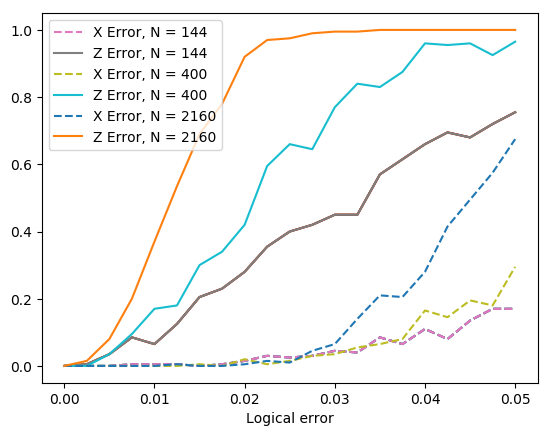

In [643]:
for inq in range(0, 3):
    plt.plot(pvec, errx[inq, :], '--', label="X Error, N = {}".format(Nqvec[inq]))
    plt.plot(pvec, errz[inq, :], label="Z Error, N = {}".format(Nqvec[inq]))
    plt.legend()
plt.xlabel("Physical error")    
plt.xlabel("Logical error")    
plt.show()


[144, 400, 2160]
nq =  144 , p =  0.0
Nq =  144
n in Nsamples =  0


/Users/hosseindehghani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/Users/hosseindehghani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


n in Nsamples =  20
n in Nsamples =  40
n in Nsamples =  60
n in Nsamples =  80
n in Nsamples =  100
n in Nsamples =  120
n in Nsamples =  140
n in Nsamples =  160
n in Nsamples =  180
errx[inq, ip] =  0.0
nq =  144 , p =  0.005
Nq =  144
n in Nsamples =  0
n in Nsamples =  20
n in Nsamples =  40
n in Nsamples =  60
n in Nsamples =  80
n in Nsamples =  100
n in Nsamples =  120
n in Nsamples =  140
n in Nsamples =  160
n in Nsamples =  180
errx[inq, ip] =  0.0
nq =  144 , p =  0.01
Nq =  144
n in Nsamples =  0
n in Nsamples =  20
n in Nsamples =  40
n in Nsamples =  60
n in Nsamples =  80
n in Nsamples =  100
n in Nsamples =  120
n in Nsamples =  140
n in Nsamples =  160
n in Nsamples =  180
errx[inq, ip] =  0.0
nq =  144 , p =  0.015
Nq =  144
n in Nsamples =  0
n in Nsamples =  20
n in Nsamples =  40
n in Nsamples =  60
n in Nsamples =  80
n in Nsamples =  100
n in Nsamples =  120
n in Nsamples =  140
n in Nsamples =  160
n in Nsamples =  180
errx[inq, ip] =  0.0050000000000000044
nq 

/Users/hosseindehghani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/hosseindehghani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


n in Nsamples =  20
n in Nsamples =  40
n in Nsamples =  60
n in Nsamples =  80
n in Nsamples =  100
n in Nsamples =  120
n in Nsamples =  140
n in Nsamples =  160
n in Nsamples =  180
errx[inq, ip] =  0.0
nq =  400 , p =  0.005
Nq =  400
n in Nsamples =  0
n in Nsamples =  20
n in Nsamples =  40
n in Nsamples =  60
n in Nsamples =  80
n in Nsamples =  100
n in Nsamples =  120
n in Nsamples =  140
n in Nsamples =  160
n in Nsamples =  180
errx[inq, ip] =  0.0
nq =  400 , p =  0.01
Nq =  400
n in Nsamples =  0
n in Nsamples =  20
n in Nsamples =  40
n in Nsamples =  60
n in Nsamples =  80
n in Nsamples =  100
n in Nsamples =  120
n in Nsamples =  140
n in Nsamples =  160
n in Nsamples =  180
errx[inq, ip] =  0.0
nq =  400 , p =  0.015
Nq =  400
n in Nsamples =  0
n in Nsamples =  20
n in Nsamples =  40
n in Nsamples =  60
n in Nsamples =  80
n in Nsamples =  100
n in Nsamples =  120
n in Nsamples =  140
n in Nsamples =  160
n in Nsamples =  180
errx[inq, ip] =  0.0050000000000000044
nq 

/Users/hosseindehghani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/hosseindehghani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


n in Nsamples =  0
n in Nsamples =  20
n in Nsamples =  40
n in Nsamples =  60
n in Nsamples =  80
n in Nsamples =  100
n in Nsamples =  120
n in Nsamples =  140
n in Nsamples =  160
n in Nsamples =  180
errx[inq, ip] =  0.0
nq =  2160 , p =  0.005
Nq =  2160
n in Nsamples =  0
n in Nsamples =  20
n in Nsamples =  40
n in Nsamples =  60
n in Nsamples =  80
n in Nsamples =  100
n in Nsamples =  120
n in Nsamples =  140
n in Nsamples =  160
n in Nsamples =  180
errx[inq, ip] =  0.0
nq =  2160 , p =  0.01
Nq =  2160
n in Nsamples =  0
n in Nsamples =  20
n in Nsamples =  40
n in Nsamples =  60
n in Nsamples =  80
n in Nsamples =  100
n in Nsamples =  120
n in Nsamples =  140
n in Nsamples =  160
n in Nsamples =  180
errx[inq, ip] =  0.0
nq =  2160 , p =  0.015
Nq =  2160
n in Nsamples =  0
n in Nsamples =  20
n in Nsamples =  40
n in Nsamples =  60
n in Nsamples =  80
n in Nsamples =  100
n in Nsamples =  120
n in Nsamples =  140
n in Nsamples =  160
n in Nsamples =  180
errx[inq, ip] =  

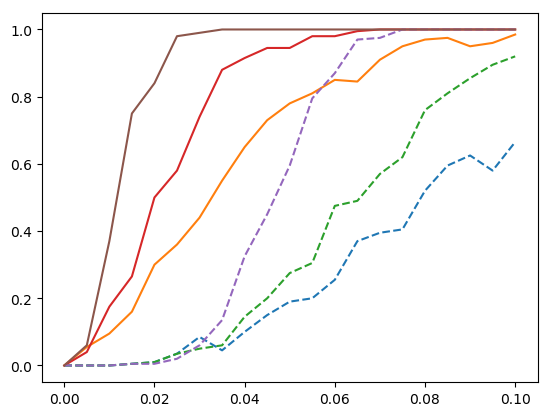

In [629]:
Ns=200;Nq=18;binaryLogical=0;showRes=0;
pvec = np.linspace(0., .1, 21)
Nqvec = [2*n**2 for n in range(3, 6, 2)]
Nqvec = [144, 400, 2160]
sys.setrecursionlimit(1000)
print(Nqvec);
errx = np.zeros((len(Nqvec), len(pvec)))
errz = np.zeros( (len(Nqvec), len(pvec)))
inq=0
for nq in Nqvec:
    ip=0
    for p in pvec:
        print("nq = ", nq, ", p = ", p) #"HyperbolicSuper"
        #errx[inq, ip], errz[inq, ip] = Threshold(Nqvec[inq], Ns, p, "Square", showRes, binaryLogical)        
        errx[inq, ip], errz[inq, ip] = Threshold(Nqvec[inq], Ns, p, "HyperbolicSuper", showRes, binaryLogical)
        print("errx[inq, ip] = ", errx[inq, ip])
        ip+=1
        
    plt.plot(pvec, errx[inq, :], '--')
    plt.plot(pvec, errz[inq, :])
    inq+=1
plt.show()

#edges, dualEdges, superLogicals, dualSuperLogicals, plaquettes, dualPlaquettes
# dashed line ->errx -> logicalError -> Xlogicals -> sortedXZLogicals[1] = [[10.0, 31.0, 0.0, 1.0], ...,
# solid line -> errz -> logicalError -> Zlogicals -> sortedXZLogicals[3] = [[29, 3, 25, 1, 0, 13], ...,


In [104]:
edges, dualEdges, sortedXZLogicals, lattAndDualPlaq = hyperbolicSuperGraph(144);     
print(np.shape(sortedXZLogicals[0]))
print(sortedXZLogicals[0][0])
print(np.shape(sortedXZLogicals[1]))
print(sortedXZLogicals[1][0])
Xlogicals=[]
    
#np.concatenate(sortedXZLogicals[0], sortedXZLogicals[1])
#np.concatenate([a,b], axis=1)
#a = [[1,1],[2,2]] 
# b = np.concatenate([a, a], axis=1).tolist()

[1, 2, 3, 2]
(20,)
[20, 15, 7, 1, 0, 5]
(20, 4)
[10.0, 31.0, 0.0, 1.0]


/Users/hosseindehghani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:167: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


[[0.    0.01  0.14  0.444 0.764 0.924 0.972 0.998 0.998 1.    1.   ]]
(11,)
(11,)


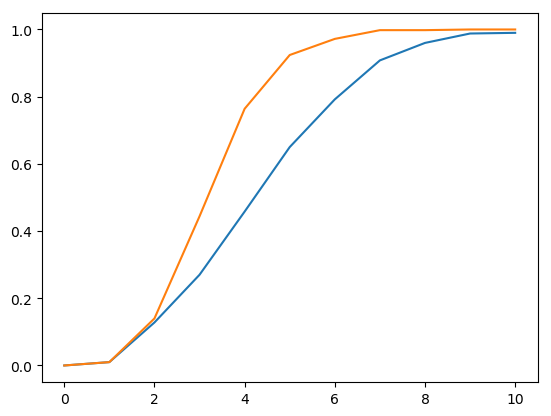

In [540]:
print(errx)
err144 = [0.  ,  0.01,  0.128, 0.27,  0.458 ,0.65 , 0.792, 0.908, 0.96,  0.988 ,0.99]
err400 = errx
print(np.shape(err400[0, :]))
print(np.shape(err144))
plt.plot(err144)
plt.plot(err400[0,:])
plt.show()

In [489]:
#err=np.array([[0.    0.003 0.02  0.04  0.113 0.155 0.271 0.372 0.481 0.604 0.685 0.736
#0.843 0.847 0.896 0.924 0.952 0.964 0.969 0.986 0.992]
# [0.    0.002 0.004 0.046 0.134 0.263 0.444 0.584 0.757 0.846 0.914 0.964
# 0.991 0.989 0.997 1.    0.999 1.    1.    1.    1.   ]])"
#err1000n144and400 = err

#print(err)

In [161]:
err1000n144and400 = err
print(err)

[[0.   0.06 0.   0.  ]]


In [490]:

# Print the current working directory
#print("Current working directory: {0}".format(os.getcwd()))

# Change the current working directory
#os.chdir('./Hyperbolic {8, 3} lattices')


# Change the current working directory
rootFolder = "/Users/hosseindehghani/Desktop/Hafezi/QEC/FloquetQEC/"
os.chdir(rootFolder)
#direcHon = './Honeycomb lattices'
direcHyp = './Hyperbolic {8, 3} lattices *'
#os.chdir(direcHon)
os.chdir(direcHyp)

print("Current working directory: {0}".format(os.getcwd()))

print ("File to change folder to:")
#textToSearch = input( "> " )

subfolder = input("> ")
os.chdir(subfolder)
print(os.getcwd())
#print ("Text to replace it with:")
#textToReplace = input( "> " )s
#* C24.1 (distance =< 4)
# * C64.1 (distance =< 4)
# * C16 (distance =< 2)

Current working directory: /Users/hosseindehghani/Desktop/Hafezi/QEC/FloquetQEC/Hyperbolic {8, 3} lattices *
File to change folder to:


KeyboardInterrupt: 

In [33]:
#print ("File to perform Search-Replace on:")
currentDir = os.getcwd()
print(os.getcwd())
#print(os.listdir())
fileToSearch  = input( "> " )
#fileToSearch = 'D:\dummy1.txt'
fileOpen = currentDir+'/'+fileToSearch+'.txt'
#fileToSearch = fileToSearch+'.txt'
print(fileOpen)

tempFile = open(fileOpen, 'r' )
#modifiedFile = open( fileToSearch+'Edited'+'.txt', 'w' )
modifiedFile = open( fileToSearch+'PythonEdited'+'.txt', 'w' )

textToSearch = '\n'
for line in fileinput.input( fileOpen ):
    print("line= ", line)
    #textToReplace = ';\n'    
    #newline = line.replace(textToSearch, textToReplace)
    
    textToReplace = ""
    newline = line.replace(textToSearch, textToReplace)
    newline = str([int(i) for i in line.split()])+",\n"
    print("new line = ", newline)
    #linep = line+','
    modifiedFile.write(newline)
    #tempFile.write( line.replace( textToSearch, textToReplace ) )
    #if textToSearch in line :
    #    print('Match Found')
    #else:
    #    print('Match Not Found!!')
    #tempFile.write( line.replace( textToSearch, textToReplace ) )
#tempFile.close()
modifiedFile.close()
#input( '\n\n Press Enter to exit...' )
#print(os.getcwd())
#print(os.listdir())

/Users/hosseindehghani/Desktop/Hafezi/QEC/FloquetQEC


KeyboardInterrupt: 

In [446]:
#randBZ[0, 0]=1;randBZ[0, 1]=1;randBZ[0, 13]=1;randBZ[0, 14]=1;\
#randBZ[0, 11]=1;randBZ[0, 29]=1;
EdgeList =  [[0, 3], [1, 4], [2, 8], [5, 11], [6, 17], [7, 14], [9, 10], [12, 19], [13, 21], [15, 22], [16, 23], [18, 20], [0, 2], [1, 5], [3, 7], [4, 12], [6, 13], [8, 14], [9, 16], [10, 22], [11, 19], [15, 23], [17, 20], [18, 21], [0, 1], [2, 6], [3, 9], [4, 10], [5, 13], [7, 18], [8, 15], [11, 23], [12, 20], [14, 19], [16, 21], [17, 22]];
print(EdgeList[24], " ", EdgeList[13], " ", EdgeList[15], " ", EdgeList[32]) #, " ", EdgeList[14], " ", EdgeList[29])

my_error_model = DepolarizingErrorModel()
# set physical error probability to 10%
error_probability = 0.1
rng = np.random.default_rng(10)
#recovery = test.decode(my_code, syndrome)

#print('recovery:\n{}'.format(my_code.new_pauli(recovery)))
#print('recovery:\n{}'.format(recovery))
#print('recovery ^ error:\n{}'.format(my_code.new_pauli(recovery ^ error)))

#if pt.bsp(recovery ^ error, my_code.logicals.T)[0] == 0 and pt.bsp(recovery ^ error, my_code.logicals.T)[1] == 0:
#    print('decode success')
#else:
#    print('decode fail')
#code._plaquette_indices =  [(1, -1), (0, 0), (1, 1), (0, 2), (-1, 0), (1, 0), (0, 1), (2, 1)]
#pos in keys =  (-1, 0)

#v1=Vertex("v1");v2=Vertex("v2")
#edgev1v2 = Edge(v1, v2) 
#edgev1v2.setEdgeIndex(12)
#edgev2v1 = Edge(v2, v1)
#edgev2v1.setEdgeIndex(21)
#edgev1v2copy = Edge(v1, v2)
#print(Edge(v1, v2) == edgev1v2)
#print(edgev1v2.getEdgeIndex())
#print(edgev1v2copy.getEdgeIndex())
#print(Edge(v1, v2).getEdgeIndex())
# Print the current working directory
#print("Current working directory: {0}".format(os.getcwd()))

# Change the current working directory
#os.chdir('./Hyperbolic {8, 3} lattices')
# Change the current working directory
rootFolder = "/Users/hosseindehghani/Desktop/Hafezi/QEC/FloquetQEC/"
os.chdir(rootFolder)

lattice="Hyperbolic"
fileGraphNq = "* C64.1 (distance =< 4)"

if lattice=="Hyperbolic":
    direc = './Hyperbolic {8, 3} lattices *'
elif lattice=="Honeycomb":
    direc = './Honeycomb lattices'
#os.chdir(direc)
#os.chdir(fileGraphNq)
#print("Current working directory: {0}".format(os.getcwd()))
#print ("File to change folder to:")

#subfolder = input("> ")
#os.chdir(subfolder)
#os.chdir(fileGraphNq)
#print(os.getcwd())
#print ("Text to replace it with:")
#textToReplace = input( "> " )s
#* C24.1 (distance =< 4)





[0, 1]   [1, 5]   [4, 12]   [12, 20]


In [8]:
from tqdm import tqdm

from multiprocess import Pool
from magic_functions import process_frame

frames_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

max_pool = 16

with Pool(max_pool) as p:
    pool_outputs = list(
        tqdm(
            p.imap(process_frame,
                   frames_list),
            total=len(frames_list)
        )
    )    

print(pool_outputs)
new_dict = dict(pool_outputs)

print("dict:", new_dict)

100%|██████████| 16/16 [00:00<00:00, 28423.92it/s]

[(0, 10), (1, 11), (2, 12), (3, 13), (4, 14), (5, 15), (6, 16), (7, 17), (8, 18), (9, 19), (10, 20), (11, 21), (12, 22), (13, 23), (14, 24), (15, 25)]
dict: {0: 10, 1: 11, 2: 12, 3: 13, 4: 14, 5: 15, 6: 16, 7: 17, 8: 18, 9: 19, 10: 20, 11: 21, 12: 22, 13: 23, 14: 24, 15: 25}
